<p align="center">
  <img src="https://i.hizliresim.com/27wmkhi.png" />
</p>

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">

# [Heart Disease Prediction - Group 2]
</span></center>
<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Group Members:
</span></center>

<center><span style="color:#023047;font-weight:700;font-size:15px;">
Ahmet Furkan Ün - 28315 | Efe Tüzün - 28992 | Ege Demirci - 28287 | Taner Giray Sönmez - 27744

</span></center>

<span><center> Note : We recommend using Jupyter Notebook to see the headers and the design we use in the best way. It may not be completely visible as we are using the HTML style in the headers. 

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Problem Statement
</span></center>



One of the biggest challenges in heart disease is its detection. While there are existing
tools that can predict heart diseases, calculating the probability of heart diseases is either
expensive or inefficient. Early detection of heart diseases is extremely important as it can reduce
the death rate and complications it will lead to. However, it is not possible to accurately monitor
patients every day. Moreover, since this monitoring requires experience, time, and expertise, the
patient cannot be consulted by the doctor 24 hours a day. Since we have a good amount of data in
today's world, we can come up with a solution to this problem by analyzing the data and using
various machine learning techniques. In conclusion, medical data can be used for health
diagnosis using appropriate analysis and methods. In this project, we will try to analyze health data and predict the potential heart diseases.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Utilized Datasets
</span></center>

We choose to utilize the data set from Kaggle: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction as our main data set. The given main data set in the homework description had less than ideal rows, so we chose to use a similar data set that has mostly similar data attributes. The features and their properties are discussed in detail in the following few sections. 

To extract new features from an additional data set, we used another data set from Kaggle: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset. This data set had many various attributes, most of which were not present in our main data set. We chose to extract only 4 of the available attributes and the target variable. The features and their properties of this data set are discussed in detail in "Feature Extraction" section. 

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Importing Libraries and Reading Datasets
</span></center>


First of all, we started our project by importing the libraries and data sets that we will use in the project. Then, we collectively agreed that grouping some interval values might help us in the future, so we made some bins for that purpose.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def age_groups(age):
  if age < 20:
    return 0
  elif age < 30:
    return 1
  elif age < 40:
    return 2
  elif age < 50:
    return 3
  elif age < 60:
    return 4
  elif age < 70:
    return 5
  else:
    return 6

def pressure_groups(restbp):
    if restbp < 120: # Normal
        return 0
    elif restbp < 130: # Elevated
        return 1
    elif restbp < 140: # High BP Stage 1
        return 2
    elif restbp < 180: # High BP Stage 2
        return 3
    else: # Hypertensive Crisis
        return 4

def chol_groups(chol):
    if chol < 200: # Normal
        return 0
    elif chol < 240: # Borderline
        return 1
    else:  # High
        return 2

colors = ["#ae2012","#ffb703","#BF630D","#023047", "#126782", "#94d2bd"]
sns.set_palette(sns.color_palette(colors))

df = pd.read_csv("side2_heart_disease_dataset.csv")

df["Sex"] = df["Sex"].map({"M": 1, "F": 0})
df["ChestPainType"] = df["ChestPainType"].map({"ATA": 1, "TA": 0, "NAP": 2, "ASY": 3 })
df["RestingECG"] = df["RestingECG"].map({"Normal": 0, "ST": 1, "LVH": 2})
df["ExerciseAngina"] = df["ExerciseAngina"].map({"N": 0, "Y": 1})
df["ST_Slope"] = df["ST_Slope"].map({"Up": 1, "Flat": 2, "Down": 3})

df.columns = ["Age","Sex","ChestPain","RestBP","Chol","Fbs","RestECG","MaxHR","ExAng","Oldpeak","Slope","AHD"]

df["AgeGroups"] = df["Age"].apply(age_groups)
df["RestBPGroups"] = df["RestBP"].apply(pressure_groups)
df["CholesterolGroups"] = df["Chol"].apply(chol_groups)

df['ChestPain'] = df['ChestPain'].astype("category")
df['AHD'] = df['AHD'].astype("category")
df['Sex'] = df['Sex'].astype("category")
df['RestECG'] = df['RestECG'].astype("category")
df['ExAng'] = df['ExAng'].astype("category")
df['Slope'] = df['Slope'].astype("category")
df["CholesterolGroups"] = df["CholesterolGroups"].astype("category")
df["RestBPGroups"] = df["RestBPGroups"].astype("category")
df["AgeGroups"] = df["AgeGroups"].astype("category")

df = df[["Age","Sex","ChestPain","RestBP","Chol","Fbs","RestECG","MaxHR","ExAng",
         "Oldpeak","Slope","AgeGroups", "RestBPGroups", "CholesterolGroups", "AHD"]]

We wanted to make sure that there were no duplicates in our data set, so that the analysis would not be affected significantly. Thus, we made sure to check for duplicates and if any were present, we would eliminate them. Since there were none, we were good to go.

In [3]:
df_copy = df.copy()
df_copy[df_copy.duplicated()]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AgeGroups,RestBPGroups,CholesterolGroups,AHD


<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Some Information About Dataset
</span></center>



Before analyzing the variables in the dataset, let's take a look at the general characteristics of the dataset.

In [4]:
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,AgeGroups,RestBPGroups,CholesterolGroups,AHD
0,40,1,1,140,289,0,0,172,0,0.0,1,3,3,2,0
1,49,0,2,160,180,0,0,156,0,1.0,2,3,3,0,1
2,37,1,1,130,283,0,1,98,0,0.0,1,2,2,2,0
3,48,0,3,138,214,0,0,108,1,1.5,2,3,2,1,1
4,54,1,2,150,195,0,0,122,0,0.0,1,4,3,0,0


In [5]:
df.shape

(918, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Age                918 non-null    int64   
 1   Sex                918 non-null    category
 2   ChestPain          918 non-null    category
 3   RestBP             918 non-null    int64   
 4   Chol               918 non-null    int64   
 5   Fbs                918 non-null    int64   
 6   RestECG            918 non-null    category
 7   MaxHR              918 non-null    int64   
 8   ExAng              918 non-null    category
 9   Oldpeak            918 non-null    float64 
 10  Slope              918 non-null    category
 11  AgeGroups          918 non-null    category
 12  RestBPGroups       918 non-null    category
 13  CholesterolGroups  918 non-null    category
 14  AHD                918 non-null    category
dtypes: category(9), float64(1), int64(5)
memory usage: 52.6 K

In [7]:
df.describe()

,Age,RestBP,Chol,Fbs,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Explanation of Variables</span></center>

***
- Age: Age of the patients [in years]
  
- Sex: Gender of the patients [1: Male, 0: Female]
- ChestPain: Type of Chest Pain that the respondents go through [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic]
- RestBP: Resting blood pressure of the patients [mmHg]
- Chol: Serum (total) cholesterol of the patients [mg/dL]
- Fbs: fasting blood sugar [1: if FBS > 120 mg/dL, 0: else]
- RestingECG: Resting electrocardiogram results [0: Normal, 1:  having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExAng: Exercise-induced angina [1: Yes, 0: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- Slope: the slope of the peak exercise ST segment [1: upsloping, 2: flat, 3: downsloping]
- AgeGroups: The groups of ages [0-19: 0, 20-29:1, 30-39:2, 40-49:3, 50-59:4, 60-69:5, 70-79: 6]
- RestBPGroups: The grouping of the resting blood pressures [0-119: 0 (Normal), 120-129: 1 (Elevated), 130-139: 2 (Stage 1), 140-180: 3 (Stage 2), 180-: 4 (Hypertensive Crisis)]
- CholesterolGroups: The grouping of the cholesterols of the patients [0-199: 0 (Normal), 200-239: 1 (Borderline), 240- : 3 (High)]
- AHD: Target (output) class [1: heart disease, 0: Normal]
***

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Data Cleaning
</span></center>



Before we started analyzing the dataset, we decided how to handle the wrong data and outliers. Firstly, we decided that we could drop the only person with 0 resting blood pressure, as pointed out by the list of indexes below.

In [8]:
idxs = [i for i in range(len(df["RestBP"])) if list(df["RestBP"])[i] == 0 ]
display(idxs)
df = df.drop(idxs)

[449]

Instead of dropping all people with no cholesterol group, we choose to impute them with the averages of the genders to avoid unnecessary deletions. We believe that getting rid of all those people would hurt the power of our prediction model.

In [9]:
male_chol_average = df.loc[ (df["Sex"] == 1) & (df["Chol"] != 0)]["Chol"].mean() 
female_chol_average = df.loc[(df["Sex"] == 0) & (df["Chol"] != 0)]["Chol"].mean()

df['Chol'] = np.where((df["Chol"] == 0 ) & (df["Sex"] == 1) , male_chol_average, df['Chol'])
df['Chol'] = np.where((df["Chol"] == 0 ) & (df["Sex"] == 0) , female_chol_average, df['Chol'])

df["Chol"].describe()

count    917.000000
mean     244.141818
std       53.379949
min       85.000000
25%      214.000000
50%      241.040780
75%      267.000000
max      603.000000
Name: Chol, dtype: float64

After that, we handle the outliers with the help of IQR method. We removed extreme outliers from our data.

In [10]:
# Outlier Treatment
Q1 = np.percentile(df['Chol'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['Chol'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 3*IQR
lower = Q1 - 3*IQR
df = df[(df['Chol'] > lower) & (df['Chol'] < upper)]

Q1 = np.percentile(df['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['Age'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 3*IQR
lower = Q1 - 3*IQR
df = df[(df['Age'] > lower) & (df['Age'] < upper)]

Q1 = np.percentile(df['RestBP'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['RestBP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 3*IQR
lower = Q1 - 3*IQR
df = df[(df['RestBP'] > lower) & (df['RestBP'] < upper)]

Q1 = np.percentile(df['MaxHR'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['MaxHR'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 3*IQR
lower = Q1 - 3*IQR
df = df[(df['MaxHR'] > lower) & (df['MaxHR'] < upper)]

Q1 = np.percentile(df['Oldpeak'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['Oldpeak'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
upper = Q3 + 3*IQR
lower = Q1 - 3*IQR
df = df[(df['Oldpeak'] > lower) & (df['Oldpeak'] < upper)]

df.shape

(904, 15)

After solving the wrong data problem and removing the outliers from our data, we checked the new version of our dataset.

In [11]:
df.describe()

,Age,RestBP,Chol,Fbs,MaxHR,Oldpeak
count,904.000000,904.000000,904.000000,904.000000,904.000000,904.000000
mean,53.506637,132.269912,241.852026,0.231195,136.922566,0.879757
std,9.436150,17.499443,47.079360,0.421830,25.426649,1.051856
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,241.040780,0.000000,138.000000,0.500000
75%,60.000000,140.000000,266.000000,0.000000,156.000000,1.500000
max,77.000000,192.000000,417.000000,1.000000,202.000000,5.600000


In [12]:
df.dtypes

Age                     int64
Sex                  category
ChestPain            category
RestBP                  int64
Chol                  float64
Fbs                     int64
RestECG              category
MaxHR                   int64
ExAng                category
Oldpeak               float64
Slope                category
AgeGroups            category
RestBPGroups         category
CholesterolGroups    category
AHD                  category
dtype: object

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Uni-variate Analysis of the Variables
    </span></center>

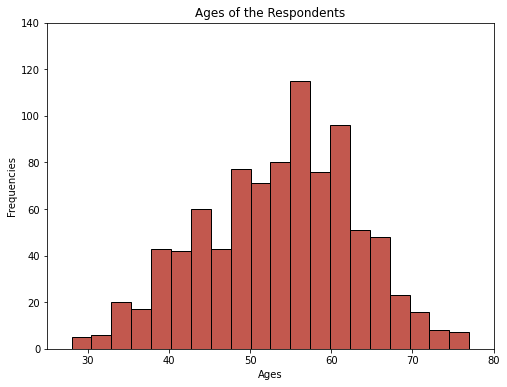

In [13]:
# Age
plt.figure(figsize=(8,6))
ax = sns.histplot(data = df, x = "Age",bins = 20)
ax.set_title("Ages of the Respondents")
ax.set_ylabel("Frequencies")
ax.set_xlabel("Ages")
ax.set_ybound(0,140)
ax.set_xbound(25,80)

In [14]:
df["Age"].describe()

count    904.000000
mean      53.506637
std        9.436150
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

<span style="color:#126782;font-weight:700;font-size:14px;">
Age : 
</span>
The distribution of the ages of the people in our data set is close to normal distribution. The mean is 53.51 with a standard deviation of 9.44 The ages vary from 28 to 77 (both inclusive). The median is 54.

[Text(0, 0, '20-29'),
 Text(0, 0, '30-39'),
 Text(0, 0, '40-49'),
 Text(0, 0, '50-59'),
 Text(0, 0, '60-69'),
 Text(0, 0, '70-79')]

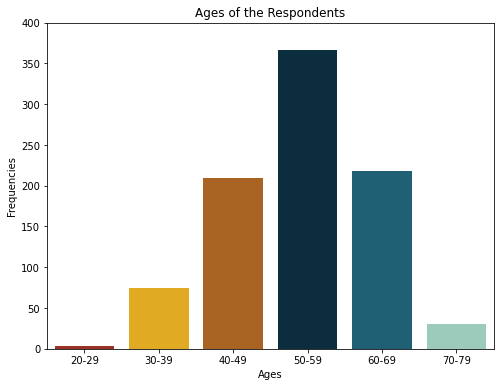

In [15]:
# Age Groups
plt.figure(figsize=(8,6))
ax = sns.countplot(data= df, x = "AgeGroups")
ax.set_title("Ages of the Respondents")
ax.set_ylabel("Frequencies")
ax.set_xlabel("Ages")
ax.set_ybound(0,400)
ax.set_xticklabels(["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])

In [16]:
df["AgeGroups"].value_counts()

4    367
5    218
3    209
2     75
6     31
1      4
Name: AgeGroups, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Age Groups (New Feature) : 
</span>
We decided to separate our respondents into various age categories, making the bin size 10. We see that most of the respondents fall into category 4, that is the ages of 50-59. Following is the age group 60-69, then comes middle-aged people falling into 40-49 years old. Then comes the rest of the respondents, falling into various bins. We do not have data from people that are less than 20 years old.

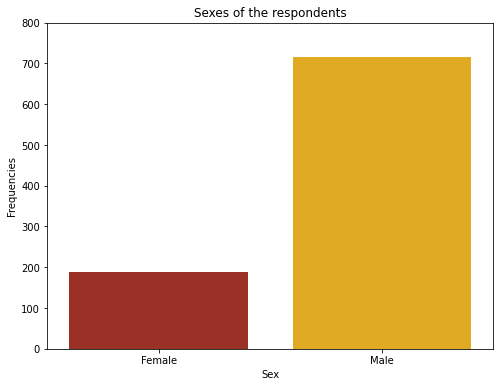

In [17]:
# Sex
plt.figure(figsize=(8,6))
ax = sns.countplot(data= df, x = "Sex")
ax.set_title("Sexes of the respondents")
ax.set_ylabel("Frequencies")
ax.set_xticklabels(["Female", "Male"])
ax.set_ybound(0,800) 

In [18]:
df["Sex"].value_counts()

1    716
0    188
Name: Sex, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Sex : 
</span>
Out of 904 people, 716 are men and 188 are women.

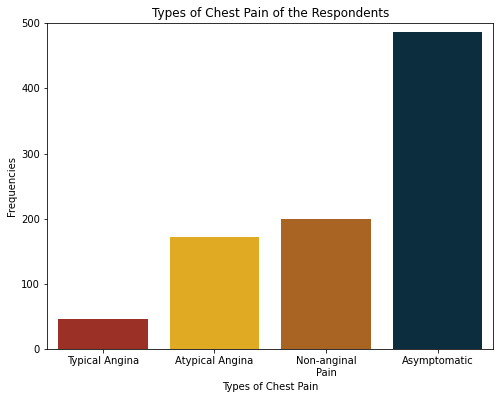

In [19]:
# Type of Chest Pain
plt.figure(figsize=(8,6))
ax = sns.countplot(data= df, x = "ChestPain")
ax.set_title("Types of Chest Pain of the Respondents")
ax.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal\nPain", "Asymptomatic"])
ax.set_ylabel("Frequencies")
ax.set_xlabel("Types of Chest Pain")
ax.set_ybound(0,500)

In [20]:
df["ChestPain"].value_counts()

3    487
2    199
1    172
0     46
Name: ChestPain, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Chest Pain : 
</span>
The most commonly observed type of chest pain is asymptomatic with 487 people, and next comes the non-anginal pain with 199. Atypical angina follows it closely with 172, while 46 people have typical angina.

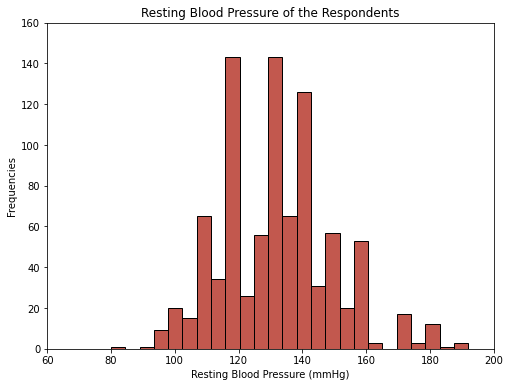

In [21]:
# Resting Blood Pressure
plt.figure(figsize=(8,6))
ax = sns.histplot(data = df, x = "RestBP", bins = 25)
ax.set_title("Resting Blood Pressure of the Respondents")
ax.set_xlabel("Resting Blood Pressure (mmHg)")
ax.set_ylabel("Frequencies")
ax.set_ybound(0, 160)
ax.set_xbound(60,200)

In [22]:
df["RestBP"].describe()

count    904.000000
mean     132.269912
std       17.499443
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      192.000000
Name: RestBP, dtype: float64

<span style="color:#126782;font-weight:700;font-size:14px;">
Resting Blood Pressure : </span>
The resting blood pressure of the people varies from 80 mmHg to 192 mmHg, with a mean of 132.27 mmHg and a standard deviation of 17.5. The median value is 130 mmHg.

[Text(0, 0, 'Normal'),
 Text(0, 0, 'Elevated'),
 Text(0, 0, 'Hypertension\nStage 1'),
 Text(0, 0, 'Hypertension\nStage 2'),
 Text(0, 0, 'Hypertensive\nCrisis')]

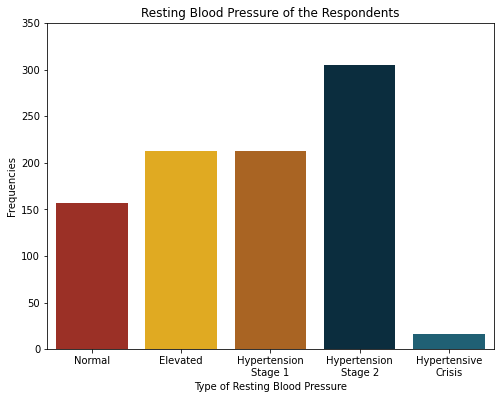

In [23]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x = "RestBPGroups")
ax.set_title("Resting Blood Pressure of the Respondents")
ax.set_xlabel("Type of Resting Blood Pressure")
ax.set_ylabel("Frequencies")
ax.set_ybound(0, 350)
ax.set_xticklabels(["Normal", "Elevated", "Hypertension\nStage 1",
                    "Hypertension\nStage 2", "Hypertensive\nCrisis"])

In [24]:
df["RestBPGroups"].value_counts()

3    305
1    213
2    213
0    157
4     16
Name: RestBPGroups, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Resting Blood Pressure Groups (New Feature): 
</span>
Most of the respondents have stage 2 hypertension according to the internet, which one should receive treatment. In second place are the people with elevated blood pressure and hypertension stage 2 patients. Then come the patients with normal blood pressures. At last, there are 16 people with hypertensive crisis.

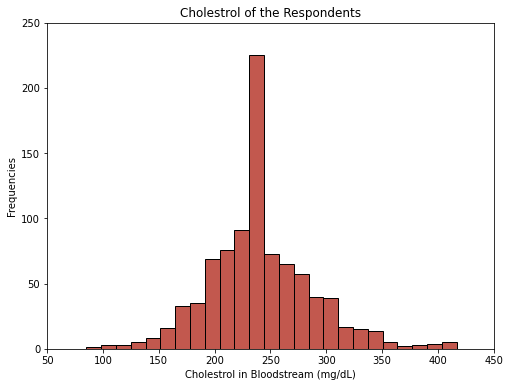

In [25]:
# Cholestrol
plt.figure(figsize=(8,6))
ax = sns.histplot(data = df, x = "Chol", bins = 25)
ax.set_title("Cholestrol of the Respondents")
ax.set_ylabel("Frequencies")
ax.set_xlabel("Cholestrol in Bloodstream (mg/dL)")
ax.set_ybound(0,250)
ax.set_xbound(50,450)

In [26]:
df["Chol"].describe()

count    904.000000
mean     241.852026
std       47.079360
min       85.000000
25%      214.000000
50%      241.040780
75%      266.000000
max      417.000000
Name: Chol, dtype: float64

<span style="color:#126782;font-weight:700;font-size:14px;">
Cholestrol : </span>
Cholesterol levels of the people have a mean of 241.85 mg/dL with a standard deviation of 47.08. The minimum is 85 mg/dL and the maximum is 417 mg/dL. The distribution above can be approximated to normal distribution.

[Text(0, 0, 'Normal\n(< 200 mg/dL)'),
 Text(0, 0, 'Borderline High\n(< 240 mg/dL)'),
 Text(0, 0, 'High (>= 240 mg/dL)')]

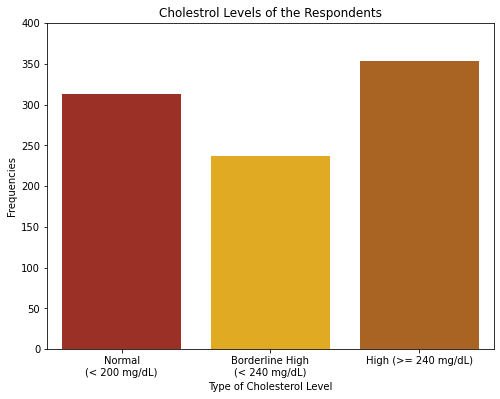

In [27]:
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x = "CholesterolGroups")
ax.set_title("Cholestrol Levels of the Respondents")
ax.set_ylabel("Frequencies")
ax.set_xlabel("Type of Cholesterol Level")
ax.set_ybound(0, 400)
ax.set_xticklabels(["Normal\n(< 200 mg/dL)",
                    "Borderline High\n(< 240 mg/dL)", "High (>= 240 mg/dL)"])

In [28]:
df["CholesterolGroups"].value_counts()

2    354
0    313
1    237
Name: CholesterolGroups, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Cholestrol Groups of the Respondents (New Feature): 
</span>
The only thing we can extract from the chart above is that the people with high cholesterol levels are most commonly found in the data set we have. Besides, the second bigger group we have is people with normal cholesterol levels, and the least people we have with borderline high cholesterol levels.

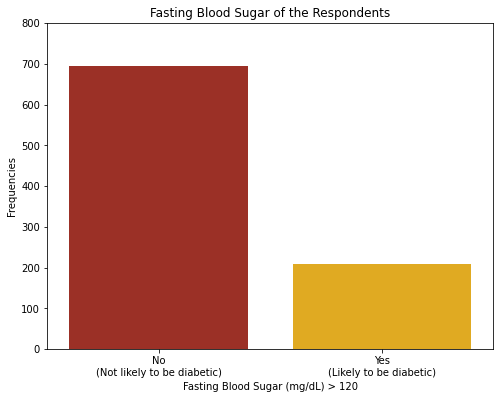

In [29]:
# Fasting Blood Sugar
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x = "Fbs")
ax.set_title("Fasting Blood Sugar of the Respondents")
ax.set_xlabel("Fasting Blood Sugar (mg/dL) > 120")
ax.set_xticklabels(["No\n(Not likely to be diabetic)", "Yes\n(Likely to be diabetic)"])
ax.set_ylabel("Frequencies")
ax.set_ybound(0,800)
plt.show()

In [30]:
df["Fbs"].value_counts()

0    695
1    209
Name: Fbs, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Fasting Blood Sugar : </span>
There are more people that have a fasting blood sugar of less than 120 than more than 120. Most people have less probability of being diabetic. The relationship between having a fasting blood sugar of more than 120 and having heart disease may need to be examined closely.

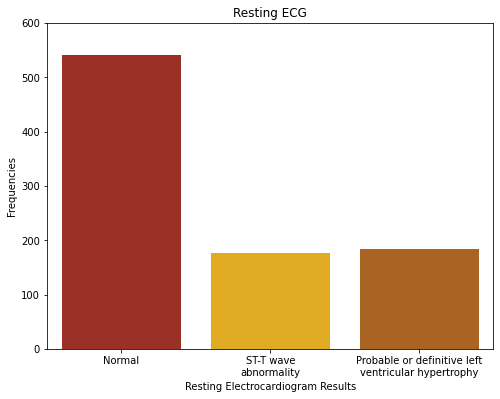

In [31]:
# Resting Electrocardiogram Results
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x = "RestECG")
ax.set_xlabel("Resting Electrocardiogram Results")
ax.set_ylabel("Frequencies")
ax.set_title("Resting ECG")
ax.set_xticklabels(["Normal", "ST-T wave\nabnormality", "Probable or definitive left\nventricular hypertrophy"])
ax.set_ybound(0,600)

In [32]:
df["RestECG"].value_counts()

0    542
2    185
1    177
Name: RestECG, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Resting Electrocardiogram Results : </span>
Most of the people in our data set have normal ECG results. In the rest of the data set, there are a lot of people with left ventricular hypertrophy, which might be caused by having high blood pressure. ST-T wave abnormalities might also signal the presence of myocardial edema, which can lead to cardiac dysfunction. The relationship between these categories and having heart disease needs to be examined in detail.

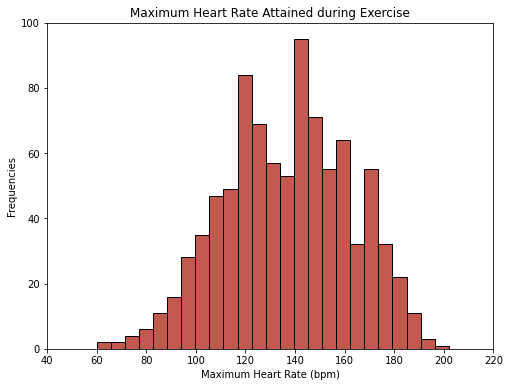

In [33]:
# Maximum Heart Rate Attained During Exercise
plt.figure(figsize=(8,6))
ax = sns.histplot(data = df, x = "MaxHR",bins = 25)
ax.set_title("Maximum Heart Rate Attained during Exercise")
ax.set_ylabel("Frequencies")
ax.set_xlabel("Maximum Heart Rate (bpm)")
ax.set_ybound(0,100)
ax.set_xbound(40,220)

In [34]:
df["MaxHR"].describe()

count    904.000000
mean     136.922566
std       25.426649
min       60.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: MaxHR, dtype: float64

<span style="color:#126782;font-weight:700;font-size:14px;">
Maximum Heart Rate Attained During Exercise : </span>
The distribution of the highest beats per minute follows somewhat of a normal distribution with a mean of 136.92 bpm and a standard deviation of 25.43. The minimum is 60 bpm and the maximum is 202 bpm. The distribution is moderately skewed.

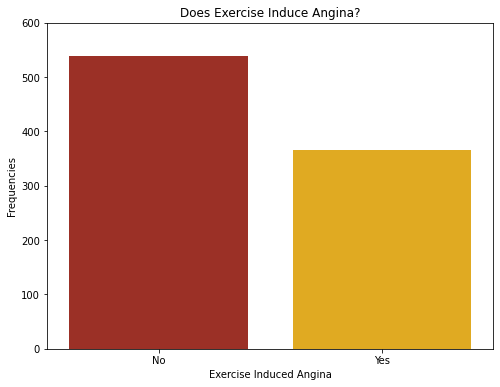

In [35]:
# Exercise Induced Angina
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x = "ExAng")
ax.set_title("Does Exercise Induce Angina?")
ax.set_xlabel("Exercise Induced Angina")
ax.set_ylabel("Frequencies")
ax.set_xticklabels(["No", "Yes"])
ax.set_ybound(0,600)

In [36]:
df["ExAng"].value_counts()

0    538
1    366
Name: ExAng, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Exercise Induced Angina : </span>
For more than half of the people in our group, we see that exercise does not induce angina. However, we need to examine the correlation between exercise-induced angina and heart disease.

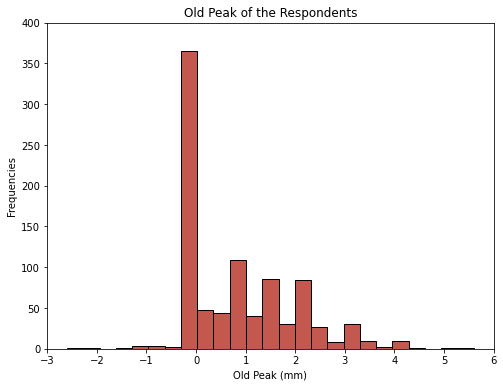

In [37]:
# Old Peak
plt.figure(figsize=(8,6))
ax = sns.histplot(data = df, x = "Oldpeak",bins = 25)
ax.set_title("Old Peak of the Respondents")
ax.set_ylabel("Frequencies")
ax.set_xlabel("Old Peak (mm)")
ax.set_ybound(0,400)
ax.set_xbound(-3,6)

In [38]:
df["Oldpeak"].describe()

count    904.000000
mean       0.879757
std        1.051856
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        5.600000
Name: Oldpeak, dtype: float64

<span style="color:#126782;font-weight:700;font-size:14px;">
Old Peak : </span>
Old Peak is ST depression induced by exercise relative to rest. Most of the patients have ST depression between -0.3 and 0 mm. Further analysis and its relationship to AHD will be explored in more detail in the following sections.

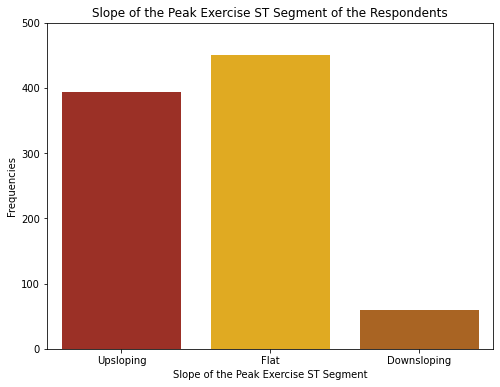

In [39]:
# Slope
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x = "Slope")
ax.set_title("Slope of the Peak Exercise ST Segment of the Respondents")
ax.set_ylabel("Frequencies")
ax.set_xlabel("Slope of the Peak Exercise ST Segment")
ax.set_xticklabels(["Upsloping", "Flat","Downsloping"])
ax.set_ybound(0, 500)

In [40]:
df["Slope"].value_counts()

2    450
1    394
3     60
Name: Slope, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Slope of Peak Exercise ST Segment: 
</span>
A lot of people in the data set have downsloping and fewer people have flat graphs, both of which can be an indicator of heart disease. Upsloping is generally the normal behavior on the internet.

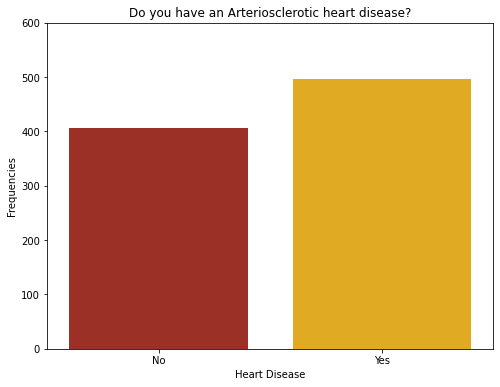

In [41]:
# AHD
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x = "AHD")
ax.set_title("Do you have an Arteriosclerotic heart disease?")
ax.set_ylabel("Frequencies")
ax.set_xlabel("Heart Disease")
ax.set_xticklabels(["No", "Yes"])
ax.set_ybound(0,600)

In [42]:
df["AHD"].value_counts()

1    497
0    407
Name: AHD, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
AHD : </span>
Almost half of the people have heart disease. This is a good number because we can have enough samples from both the people with and without heart diseases to train our model and test it out later.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Bi-variate Analysis
    </span></center>

<span style="color:#126782;font-weight:700;font-size:14px;">
    Relationship Between AHD and Other Attributes
</span>

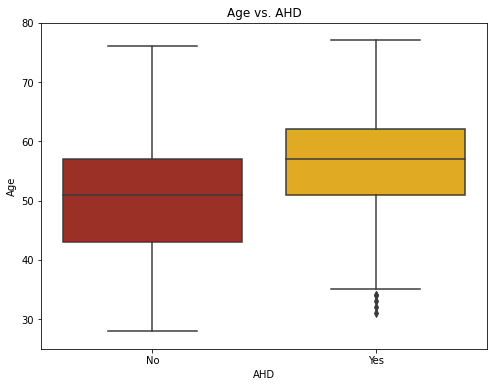

In [43]:
plt.figure(figsize=(8,6))
age_AHD = sns.boxplot( y=df["Age"], x=df["AHD"])
age_AHD.set_title("Age vs. AHD")
age_AHD.set_xticklabels(["No", "Yes"])
age_AHD.set_ybound(25,80)

<span style="color:#126782;font-weight:700;font-size:14px;">
Age vs. AHD : </span>
As visible from the above graph, the median age of the people with heart disease is larger than people that do not have heart disease. Also, the maximum age of people with heart disease seems to be higher. Nevertheless, there seems to be no correlation between age and having an arteriosclerotic heart disease.  However, there seem to be some outliers with heart disease, as there are some who are outside of the left whisker. Their information needs to be handled well. There might be some other features in the data that might help correlate their condition. 

Text(0.5, 1.0, 'Age Groups vs. AHD')

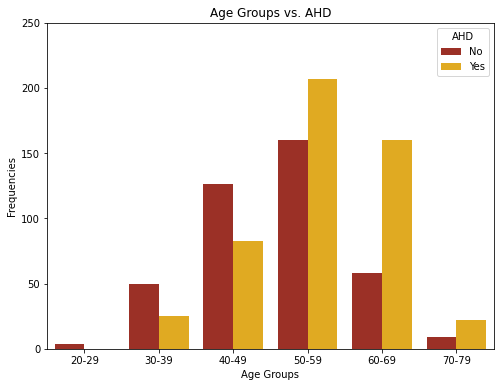

In [44]:
plt.figure(figsize=(8,6))
age_groups_AHD = sns.countplot(data = df, x = "AgeGroups", hue = "AHD")
age_groups_AHD.set_ybound(0,250)
age_groups_AHD.set_xticklabels(["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])
age_groups_AHD.legend(title = "AHD", labels = ["No","Yes"])
age_groups_AHD.set_xlabel("Age Groups")
age_groups_AHD.set_ylabel("Frequencies")
age_groups_AHD.set_title("Age Groups vs. AHD")

In [45]:
pd.crosstab(df["AgeGroups"], df["AHD"])

AHD,0,1
AgeGroups,,
1,4,0
2,50,25
3,126,83
4,160,207
5,58,160
6,9,22


<span style="color:#126782;font-weight:700;font-size:14px;">
Age Groups vs. AHD : 
</span>
As we can clearly see from the chart above, the frequency of people with AHD is at its highest level in the 50-59 age group, but it begins to decrease as we move away from that 50-59 age group. Moreover, as the age increases from 59 updwards, we see an increase in the percentage of people who have AHD. Furthermore, when we look at the chart, we see that the peak of the value in the middle of the chart and decrease as we move away from the middle of the chart, which tells us that the values are distributed approximately normally.

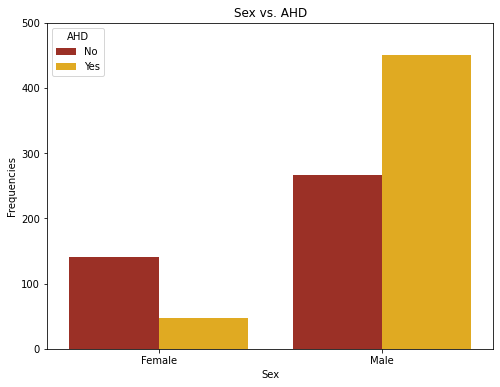

In [46]:
plt.figure(figsize=(8,6))
sex_AHD = sns.countplot(data = df, x = "Sex", hue = "AHD")
sex_AHD.set_xticklabels(['Female','Male'])
sex_AHD.set_ylabel("Frequencies")
sex_AHD.set_title("Sex vs. AHD")
sex_AHD.legend(labels = ["No", "Yes"], title="AHD")
sex_AHD.set_ybound(0,500)

In [47]:
pd.crosstab(df["AHD"], df["Sex"])

Sex,0,1
AHD,,
0,141,266
1,47,450


<span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Sex : </span>
In the above cross-tabulation, "0" for AHD means no disease, and "1" for AHD means there exists Arteriosclerotic heart disease. "0" for sex implies women and and "1" implies men. It is clear that males have significantly more Arteriosclerotic heart disease than women. It might be possible to suggest that women are less inclined to have heart disease than men because the percentage of males that have the disease out of all males is higher than that of the women. Thus, it needs to be tested whether sex is a key factor playing a role in determining whether a person has Arteriosclerotic heart disease or not. 

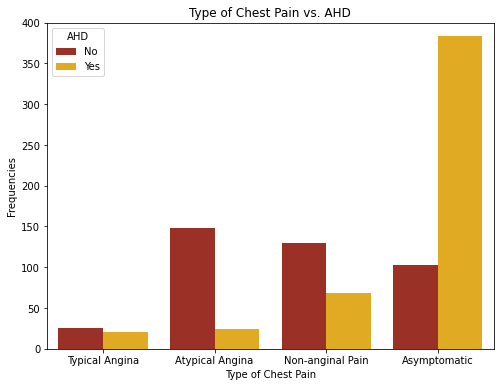

In [48]:
plt.figure(figsize=(8,6))
chest_AHD = sns.countplot(data = df, x= "ChestPain", hue="AHD")
chest_AHD.set_title("Type of Chest Pain vs. AHD")
chest_AHD.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
chest_AHD.set_xlabel("Type of Chest Pain")
chest_AHD.set_ylabel("Frequencies")
chest_AHD.legend(labels = ["No", "Yes"], title="AHD")
chest_AHD.set_ybound(0,400)

In [49]:
pd.crosstab(df["AHD"], df["ChestPain"])

ChestPain,0,1,2,3
AHD,,,,
0,26,148,130,103
1,20,24,69,384


<span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Type of Chest Pain : 
</span>
In the above cross-tabulation, the "0" value corresponds to typical angina, "1" corresponds to atypical angina, "2" corresponds to non-anginal chest pain, and "3" corresponds to asymptomatic chest pain. From the graph, it is possible to infer that there might be some correlation between having asymptomatic chest pain and heart disease, which needs to be examined in more detail. Also, the atypical angia might help us to classify people with no heart disease. We need to hypothesis test these claims to reach a sound conclusion.

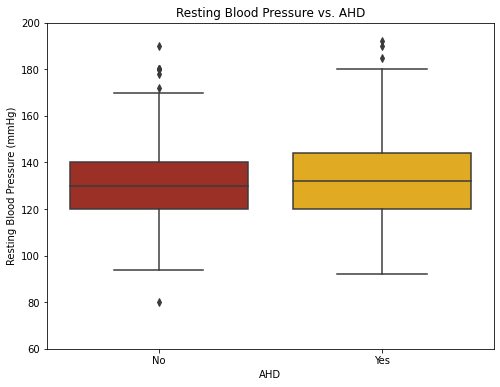

In [50]:
plt.figure(figsize=(8,6))
ahd_RBP = sns.boxplot( y=df["RestBP"], x=df["AHD"])
ahd_RBP.set_ylabel("Resting Blood Pressure (mmHg)")
ahd_RBP.set_title("Resting Blood Pressure vs. AHD")
ahd_RBP.set_xticklabels(["No", "Yes"])
ahd_RBP.set_ybound(60,200)

<span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Resting Blood Pressure : 
</span>
Analiz
The median resting blood pressure of the people with or without heart disease seems to be very close. The maximum blood pressure of the affected people seems to be higher than those who do not have heart conditions. Both Q1s of the boxplots are very close, but Q3s have some differences. There are some outliers for both cases, which we need to treat to increase the power of our model.

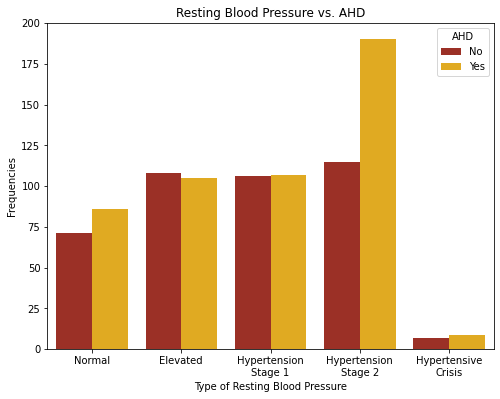

In [51]:
plt.figure(figsize=(8,6))
restBP_AHD = sns.countplot(data = df, x= "RestBPGroups", hue="AHD")
restBP_AHD.set_title("Resting Blood Pressure vs. AHD")
restBP_AHD.set_xticklabels(["Normal", "Elevated", "Hypertension\nStage 1",
                    "Hypertension\nStage 2", "Hypertensive\nCrisis"])
restBP_AHD.set_xlabel("Type of Resting Blood Pressure")
restBP_AHD.set_ylabel("Frequencies")
restBP_AHD.legend(labels = ["No", "Yes"], title="AHD")
restBP_AHD.set_ybound(0,200)

In [52]:
pd.crosstab(df["AHD"], df["RestBPGroups"])

RestBPGroups,0,1,2,3,4
AHD,,,,,
0,71,108,106,115,7
1,86,105,107,190,9


<span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Resting Blood Pressure Groups : 
</span>
As we can see from the chart above, when we look at the types of Resting Blood Pressure, the number of people who have and do not have AHD in almost every type of Resting Blood Pressure is equal. For patients with Hypertension stage 2, we see a staggering difference. Because in all other types of Resting Blood Pressure, the number of people with and without AHD is nearly the same, but in the Hyper Tension Stage 2 group, the number of people with AHD is almost double the number of people who do not have AHD.

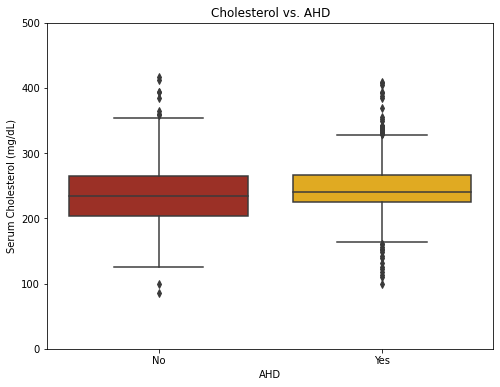

In [53]:
plt.figure(figsize=(8,6))
ahd_Chol = sns.boxplot( y=df["Chol"], x=df["AHD"])
ahd_Chol.set_title("Cholesterol vs. AHD")
ahd_Chol.set_ylabel("Serum Cholesterol (mg/dL)")
ahd_Chol.set_xticklabels(["No", "Yes"])
ahd_Chol.set_ybound(0,500)

<span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Cholesterol : 
</span>
The median of the serum cholesterol for both people with heart condition and people without seems to be very close. We did treat the outliers in the beginning, but these are because of the groupings, so they should not affect the accuracy of the model significantly. From these graphs, there is not a lot of information about the correlation. We need to look into this feature in more detail.

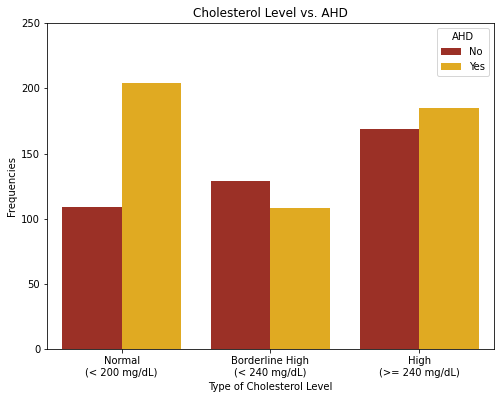

In [54]:
plt.figure(figsize=(8,6))
cholG_AHD = sns.countplot(data = df, x= "CholesterolGroups", hue="AHD")
cholG_AHD.set_title("Cholesterol Level vs. AHD")
cholG_AHD.set_xticklabels(["Normal\n(< 200 mg/dL)","Borderline High\n(< 240 mg/dL)",
                           "High\n(>= 240 mg/dL)"])
cholG_AHD.set_xlabel("Type of Cholesterol Level")
cholG_AHD.set_ylabel("Frequencies")
cholG_AHD.legend(labels = ["No", "Yes"], title="AHD")
cholG_AHD.set_ybound(0,250)

In [55]:
pd.crosstab(df["AHD"], df["CholesterolGroups"])

CholesterolGroups,0,1,2
AHD,,,
0,109,129,169
1,204,108,185


<span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Cholesterol Groups : 
</span>
As we can see from the chart above, when we look at the Cholesterol Levels, the number of people who have and do not have AHD is almost equal. However, in the group where people have normal cholesterol levels, the number of those with AHD is almost double that of those without it. In other groups, on the other hand, the number of people with and without AHD is nearly the same. It is not possible to talk about a correlation between cholesterol level and AHD just by looking at this graph.

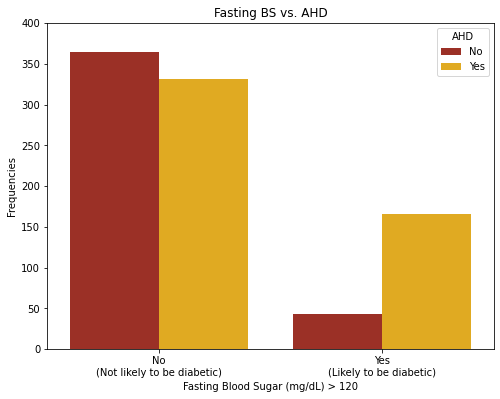

In [56]:
plt.figure(figsize=(8,6))
fbs_AHD = sns.countplot(data = df, x= "Fbs", hue="AHD")
fbs_AHD.set_xticklabels(["No\n(Not likely to be diabetic)", "Yes\n(Likely to be diabetic)"])
fbs_AHD.set_ylabel("Frequencies")
fbs_AHD.set_xlabel("Fasting Blood Sugar (mg/dL) > 120")
fbs_AHD.legend(labels = ["No", "Yes"], title="AHD")
fbs_AHD.set_title("Fasting BS vs. AHD")
fbs_AHD.set_ybound(0,400)

In [57]:
pd.crosstab(df["Fbs"], df["AHD"])

AHD,0,1
Fbs,,
0,364,331
1,43,166


<span style="color:#126782;font-weight:700;font-size:14px;">
Fasting Blood Sugar vs. AHD : 
</span>
"0" for fasting blood sugar corresponds to not likely to be diabetic, "1" corresponds to likely to be diabetic. The relationship between being likely to be diabetic and having heart disease and the significance need to be tested. There seems to be no correlation between having no disease and not being diabetic.

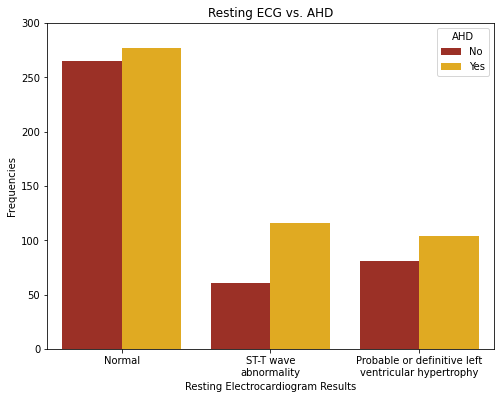

In [58]:
plt.figure(figsize=(8,6))
axs = sns.countplot(data = df, x= "RestECG", hue="AHD")
axs.set_xticklabels(["Normal", "ST-T wave\nabnormality", "Probable or definitive left\nventricular hypertrophy"])
axs.set_xlabel("Resting Electrocardiogram Results")
axs.set_ylabel("Frequencies")
axs.legend(labels = ["No", "Yes"], title="AHD")
axs.set_title("Resting ECG vs. AHD")
axs.set_ybound(0,300)

In [59]:
pd.crosstab(df["AHD"], df["RestECG"])

RestECG,0,1,2
AHD,,,
0,265,61,81
1,277,116,104


<span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Resting Electrocardiogram Results : 
</span>
"0" for ECG corresponds to normal, "1" corresponds to ST-T wave abnormality, and "2" corresponds to probable or definitive left ventricular hypertrophy. ECG is a definitive factor in determining whether some has Arteriosclerotic heart disease or not. Thus, the relationship between Arteriosclerotic heart disease and ST-T wave abnormality and probable or definitive left ventricular hypertrophy needs to be discussed in detail.

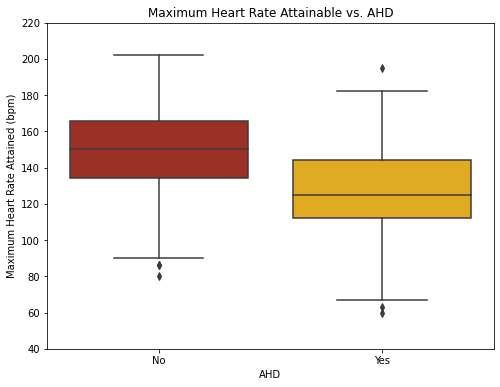

In [60]:
plt.figure(figsize=(8,6))
maxHR_AHD = sns.boxplot( y=df["MaxHR"], x=df["AHD"])
maxHR_AHD.set_ylabel("Maximum Heart Rate Attained (bpm)")
maxHR_AHD.set_title("Maximum Heart Rate Attainable vs. AHD")
maxHR_AHD.set_xticklabels(["No", "Yes"])
maxHR_AHD.set_ybound(40,220)

<span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Maximum Heart Rate : 
</span>
Median of the maximum heart rate of the people with heart disease are generally lesser compared to the people with no heart disease. Max heart rate during exercise might be hence a key indicator of a heart disease.

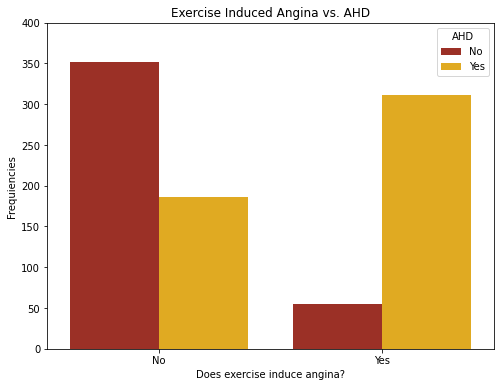

In [61]:
plt.figure(figsize=(8,6))
exang_AHD = axs = sns.countplot(data = df, x= "ExAng", hue="AHD")
exang_AHD.set_title("Exercise Induced Angina vs. AHD")
exang_AHD.set_ylabel("Frequiencies")
exang_AHD.set_xlabel("Does exercise induce angina?")
exang_AHD.set_xticklabels(["No", "Yes"])
exang_AHD.legend(labels = ["No", "Yes"], title="AHD")
exang_AHD.set_ybound(0,400)

In [62]:
pd.crosstab(df["AHD"], df["ExAng"])

ExAng,0,1
AHD,,
0,352,55
1,186,311


<span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Exercise Induced Angina : 
</span>
The relationship between exercise induced angina and having heart disease needs to be examined well to find out if there is a significance in the number of people who have Arteriosclerotic heart disease and exercise induced angina. If there is no exercise induced angina, the number of people that have heart disease seems to be lower. 

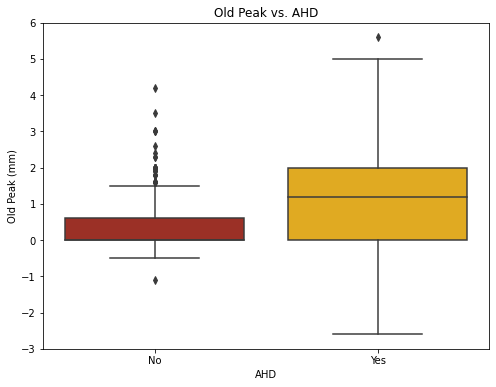

In [63]:
plt.figure(figsize=(8,6))
oldpeak_AHD = sns.boxplot( y=df["Oldpeak"], x=df["AHD"])
oldpeak_AHD.set_ylabel("Old Peak (mm)")
oldpeak_AHD.set_title("Old Peak vs. AHD")
oldpeak_AHD.set_xticklabels(["No", "Yes"])
oldpeak_AHD.set_ybound(-3,6)

<span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Old Peak : 
</span>
Considering the Old Peak distribution of patients with AHD and patients without AHD, it can be said that the Old Peak values of patients without AHD are predominantly between 0 and 0.6 mm. It can be said that the Old Peak values of patients with AHD tend to be higher than those who do not have those diseases. We can also say that the Old Peak values of patients with AHD are more dispersed.

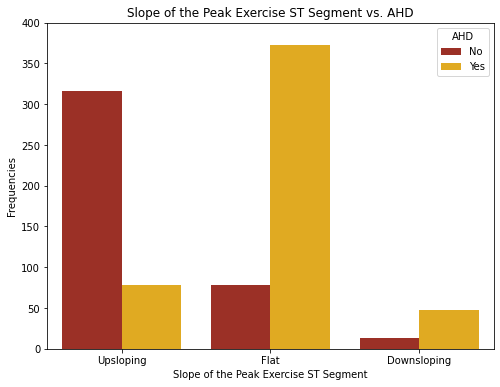

In [64]:
plt.figure(figsize=(8,6))
axs = sns.countplot(data = df, x= "Slope", hue="AHD")
axs.set_xticklabels(["Upsloping", "Flat", "Downsloping"])
axs.set_title("Slope of the Peak Exercise ST Segment vs. AHD")
axs.set_ylabel("Frequencies")
axs.set_xlabel("Slope of the Peak Exercise ST Segment")
axs.legend(labels = ["No", "Yes"], title="AHD")
axs.set_ybound(0,400)

In [65]:
pd.crosstab(df["AHD"], df["Slope"])

Slope,1,2,3
AHD,,,
0,316,78,13
1,78,372,47


 <span style="color:#126782;font-weight:700;font-size:14px;">
AHD vs. Slope of the Peak Exercise ST Segment : 
</span>
On the columns of the cross-tabulation above, "1" corresponds to "Upsloping", "2" corresponds to "Flat" and "3" corresponds to "Downsloping" for the Slope of the peak exercise ST segment. There seems to be some correlation between having a flat slope and also having Arteriosclerotic heart disease. Furthermore, there seems to be a relationship between upsloping and having no disease. These hypotheses need to be tested further to determine their correctness.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Visualization of Some Attribute Groups
    </span></center>

<span><center>
| Group 1     | Group 2 |   Group 3  |   Group 4   |   Group 5   |   Group 6   |   Group 7  |  Group 8 | Group 9 |
|-------------|---------|:----------:|:-----------:|:-----------:|:-----------:|:----------:|:--------:|:-------:|
|     Age     |   Age   | Chest Pain |    ExAng    |    ExAng    |    ExAng    | Resting BP | Rest ECG | Age     |
|     Sex     |   Sex   |     FBS    | Cholesterol | Cholesterol | Cholesterol |  Rest ECG  | MaxHR    | MaxHR   |
| Cholesterol |  ExAng  |    ExAng   |  Chest Pain |    RestBP   |  Age Groups | Chest Pain | Sex      | FBS     |
</center><span>


In [66]:
sns.set_palette(sns.color_palette(colors))
ahd_data = df[df["AHD"] == 1]
non_ahd_data = df[df["AHD"] == 0]

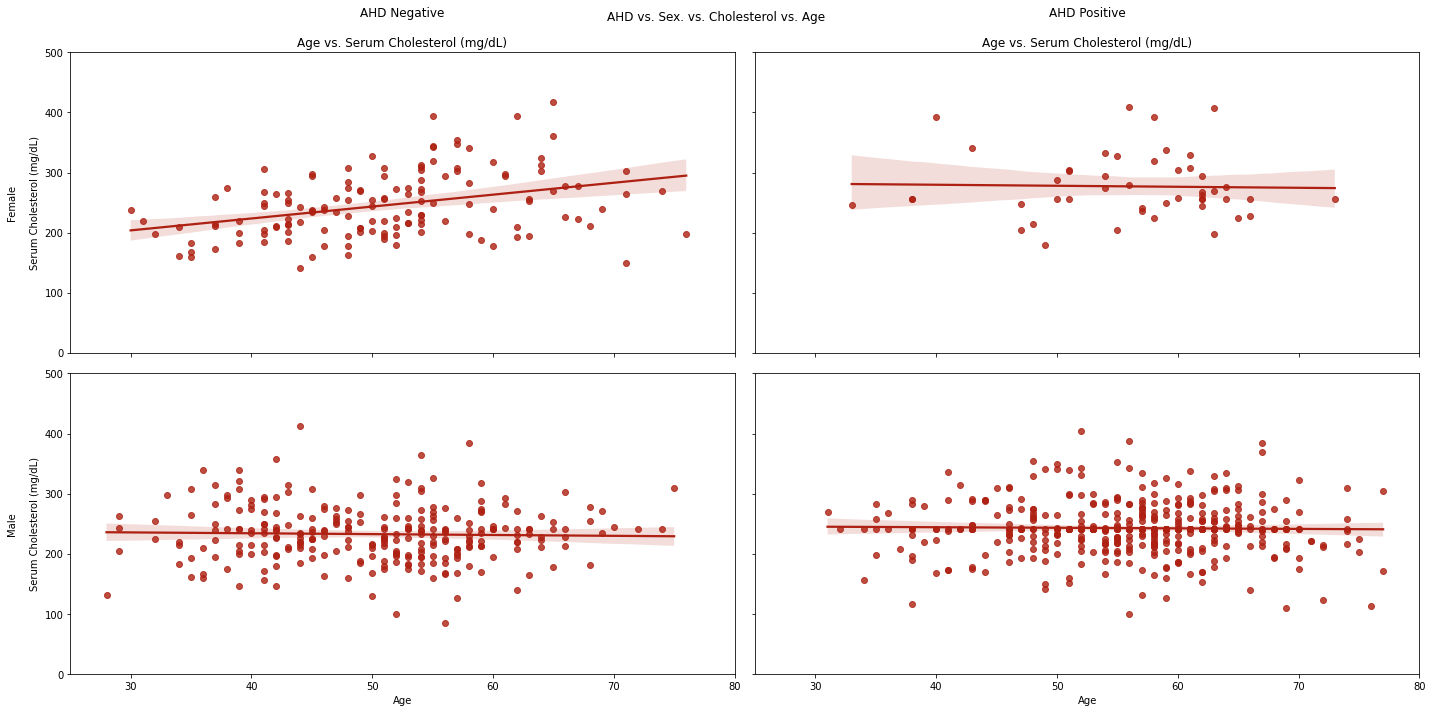

In [67]:
# Group 1: Age vs. Sex vs. Chol

male_ahd_present = df[ (df["AHD"]== 1) & (df["Sex"]== 1)]
male_ahd_not_present = df[ (df["AHD"]== 0) & (df["Sex"]== 1)]
female_ahd_present = df[ (df["AHD"]== 1) & (df["Sex"]== 0)]
female_ahd_not_present = df[ (df["AHD"]== 0) & (df["Sex"]== 0)]

fig, axes = plt.subplots(2, 2, figsize=(20,10), sharey= True, sharex=True)
fig.suptitle("AHD vs. Sex. vs. Cholesterol vs. Age")

sns.regplot(ax = axes[0, 0], data= female_ahd_not_present, x= "Age", y= "Chol")
axes[0,0].set_ybound(0,500)
axes[0,0].set_xbound(25,80)
axes[0,0].set_ylabel("Female\n\nSerum Cholesterol (mg/dL)")
axes[0,0].set_title("AHD Negative\n\nAge vs. Serum Cholesterol (mg/dL)")
axes[0,0].set_xlabel("")

sns.regplot(ax = axes[0, 1], data= female_ahd_present, x= "Age", y= "Chol")
axes[0,1].set_ybound(0,500)
axes[0,1].set_xbound(25,80)
axes[0,1].set_title("AHD Positive\n\nAge vs. Serum Cholesterol (mg/dL)")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")

sns.regplot(ax = axes[1, 0], data= male_ahd_not_present, x= "Age", y= "Chol")
axes[1,0].set_ybound(0,500)
axes[1,0].set_xbound(25,80)
axes[1,0].set_ylabel("Male\n\nSerum Cholesterol (mg/dL)")

sns.regplot(ax = axes[1, 1], data= male_ahd_present, x= "Age", y= "Chol")
axes[1,1].set_ybound(0,500)
axes[1,1].set_xbound(25,80)
axes[1,1].set_ylabel("")

plt.tight_layout()
plt.show()

<span style="color:#126782;font-weight:700;font-size:14px;">
Age vs. Sex vs. Cholesterol vs. AHD 
</span>

<br>

If we look at the upper left graph, we observe that cholesterol levels increase as age increases in women who do not have AHD. Besides, a positive correlation between age and cholesterol level can be mentioned in this chart.

If we look at the upper right graph, we observe that cholesterol levels nearly stay the same as the age increases in women who have AHD. Besides, no correlation between age and cholesterol level can be mentioned in this chart.

If we look at the bottom left graph, we observe that cholesterol levels nearly stay the same as the age increases in men who do not have AHD. Besides, no correlation between age and cholesterol level can be mentioned in this chart.

If we look at the bottom right graph, we observe that cholesterol levels nearly stay the same as the age increases in men who have AHD. Besides, no correlation between age and cholesterol level can be mentioned in this chart.

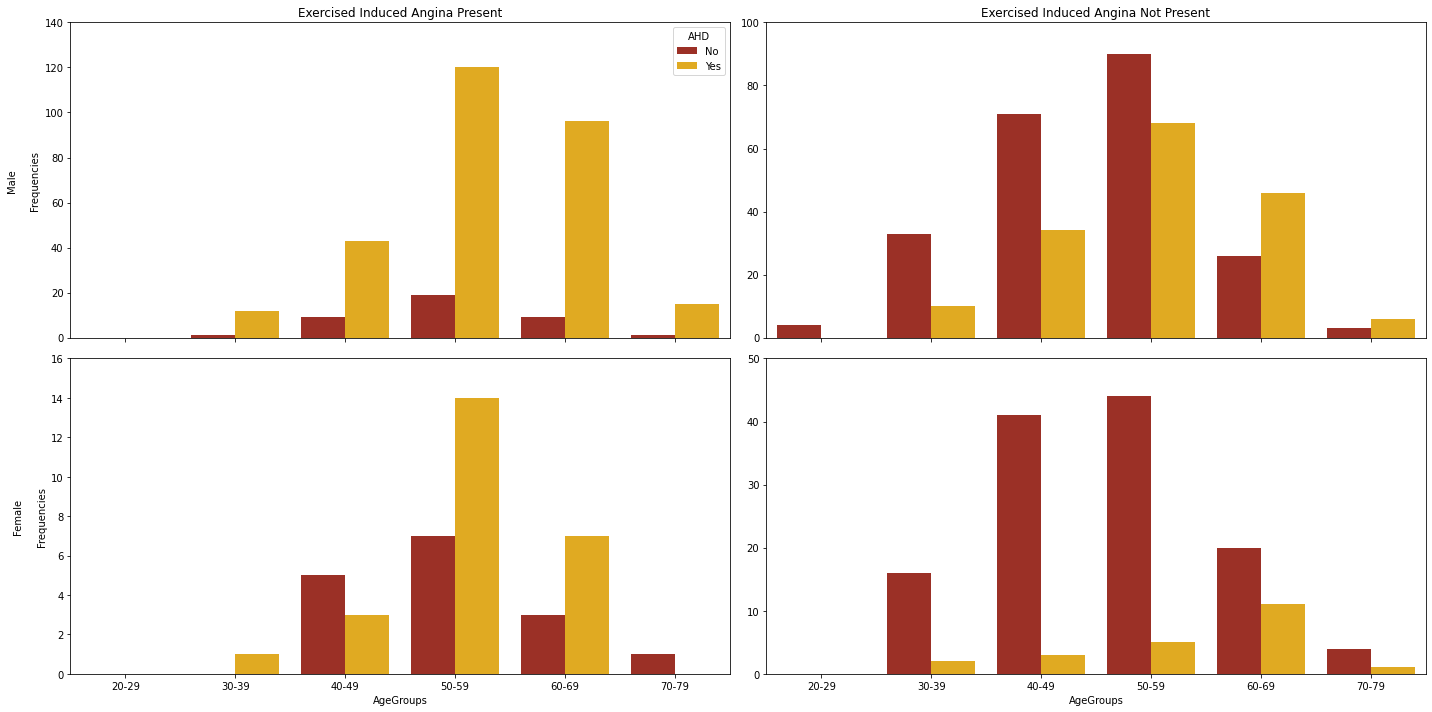

In [68]:
# Age vs. Sex vs. ExAng vs. AHD
exAngY_male = df[ (df["ExAng"]== 1) & (df["Sex"]== 1)]
exAngN_male = df[ (df["ExAng"]== 0) & (df["Sex"]== 1)]
exAngY_female = df[ (df["ExAng"]== 1) & (df["Sex"]== 0)]
exAngN_female = df[ (df["ExAng"]== 0) & (df["Sex"]== 0)]

fig, axes = plt.subplots(2, 2, figsize=(20,10))

sns.countplot(ax = axes[0,0], data = exAngY_male, x = "AgeGroups", hue="AHD")
axes[0,0].set_title("Exercised Induced Angina Present")
axes[0,0].set_ylabel("Male\n\nFrequencies")
axes[0,0].set_xticklabels([])
axes[0,0].set_xlabel("")
axes[0,0].legend(title = "AHD", labels = ["No", "Yes"])
axes[0,0].set_ybound(0,140)

sns.countplot(ax = axes[0,1], data = exAngN_male, x = "AgeGroups", hue="AHD")
axes[0,1].set_xticklabels([])
axes[0,1].set_title("Exercised Induced Angina Not Present")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")
axes[0,1].legend().remove()
axes[0,1].set_ybound(0,100)

sns.countplot(ax = axes[1,0], data = exAngY_female, x = "AgeGroups",  hue = "AHD")
axes[1,0].set_ylabel("Female\n\nFrequencies")
axes[1,0].set_xticklabels(["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])
axes[1,0].legend().remove()
axes[1,0].set_ybound(0,16)

sns.countplot(ax = axes[1,1], data = exAngN_female, x = "AgeGroups", hue="AHD")
axes[1,1].set_xticklabels(["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])
axes[1,1].set_ylabel("")
axes[1,1].legend().remove()
axes[1,1].set_ybound(0,50)

plt.tight_layout()

<span style="color:#126782;font-weight:700;font-size:14px;">
Age Groups vs. Sex vs. Exercise Induced Angina vs. AHD 
</span>

When looking at the upper left graph, the number of people who have AHD is increasing, which have the Exercised Induced Angina, as the age increases. Moreover, when looking at this graph, it is possible to talk about a positive correlation because as age increases, we can say that the number of people with AHD increases. Moreover, for almost every group, the number of people with AHD is greater than the number of people who do not have AHD.

When looking at the bottom left graph, AHD is normally distributed in female age groups, which have the Exercised Induced Angina. The reason we can talk about the normal distribution here is that the AHD decreases as we move away from the middle of the chart when it is at a peak level. Moreover, for almost every group, the number of people with AHD is greater than the number of people who do not have AHD.

When looking at the upper right graph, AHD is normally distributed in male age groups, which do not have the Exercised Induced Angina. The reason we can talk about the normal distribution here is that the AHD decreases as we move away from the middle of the chart when it is at a peak level. Moreover, for almost every group, the number of people with AHD is lower than the number of people who do not have AHD.

When looking at the bottom right graph, AHD is normally distributed in female age groups, which do not have the Exercised Induced Angina. The reason we can talk about the normal distribution here is that the AHD decreases as we move away from the middle of the chart when it is at a peak level. Moreover, for almost every group, the number of people with AHD is lower than the number of people who do not have AHD.

If we look at these four charts in general, it can be said that AHD is more common in people with Exercised Induced Angina.

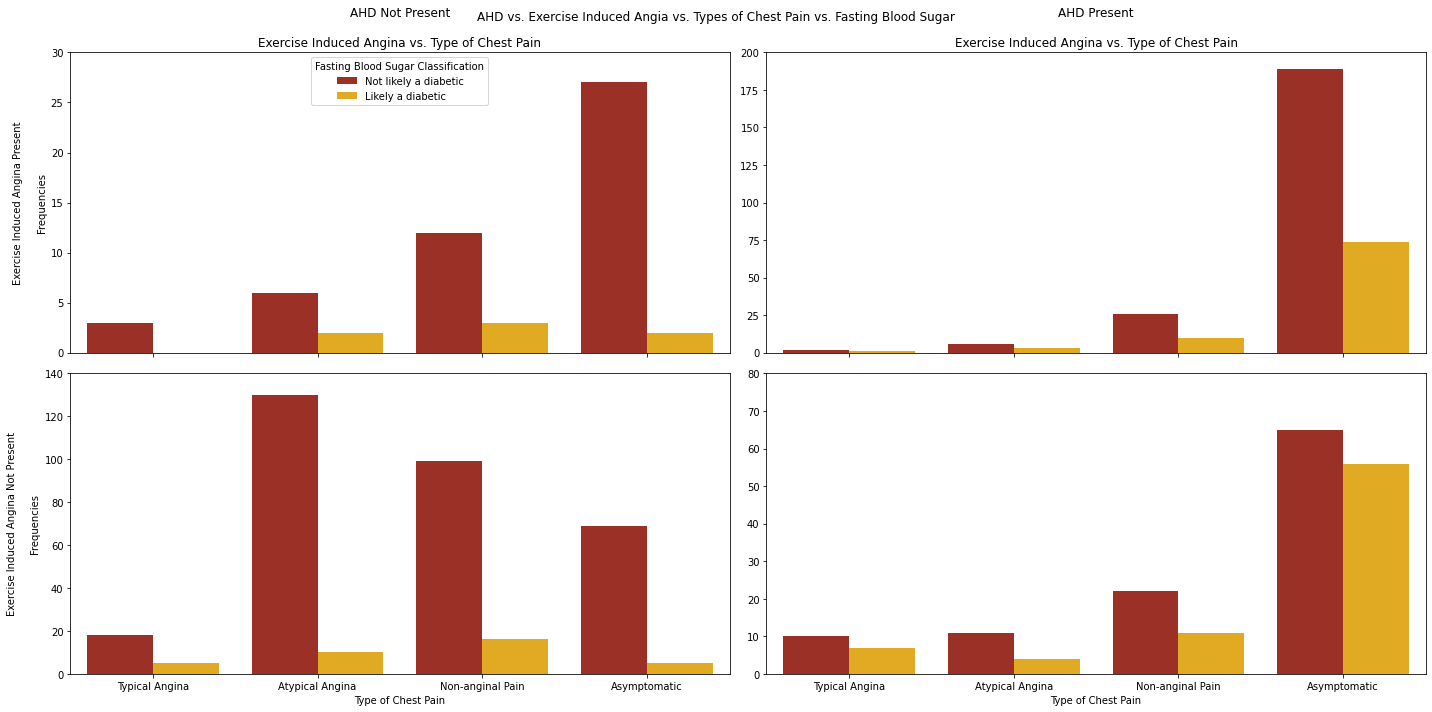

In [69]:
# ExAngia vs. FBS vs. Type of Chest Pain vs. AHD
exAngY_ahdY = df[(df["ExAng"] == 1) & (df["AHD"] == 1)]
exAngY_ahdN = df[(df["ExAng"] == 1) & (df["AHD"] == 0)]
exAngN_ahdY = df[(df["ExAng"] == 0) & (df["AHD"] == 1)]
exAngN_ahdN = df[ (df["ExAng"]== 0) & (df["AHD"]== 0)]

fig, axes = plt.subplots(2, 2, figsize=(20,10))

fig.suptitle("AHD vs. Exercise Induced Angia vs. Types of Chest Pain vs. Fasting Blood Sugar")

sns.countplot(ax = axes[0,0], data = exAngY_ahdN, x = "ChestPain", hue = "Fbs")
axes[0,0].set_title("AHD Not Present\n\nExercise Induced Angina vs. Type of Chest Pain")
axes[0,0].set_ylabel("Exercise Induced Angina Present\n\nFrequencies")
axes[0,0].set_xlabel("")
axes[0,0].set_xticklabels([])
axes[0,0].legend(labels = ["Not likely a diabetic", "Likely a diabetic"], title = "Fasting Blood Sugar Classification")
axes[0,0].set_ybound(0,30)

sns.countplot(ax = axes[0,1], data = exAngY_ahdY, x = "ChestPain", hue = "Fbs")
axes[0,1].set_title("AHD Present\n\nExercise Induced Angina vs. Type of Chest Pain")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")
axes[0,1].set_xticklabels([])
axes[0,1].legend().remove()
axes[0,1].set_ybound(0,200)

sns.countplot(ax = axes[1,0], data = exAngN_ahdN, x = "ChestPain", hue = "Fbs")
axes[1,0].set_ylabel("Exercise Induced Angina Not Present\n\nFrequencies")
axes[1,0].set_xlabel("Type of Chest Pain")
axes[1,0].set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
axes[1,0].legend().remove()
axes[1,0].set_ybound(0,140)

sns.countplot(ax = axes[1,1], data = exAngN_ahdY, x = "ChestPain", hue = "Fbs")
axes[1,1].set_xlabel("Type of Chest Pain")
axes[1,1].set_ylabel("")
axes[1,1].set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
axes[1,1].legend().remove()
axes[1,1].set_ybound(0,80)

plt.tight_layout()

<span style="color:#126782;font-weight:700;font-size:14px;">
Type of Chest Pain vs. Fasting Blood Sugar vs. Exercise Induced Angina vs. AHD 
</span>

 In the graph at the top left, we see the frequency of having Exercise Induced Angina versus types of chest pain. Moreover, people in that group do not have AHD. One observation we can make here is that as we move from left to right on the x-axis in the graph, we see that the proportion of people with diabetes to people who do not have it is decreasing.  That is, the number of people without diabetes in all types of chest pain is more frequent than those with diabetes.


In the graph at the bottom left, we see the frequency of not having Exercise Induced Angina versus types of chest pain. Moreover, people in that group do not have AHD as well. One observation we can make here is that as we move from left to right from the middle point of the graph, we see that the frequencies are decreasing.  That is graphic looks kind of normally distributed. Also, the number of people without diabetes in all types of chest pains is higher compared to the people who have likely to have diabetes.

 In the graph at the top right, we see the frequency of having Exercise-Induced Angina versus types of chest pain. Moreover, people in that group have AHD. One observation we can make here is that as we move from left to right on the x-axis in the graph, we see that the proportion of people with diabetes to people who do not have it is decreasing.  That is, the number of people without diabetes in all types of chest pain is more frequent than those with diabetes. Another observation that stands out here is that there are quite a few people in types other than the asymptomatic chest pain type, with other criteria remaining the same.

In the graph at the bottom right, we see the frequency of not having Exercise Induced Angina versus types of chest pain. Moreover, people in that group have AHD. One observation we can make here is that as we move from left to right on the x-axis in the graph, we see that the proportion of people with diabetes to people who do not have it is decreasing.  That is, the number of people without diabetes in all types of chest pain is more frequent than those with diabetes.

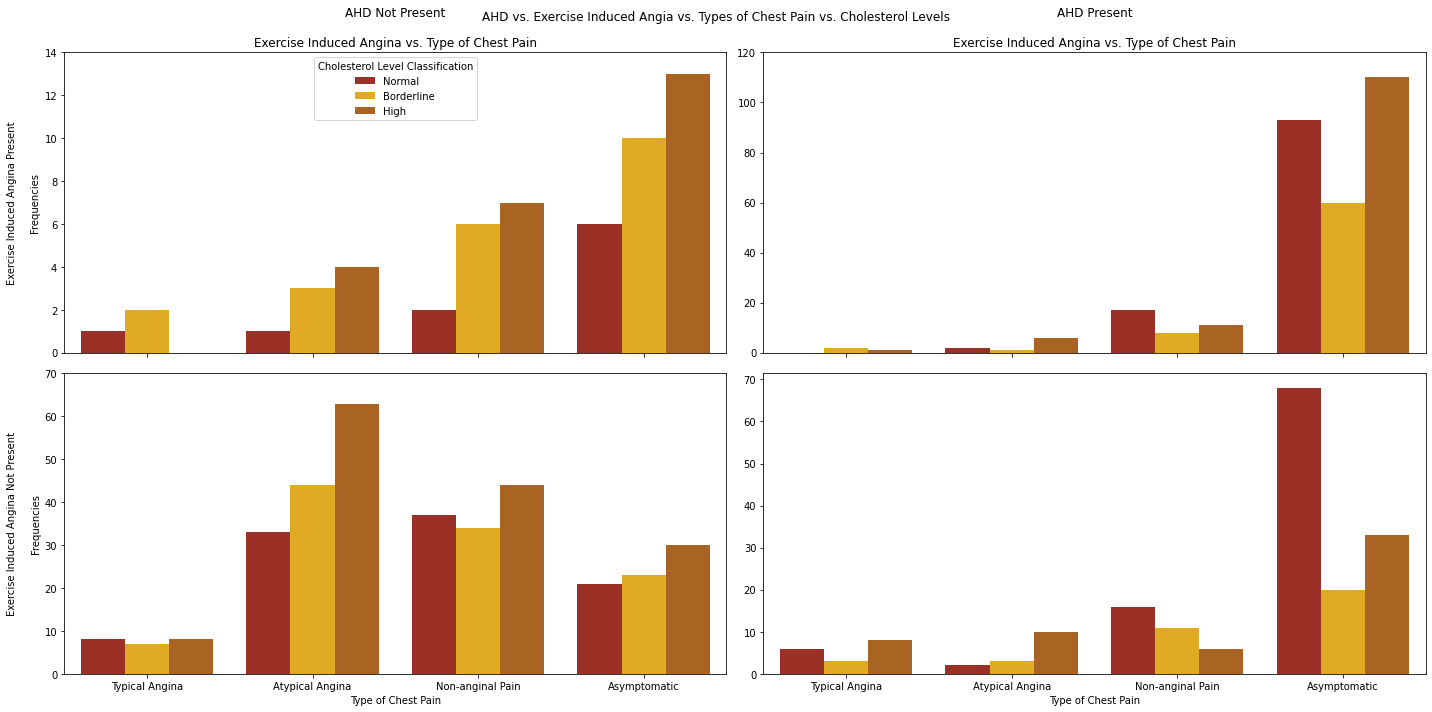

In [70]:
# ExAngia vs. Cholesterol Groups vs. Type of Chest Pain vs. AHD
exAngY_ahdY = df[(df["ExAng"] == 1) & (df["AHD"] == 1)]
exAngY_ahdN = df[(df["ExAng"] == 1) & (df["AHD"] == 0)]
exAngN_ahdY = df[(df["ExAng"] == 0) & (df["AHD"] == 1)]
exAngN_ahdN = df[(df["ExAng"] == 0) & (df["AHD"] == 0)]

fig, axes = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle("AHD vs. Exercise Induced Angia vs. Types of Chest Pain vs. Cholesterol Levels")

sns.countplot(ax = axes[0,0], data = exAngY_ahdN, x = "ChestPain", hue = "CholesterolGroups")
axes[0,0].set_title("AHD Not Present\n\nExercise Induced Angina vs. Type of Chest Pain")
axes[0,0].set_ylabel("Exercise Induced Angina Present\n\nFrequencies")
axes[0,0].set_xlabel("")
axes[0,0].set_xticklabels([])
axes[0,0].legend(labels = ["Normal", "Borderline", "High"], title = "Cholesterol Level Classification")
axes[0,0].set_ybound(0,14)

sns.countplot(ax = axes[0,1], data = exAngY_ahdY, x = "ChestPain", hue = "CholesterolGroups")
axes[0,1].set_title("AHD Present\n\nExercise Induced Angina vs. Type of Chest Pain")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")
axes[0,1].set_xticklabels([])
axes[0,1].legend().remove()
axes[0,1].set_ybound(0,120)

sns.countplot(ax = axes[1,0], data = exAngN_ahdN, x = "ChestPain", hue = "CholesterolGroups")
axes[1,0].set_ylabel("Exercise Induced Angina Not Present\n\nFrequencies")
axes[1,0].set_xlabel("Type of Chest Pain")
axes[1,0].set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
axes[1,0].legend().remove()
axes[1,0].set_ybound(0,70)

sns.countplot(ax = axes[1,1], data = exAngN_ahdY, x = "ChestPain", hue = "CholesterolGroups")
axes[1,1].set_xlabel("Type of Chest Pain")
axes[1,1].set_ylabel("")
axes[1,1].set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
axes[1,1].legend().remove()

plt.tight_layout()

<span style="color:#126782;font-weight:700;font-size:14px;">
Cholesterol Groups vs. Type of Chest Pain vs. Exercise Induced Angina vs. AHD
</span>

 For the graph on the top left, we see frequencies of cholesterol levels corresponding to chest pain types in people who do not have AHD but have Exercise Induced Angina. We see that frequencies of high cholesterol levels dominate almost all types of chest pain. Moreover, in the graph, we see more people as we move from left to right on the x-axis.


For the graph on the bottom left, we see frequencies of cholesterol levels corresponding to chest pain types in people who do not have AHD and do not have Exercise Induced Angina. We see that frequencies of high cholesterol levels dominate all types of chest pain again. We can also tell by looking at the shape of the chart that the distribution is approximately normal.

 For the graph on the top right, we see frequencies of cholesterol levels corresponding to chest pain types in people who have AHD and have Exercise Induced Angina. In the graph, we see more people as we move from left to right on the x-axis.

For the graph on the bottom right, we see frequencies of cholesterol levels corresponding to chest pain types in people who have AHD but do not have Exercise Induced Angina. In the graph, we see more people as we move from left to right on the x-axis.

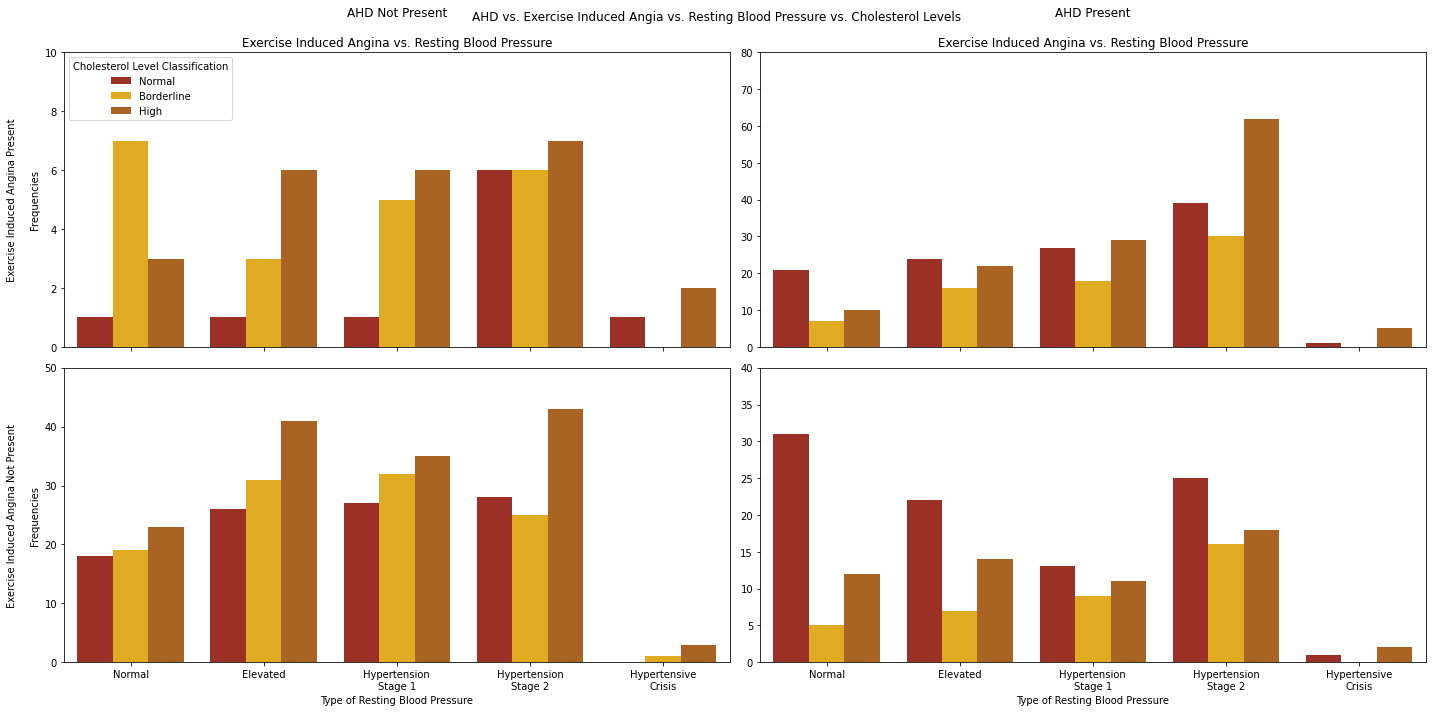

In [71]:
# ExAngia vs. Cholesterol Groups vs. RestBP vs. AHD
exAngY_ahdY = df[(df["ExAng"] == 1) & (df["AHD"] == 1)]
exAngY_ahdN = df[(df["ExAng"] == 1) & (df["AHD"] == 0)]
exAngN_ahdY = df[(df["ExAng"] == 0) & (df["AHD"] == 1)]
exAngN_ahdN = df[(df["ExAng"] == 0) & (df["AHD"] == 0)]

fig, axes = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle("AHD vs. Exercise Induced Angia vs. Resting Blood Pressure vs. Cholesterol Levels")

sns.countplot(ax = axes[0,0], data = exAngY_ahdN, x = "RestBPGroups", hue = "CholesterolGroups")
axes[0,0].set_title("AHD Not Present\n\nExercise Induced Angina vs. Resting Blood Pressure")
axes[0,0].set_ylabel("Exercise Induced Angina Present\n\nFrequencies")
axes[0,0].set_xlabel("")
axes[0,0].set_xticklabels([])
axes[0,0].legend(labels = ["Normal", "Borderline", "High"], title = "Cholesterol Level Classification")
axes[0,0].set_ybound(0,10)
sns.countplot(ax = axes[0,1], data = exAngY_ahdY, x = "RestBPGroups", hue = "CholesterolGroups")
axes[0,1].set_title("AHD Present\n\nExercise Induced Angina vs. Resting Blood Pressure")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")
axes[0,1].set_xticklabels([])
axes[0,1].legend().remove()
axes[0,1].set_ybound(0,80)
sns.countplot(ax = axes[1,0], data = exAngN_ahdN, x = "RestBPGroups", hue = "CholesterolGroups")
axes[1,0].set_ylabel("Exercise Induced Angina Not Present\n\nFrequencies")
axes[1,0].set_xlabel("Type of Resting Blood Pressure")
axes[1,0].set_xticklabels(["Normal", "Elevated", "Hypertension\nStage 1",
                    "Hypertension\nStage 2", "Hypertensive\nCrisis"])
axes[1,0].legend().remove()
axes[1,0].set_ybound(0,50)
sns.countplot(ax = axes[1,1], data = exAngN_ahdY, x = "RestBPGroups", hue = "CholesterolGroups")
axes[1,1].set_xlabel("Type of Resting Blood Pressure")
axes[1,1].set_ylabel("")
axes[1,1].set_xticklabels(["Normal", "Elevated", "Hypertension\nStage 1",
                    "Hypertension\nStage 2", "Hypertensive\nCrisis"])
axes[1,1].legend().remove()
axes[1,1].set_ybound(0,40)

plt.tight_layout()

<span style="color:#126782;font-weight:700;font-size:14px;">
Cholesterol Levels vs. Resting Blood Pressure Classification vs. Exercise Induced Angina vs. AHD </span>

In the graph at the top left, we see the frequency of having Exercise Induced Angina versus the type of Resting Blood Pressure. Moreover, people in that group do not have AHD. While all resting blood pressure groups have people with borderline cholesterol levels, the hypertensive crisis does not have people with borderline cholesterol levels. In addition, in almost all resting blood pressure groups, the number of people with normal levels of cholesterol is quite small. This may indicate a correlation between increased resting blood pressure and cholesterol levels.


In the graph at the bottom left, we see the frequency of not having Exercise Induced Angina versus the type of Resting Blood Pressure. Moreover, people in that group do not have AHD. While all resting blood pressure groups have people with normal cholesterol levels, the hypertensive crisis does not have people with normal cholesterol levels. In addition, in all resting blood pressure groups, the number of people with high levels of cholesterol is dominating. Furthermore, each resting blood pressure group has a nearly equal number of people for almost all types of cholesterol levels in itself. Maybe we can say that while resting blood pressure is increasing in people with no Exercise Induced Angina is increasing until the hypertensive crisis group. In other words, there can be a positive correlation.


In the graph at the top right, we see the frequency of having Exercise Induced Angina versus the type of Resting Blood Pressure. Moreover, people in that group have AHD. While all resting blood pressure groups have people with borderline cholesterol levels, again hypertensive crisis does not have people with borderline cholesterol levels. Besides, each resting blood pressure group has a nearly equal number of people for almost all types of cholesterol levels in itself. Maybe we can say that while resting blood pressure is increasing people with Exercise Induced Angina is increasing until the hypertensive crisis group. In other words, there can be a positive correlation. 


In the graph at the bottom right, we see the frequency of not having Exercise Induced Angina versus the type of Resting Blood Pressure. Moreover, people in that group have AHD. While all resting blood pressure groups have people with borderline cholesterol levels, again hypertensive crisis does not have people with borderline cholesterol levels. In addition, in almost all resting blood pressure groups, the number of people with normal levels of cholesterol is dominating. Maybe we can say that while resting blood pressure is increasing people with no Exercise Induced Angina is increasing in the hypertensive crisis group. In other words, there can be a positive correlation.

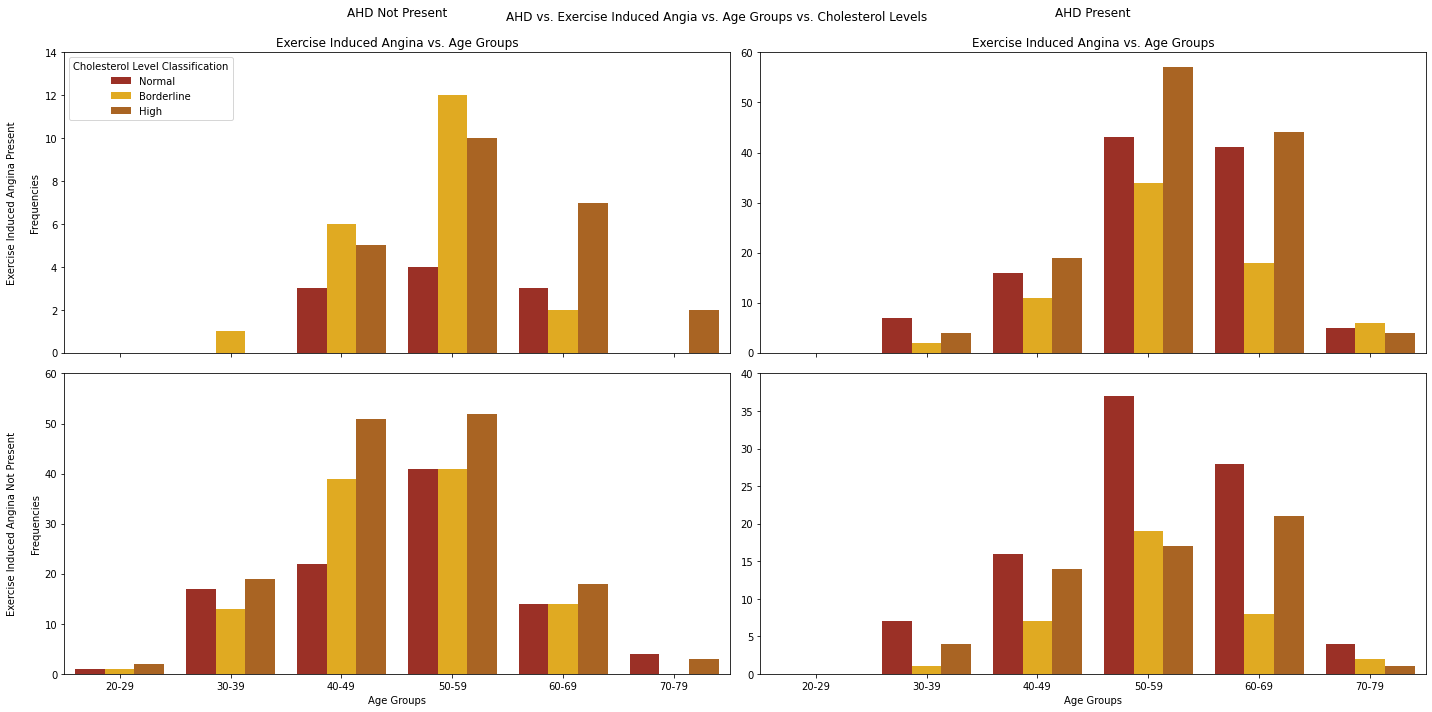

In [72]:
# ExAngia vs. Cholesterol Groups vs. AgeGroups vs. AHD
exAngY_ahdY = df[(df["ExAng"] == 1) & (df["AHD"] == 1)]
exAngY_ahdN = df[(df["ExAng"] == 1) & (df["AHD"] == 0)]
exAngN_ahdY = df[(df["ExAng"] == 0) & (df["AHD"] == 1)]
exAngN_ahdN = df[(df["ExAng"] == 0) & (df["AHD"] == 0)]

fig, axes = fig, axes = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle("AHD vs. Exercise Induced Angia vs. Age Groups vs. Cholesterol Levels")

sns.countplot(ax = axes[0,0], data = exAngY_ahdN, x = "AgeGroups", hue = "CholesterolGroups")
axes[0,0].set_title("AHD Not Present\n\nExercise Induced Angina vs. Age Groups")
axes[0,0].set_ylabel("Exercise Induced Angina Present\n\nFrequencies")
axes[0,0].set_xlabel("")
axes[0,0].set_xticklabels([])
axes[0,0].legend(labels = ["Normal", "Borderline", "High"], title = "Cholesterol Level Classification", 
                 loc = "upper left")
axes[0,0].set_ybound(0,14)
sns.countplot(ax = axes[0,1], data = exAngY_ahdY, x = "AgeGroups", hue = "CholesterolGroups")
axes[0,1].set_title("AHD Present\n\nExercise Induced Angina vs. Age Groups")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")
axes[0,1].set_xticklabels([])
axes[0,1].legend().remove()
axes[0,1].set_ybound(0,60)
sns.countplot(ax = axes[1,0], data = exAngN_ahdN, x = "AgeGroups", hue = "CholesterolGroups")
axes[1,0].set_ylabel("Exercise Induced Angina Not Present\n\nFrequencies")
axes[1,0].set_xlabel("Age Groups")
axes[1,0].set_xticklabels(["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])
axes[1,0].legend().remove()
axes[1,0].set_ybound(0,60)
sns.countplot(ax = axes[1,1], data = exAngN_ahdY, x = "AgeGroups", hue = "CholesterolGroups")
axes[1,1].set_xlabel("Age Groups")
axes[1,1].set_ylabel("")
axes[1,1].set_xticklabels(["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])
axes[1,1].legend().remove()
axes[1,1].set_ybound(0,40)

plt.tight_layout()

<span style="color:#126782;font-weight:700;font-size:14px;">
Age Groups vs. Cholesterol Level Classification vs. Exercise Induced Angina vs. AHD
</span>


In the graph at the top left, we see the frequency of having Exercise Induced Angina versus age groups. Moreover, people in that group do not have AHD. While we find almost no patients in the 20-29, 30-39, and 70-79 age groups, we get the peak in the 50-59 age group. We also find 3 types of cholesterol levels in all 40-49, 50-59, and 60-69 age groups. It is also possible to talk about approximately normal distribution by looking at the shape of the chart.


In the graph at the bottom left, we see the frequency of not having Exercise Induced Angina versus age groups. Moreover, people in that group do not have AHD. This time, we have patients in all age groups and the chart peaks in the range of 40-59. We also find 3 types of cholesterol levels in all groups except the 70-79 age group.  It is also possible to talk about approximately normal distribution by looking at the shape of the chart.


In the graph at the top right, we see the frequency of having Exercise Induced Angina versus age groups. Moreover, people in that group have AHD. We have patients in all age groups except the 20-20 age group and the chart peaks in the range of 50-59. We also find 3 types of cholesterol levels in all age groups. It is also possible to talk about approximately normal distribution by looking at the shape of the chart.


In the graph at the bottom right, we see the frequency of not having Exercise Induced Angina versus age groups. Moreover, people in that group have AHD. Again, we have patients in all age groups except the 20-20 age group, and the chart peaks in the range of 50-59. We also find 3 types of cholesterol levels in all age groups. It is also possible to talk about approximately normal distribution by looking at the shape of the chart.

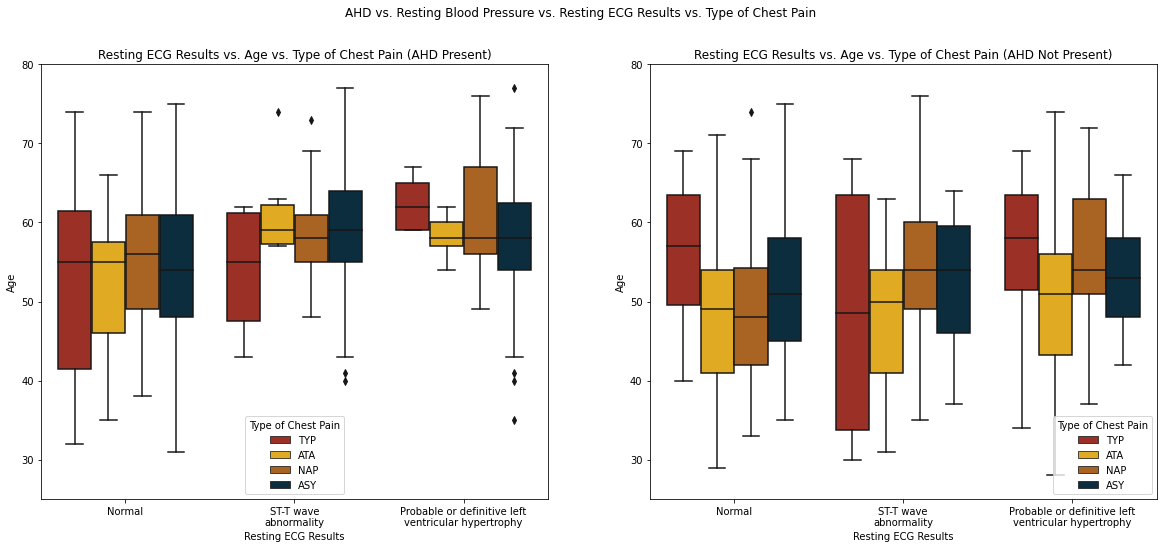

In [73]:
# RestBP vs. Age vs. ChestPain
fig, axes = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle("AHD vs. Resting Blood Pressure vs. Resting ECG Results vs. Type of Chest Pain")
sns.boxplot(ax=axes[0], data= ahd_data, y= "Age", x= "RestECG", hue="ChestPain")
axes[0].set_title("Resting ECG Results vs. Age vs. Type of Chest Pain (AHD Present)")
axes[0].set_ylabel("Age")
axes[0].set_xlabel("Resting ECG Results")
axes[0].set_xticklabels(["Normal", "ST-T wave\nabnormality", "Probable or definitive left\nventricular hypertrophy"])
labels =["TYP", "ATA", "NAP", "ASY"]
h, l = axes[0].get_legend_handles_labels()
axes[0].legend(h, labels, title= "Type of Chest Pain")
axes[0].set_ybound(25,80)

sns.boxplot(ax=axes[1], data= non_ahd_data, y= "Age", x= "RestECG", hue="ChestPain")
axes[1].set_title("Resting ECG Results vs. Age vs. Type of Chest Pain (AHD Not Present)")
axes[1].set_ylabel("Age")
axes[1].set_xlabel("Resting ECG Results")
axes[1].set_xticklabels(["Normal", "ST-T wave\nabnormality", "Probable or definitive left\nventricular hypertrophy"])
labels =["TYP", "ATA", "NAP", "ASY"]
h, l = axes[1].get_legend_handles_labels()
axes[1].legend(h, labels, title= "Type of Chest Pain")
axes[1].set_ybound(25,80)


<span style="color:#126782;font-weight:700;font-size:14px;">
Age vs. Resting ECG vs. Type of Chest Pain vs. AHD </span>

The chart on the left shows the age distribution of people with AHD according to Resting ECG results. Moreover, we separated the resting ECG groups according to the type of chest pain in themselves. Looking at the graph from the most general perspective, we can say that the age distribution of the group that makes up people with normal resting ECG results has approximately the lowest median, the group that makes up people with probable or definitive left ventricular hypertrophy has approximately the highest median, and the group with the ST-T wave abnormality has a median between the median values of the other two groups. We also see outliers in groups other than the group with normal resting ECG results.


The chart on the right shows the age distribution of people with not have AHD according to Resting ECG results. Moreover, we separated the resting ECG groups according to the type of chest pain in themselves. Looking at the graph from the most general perspective, we can say that the median of the age distribution of the groups is approximately the same. Furthermore, we observe outliers just in the people who have normal resting ECG results.

Text(0.5, 1.0, 'Maximum HR vs. Resting ECG vs. Sex (AHD Not Present)')

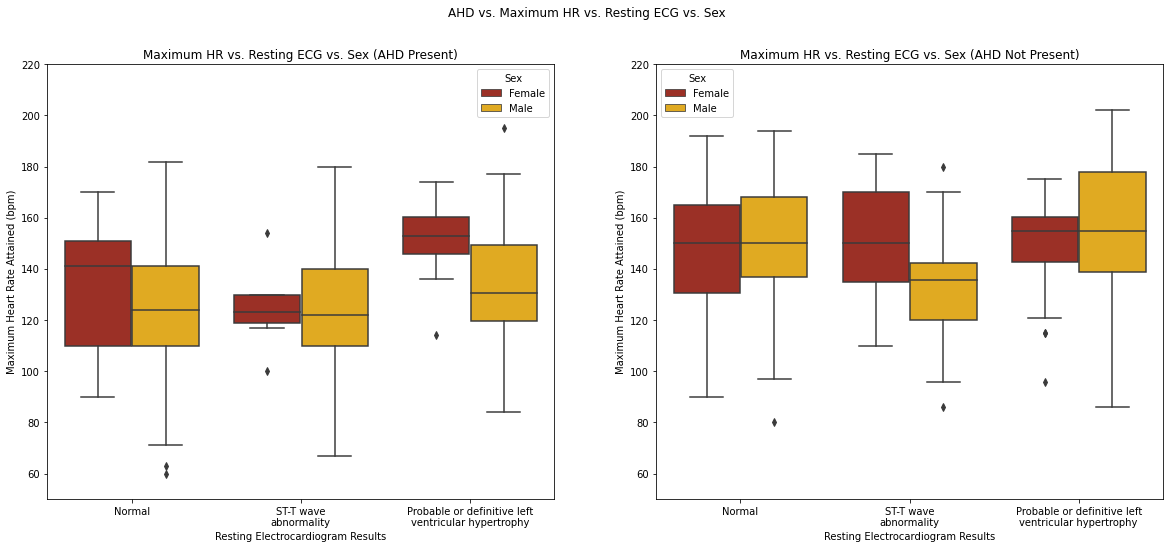

In [74]:
# RestEcg vs. MaxHR vs. Sex
fig, axes = plt.subplots(1, 2, figsize=(20,8))
fig.suptitle("AHD vs. Maximum HR vs. Resting ECG vs. Sex")
sns.boxplot(ax= axes[0], data = ahd_data, x = "RestECG", y="MaxHR", hue="Sex")
axes[0].set_ybound(50,220)
axes[0].set_xlabel("Resting Electrocardiogram Results")
axes[0].set_xticklabels(["Normal", "ST-T wave\nabnormality", "Probable or definitive left\nventricular hypertrophy"])
h, l = axes[0].get_legend_handles_labels()
axes[0].legend(h,["Female", "Male"], title = "Sex")
axes[0].set_ylabel("Maximum Heart Rate Attained (bpm)")
axes[0].set_title("Maximum HR vs. Resting ECG vs. Sex (AHD Present)")


sns.boxplot(ax= axes[1], data =non_ahd_data, x = "RestECG", y="MaxHR", hue="Sex")
axes[1].set_ybound(50,220)
axes[1].set_xlabel("Resting Electrocardiogram Results")
axes[1].set_xticklabels(["Normal", "ST-T wave\nabnormality", "Probable or definitive left\nventricular hypertrophy"])
h, l = axes[1].get_legend_handles_labels()
axes[1].legend(h,["Female", "Male"], title = "Sex")
axes[1].set_ylabel("Maximum Heart Rate Attained (bpm)")
axes[1].set_title("Maximum HR vs. Resting ECG vs. Sex (AHD Not Present)")

<span style="color:#126782;font-weight:700;font-size:14px;">
Maximum Heart Rate vs. Resting ECG vs. Sex vs. AHD </span>

The chart on the left shows the maximum heart rate distribution of people with AHD according to Resting ECG results. Moreover, we separated the resting ECG groups according to sex. When we look at the box plots on the left, we see that the maximum heart rate of people with normal ECG results has a higher IQR in females, but in the rest of the groups, males’ IQRs always look wider than females’ IQRs. In addition, we see outliers in all resting ECG groups.


The chart on the right shows the maximum heart rate distribution of people with not have AHD according to Resting ECG results. Moreover, we separated the resting ECG groups according to sex. Apart from the middle group, that is, the group with ST-T wave abnormality, the median of other groups is almost the same in males and females, while females in this group have a higher median. In addition, we see outliers in all resting ECG groups.

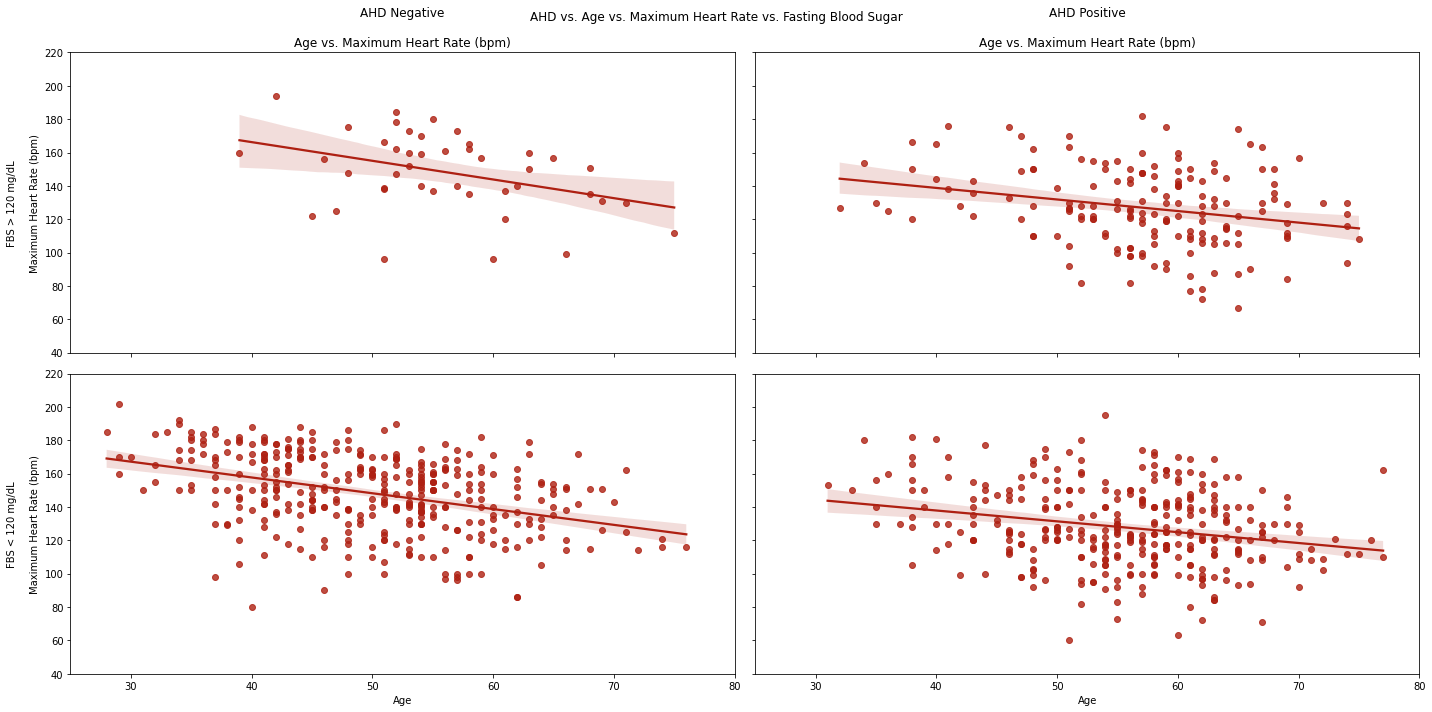

In [75]:
fbsP_ahd_present = df[(df["AHD"] == 1) & (df["Fbs"] == 1)]
fbsN_ahd_present = df[(df["AHD"] == 1) & (df["Fbs"] == 0)]
fbsP_ahd_not_present = df[ (df["AHD"] == 0) & (df["Fbs"]==1)]
fbsN_ahd_not_present = df[ (df["AHD"] == 0) & (df["Fbs"]==0)]

fig, axes = plt.subplots(2, 2, figsize=(20,10), sharey= True, sharex=True)
fig.suptitle("AHD vs. Age vs. Maximum Heart Rate vs. Fasting Blood Sugar")
sns.regplot(ax = axes[0, 0], data= fbsP_ahd_not_present, x= "Age", y= "MaxHR")
axes[0,0].set_ylabel("FBS > 120 mg/dL\n\nMaximum Heart Rate (bpm)")
axes[0,0].set_title("AHD Negative\n\nAge vs. Maximum Heart Rate (bpm)")
axes[0,0].set_xlabel("")
axes[0,0].set_xbound(25,80)
axes[0,0].set_ybound(40,220)

sns.regplot(ax = axes[0, 1], data= fbsP_ahd_present, x= "Age", y= "MaxHR")
axes[0,1].set_title("AHD Positive\n\nAge vs. Maximum Heart Rate (bpm)")
axes[0,1].set_ylabel("")
axes[0,1].set_xlabel("")
axes[0,1].set_xbound(25,80)
axes[0,1].set_ybound(40,220)


sns.regplot(ax = axes[1, 0], data= fbsN_ahd_not_present, x= "Age", y= "MaxHR")
axes[1,0].set_ylabel("FBS < 120 mg/dL\n\nMaximum Heart Rate (bpm)")
axes[1,0].set_xbound(25,80)
axes[1,0].set_ybound(40,220)


sns.regplot(ax = axes[1, 1], data= fbsN_ahd_present, x= "Age", y= "MaxHR")
axes[1,1].set_ylabel("")
axes[1,0].set_xbound(25,80)
axes[1,0].set_ybound(40,220)

plt.tight_layout()
plt.show()

<span style="color:#126782;font-weight:700;font-size:14px;">
Maximum Heart Rate vs. Age vs. Fasting Blood Sugar vs. AHD </span>

If we look at the upper left graph, we observe that maximum heart rate decreases as the age increases in people who have greater than 120 mg/dL of Fasting Blood Sugar and do not have AHD. Besides, a negative correlation between age and maximum heart rate can be mentioned in this chart.

If we look at the bottom left graph, we observe that maximum heart rate decreases as the age increases in people who have less than 120 mg/dL Fasting Blood Sugar and do not have AHD. Besides, a negative correlation between age and maximum heart rate can be mentioned in this chart.

If we look at the upper right graph, we observe that maximum heart rate decreases as the age increases in people who have greater than 120 mg/dL Fasting Blood Sugar and have AHD. Besides, a negative correlation between age and maximum heart rate can be mentioned in this chart.

If we look at the bottom right graph, we observe that maximum heart rate decreases as the age increases in people who have less than 120 mg/dL Fasting Blood Sugar and have AHD. Besides, a negative correlation between age and maximum heart rate can be mentioned in this chart.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Visualisation and Analysis of Each Attribute With Respect to Age and Sex    </span></center>

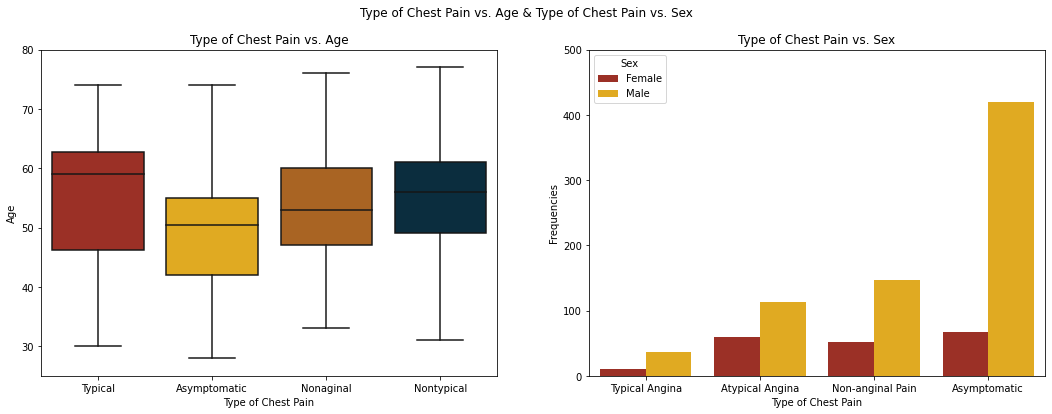

In [76]:
# Chest Pain vs Age and Sex
fig, axes = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle("Type of Chest Pain vs. Age & Type of Chest Pain vs. Sex")
sns.boxplot(ax=axes[0],data = df, x="ChestPain", y="Age")
sns.countplot(ax=axes[1], data = df, x="ChestPain", hue="Sex")
axes[0].set_title("Type of Chest Pain vs. Age")
axes[0].set_ybound(25,80)
axes[0].set_xticklabels(["Typical", "Asymptomatic", "Nonaginal", "Nontypical"])
axes[0].set_xlabel("Type of Chest Pain")
axes[1].set_title("Type of Chest Pain vs. Sex")
axes[1].set_ylabel("Frequencies")
axes[1].set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
axes[1].set_ybound(0,500)
axes[1].set_xlabel("Type of Chest Pain")
axes[1].legend(labels = ["Female", "Male"], title = "Sex")

<span style="color:#126782;font-weight:700;font-size:14px;">
Type of Chest Pain vs. Age & Type of Chest Pain vs. Sex
</span>

From the graph on the left side, for the typical, atypical, and asymptomatic types of chest pains, we can say that their age distribution is negatively skewed because the median is closer to the top of the box. However, for the non-anginal types of chest pains, we can say that their distribution is positively skewed because the median is closer to the bottom of the box. Moreover, we do not observe any outliers for the graphs on the left. 

From the graph on the right side, it is not easy to derive anything from the naked eye. Some statistical tests need to be performed in order to reach a satisfactory conclusion. The significance of men having more asymptomatic chest pains than women needs to be discussed in more detail.

Text(0.5, 0.98, 'Resting BP vs. Age & Resting BP vs. Sex')

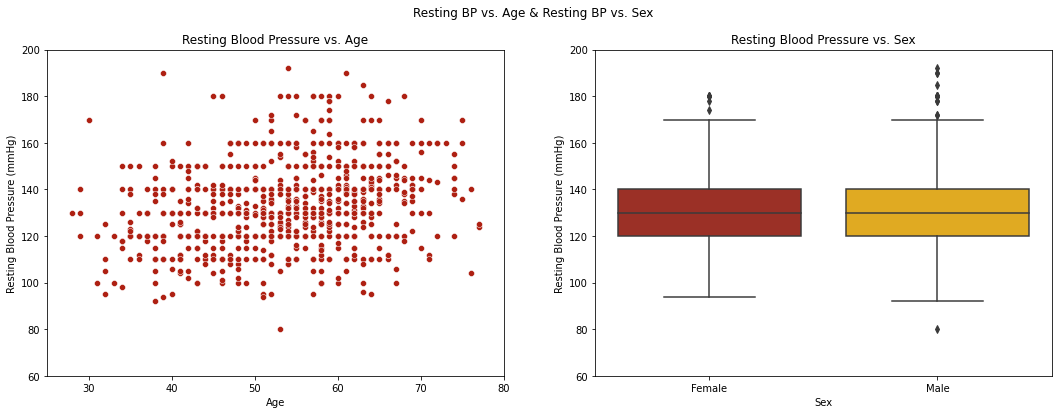

In [77]:
# Resting BPS vs Age and Sex
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.scatterplot(ax=axes[0],data = df, x="Age", y="RestBP")
sns.boxplot(ax=axes[1],data = df, x= "Sex", y="RestBP")
axes[0].set_ybound(60,200)
axes[0].set_xbound(25,80)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Resting Blood Pressure (mmHg)")
axes[0].set_title("Resting Blood Pressure vs. Age")
axes[1].set_ybound(60,200)
axes[1].set_ylabel("Resting Blood Pressure (mmHg)")
axes[1].set_xticklabels(["Female", "Male"])
axes[1].set_title("Resting Blood Pressure vs. Sex")
fig.suptitle("Resting BP vs. Age & Resting BP vs. Sex")

<span style="color:#126782;font-weight:700;font-size:14px;">
Resting Blood Pressure vs. Age & Resting Blood Pressure vs. Sex
</span>


On the left-hand side, there is no trend to be identified. However, we see a lot of clustering in the range of 120-140 mmHg resting blood pressure, which is normally the beginning of hypertension which can lead to heart complications.

On the right-hand side, we can see that the median resting blood pressure of both sexes is in the near vicinity of each other. There are more outliers for males than females that need to be treated. IQRs of both sexes also seem to be very close to each other. Moreover, we see that the Resting Blood Pressure of females and males is normally distributed because the median is in the middle of the box.

[Text(0, 0, 'Female'), Text(0, 0, 'Male')]

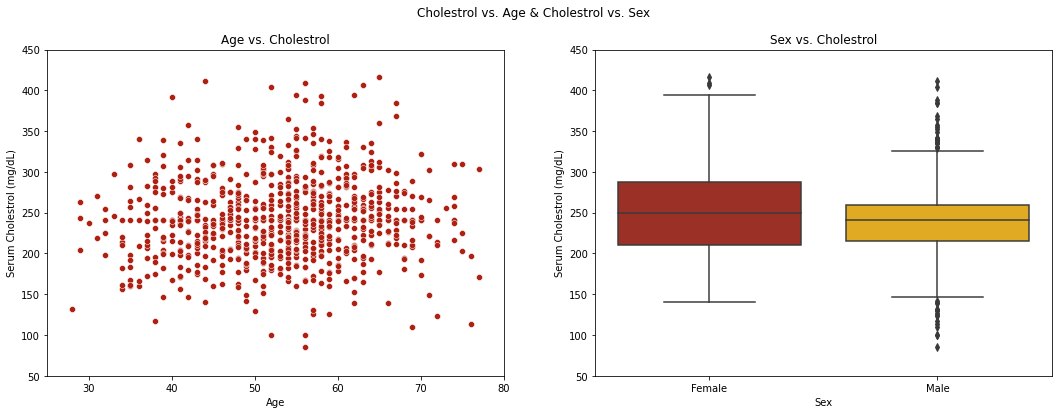

In [78]:
# Cholesterol vs Age and Sex
fig, axes = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle("Cholestrol vs. Age & Cholestrol vs. Sex")
sns.scatterplot(ax=axes[0],data = df, y="Chol", x="Age")
sns.boxplot(ax=axes[1], data = df, y="Chol", x="Sex")
axes[0].set_ybound(50,450)
axes[0].set_xbound(25,80)
axes[0].set_title("Age vs. Cholestrol")
axes[0].set_ylabel("Serum Cholestrol (mg/dL)")
axes[1].set_ybound(50,450)
axes[1].set_title("Sex vs. Cholestrol")
axes[1].set_ylabel("Serum Cholestrol (mg/dL)")
axes[1].set_xticklabels(["Female", "Male"])

<span style="color:#126782;font-weight:700;font-size:14px;">
Cholesterol vs. Age & Cholesterol vs. Sex
</span>

On the right-hand side, it can be inferred that women on average have more serum cholesterol in their bloodstream than men. However, we need to test its significance. Also, there are a lot of outliers for males. The range of the women seem to be larger than males. (Reminder: Approximately 100 of the males were imputed with the average because they did not have any data). Moreover, serum cholesterol levels in females and males are approximately normally distributed since their medians are staying in the middle of the boxes.

On the left graph above, we cannot identify a trend right away. However, we can identify the clustering in 200-300 which is above the healthy level of serum cholesterol in the bloodstream according to beforehand calculations. Unhealthy levels of cholesterol could lead to plaque buildup that causes heart disease in the long run. There are some people with very unhealthy levels of cholesterol (more than enough), while there are some who have less than ideal cholesterol. This graph seems like there is no correlation between age and serum cholesterol.

[Text(0, 0, 'Not likely to be diabetic'), Text(0, 0, 'Likely to be diabetic')]

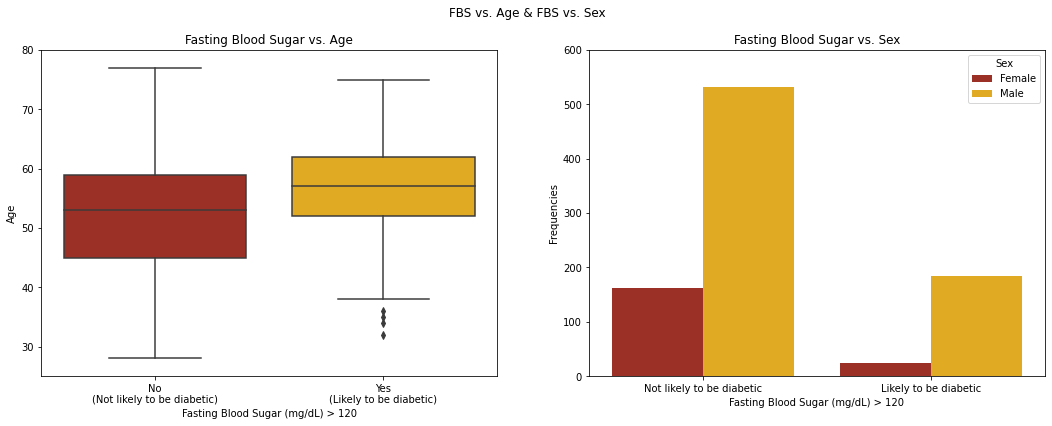

In [79]:
# Fasting Blood Sugar vs Age and Sex
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.boxplot(ax=axes[0],data = df, x="Fbs", y="Age")
sns.countplot(ax=axes[1],data = df, x= "Fbs", hue="Sex")
fig.suptitle("FBS vs. Age & FBS vs. Sex")
axes[0].set_title("Fasting Blood Sugar vs. Age")
axes[0].set_xlabel("Fasting Blood Sugar (mg/dL) > 120")
axes[0].set_ybound(25,80)
axes[1].set_xlabel("Fasting Blood Sugar (mg/dL) > 120")
axes[1].set_ylabel("Frequencies")
axes[1].set_ybound(0,600)
axes[1].legend(labels = ["Female", "Male"], title = "Sex")
axes[1].set_title("Fasting Blood Sugar vs. Sex")
axes[0].set_xticklabels(["No\n(Not likely to be diabetic)", "Yes\n(Likely to be diabetic)"])
axes[1].set_xticklabels(["Not likely to be diabetic", "Likely to be diabetic"])

<span style="color:#126782;font-weight:700;font-size:14px;">
Fasting Blood Sugar vs. Age & Fasting Blood Sugar vs. Sex
</span>

 When we look at the chart on the left, we see that the age of people who have larger than 120 mg/dL of Fasting Blood Sugar is normally distributed because the median is in the middle of the box. On the other hand, the age of people who have less than 120 mg/dL of Fasting Blood Sugar is negatively skewed because the median is closer to the top of the box. We also see outliers in the people who have larger than 120 mg/dL of Fasting Blood Sugar. Moreover, the median of the people who have larger than 120mg/dl of Fasting Blood Sugar is larger than people who do not have larger than 120 mg/dL of Fasting Blood Sugar. 

When we look at the chart on the right, we see that the number of males is higher when the Fasting Blood Sugar is below 120, and when Fasting Blood Sugar is above 120, the number of males is again higher compared to females.

Text(0.5, 1.0, 'Resting ECG vs. Sex')

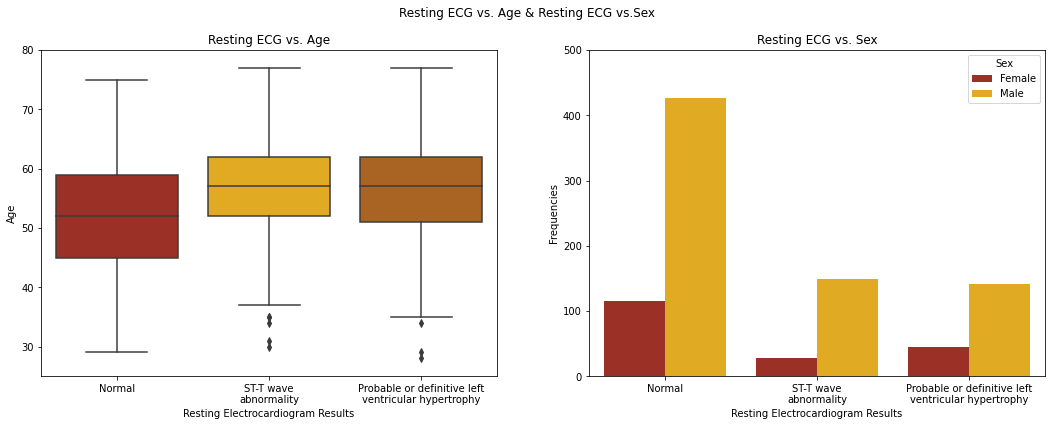

In [80]:
# RestECG vs Age and Sex
fig, axes = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle("Resting ECG vs. Age & Resting ECG vs.Sex")
sns.boxplot(ax=axes[0],data = df, x="RestECG", y="Age")
sns.countplot(ax=axes[1], data = df, x="RestECG", hue="Sex")
axes[0].set_xlabel("Resting Electrocardiogram Results")
axes[0].set_xticklabels(["Normal", "ST-T wave\nabnormality", "Probable or definitive left\nventricular hypertrophy"])
axes[0].set_ybound(25,80)
axes[0].set_title("Resting ECG vs. Age")
axes[1].set_ylabel("Frequencies")
axes[1].set_ybound(0,500)
axes[1].set_xlabel("Resting Electrocardiogram Results")
axes[1].set_xticklabels(["Normal", "ST-T wave\nabnormality", "Probable or definitive left\nventricular hypertrophy"])
axes[1].legend(labels = ["Female", "Male"], title = "Sex")
axes[1].set_title("Resting ECG vs. Sex")

<span style="color:#126782;font-weight:700;font-size:14px;">
Resting Electrocardiogram Results vs. Age & Resting Electrocardiogram Results vs. Sex
</span>

 When we look at the chart on the left, we see that the corresponding age distribution of people with almost all Resting Electrocardiogram results is approximately normal because the median is located in the middle of the boxes in almost all box plots. In addition, while the medians of groups with ST-T wave abnormality and probable or definitive left ventricular hypertrophy are almost the same and outlier is observed in these groups, the median of the normal resting electrocardiogram results group is below these two groups and no outlier is observed.

When we look at the chart on the right, we see that the number of males in all Resting Electrocardiogram Result groups is greater than the number of females. Moreover, in the graph, we find fewer people if we move from left to right on the x-axis.

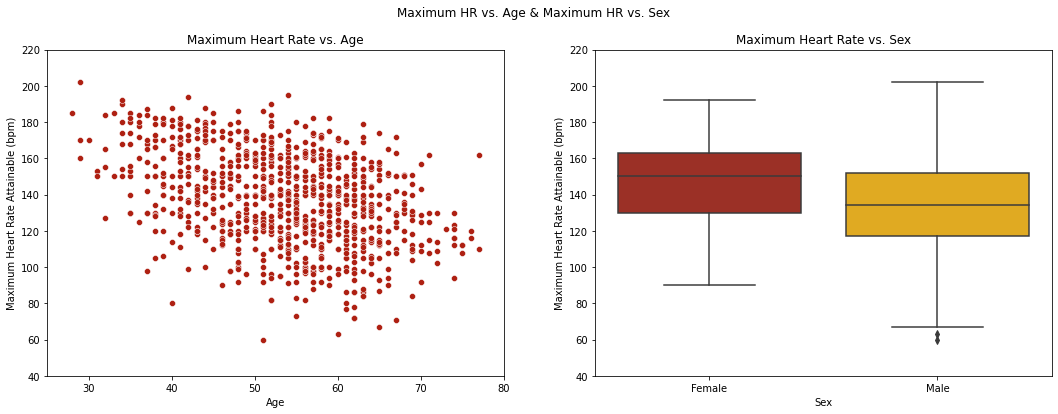

In [81]:
# Max Heart Rate vs Age and Sex
fig, axes = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle("Maximum HR vs. Age & Maximum HR vs. Sex")
sns.scatterplot(ax=axes[0],data = df, y="MaxHR", x="Age")
sns.boxplot(ax=axes[1], data = df, y="MaxHR", x="Sex")
axes[0].set_title("Maximum Heart Rate vs. Age")
axes[0].set_xbound(25,80)
axes[0].set_ybound(40,220)
axes[0].set_ylabel("Maximum Heart Rate Attainable (bpm)")
axes[1].set_title("Maximum Heart Rate vs. Sex")
axes[1].set_ylabel("Maximum Heart Rate Attainable (bpm)")
axes[1].set_xticklabels(["Female", "Male"])
axes[1].set_ybound(40,220)

<span style="color:#126782;font-weight:700;font-size:14px;">
Maximum Heart Rate vs. Age & Maximum Heart Rate vs. Sex
</span>

When we look at the chart on the left, we see that the maximum heart rate decreases as the age increases. For this chart, it is possible to talk about a negative strong correlation between age and maximum heart rate.

When we look at the chart on the right, we see that the maximum heart rate of females is normally distributed because the median is in the middle of the box. On the other hand, the maximum heart rate of males is negatively skewed because the median is closer to the top of the box. We also see trace amounts of outliers in females. In general, the median of the maximum heart rate is greater in females compared to males.

Text(0.5, 0.98, 'ExAngina vs. Age & ExAngina vs. Sex')

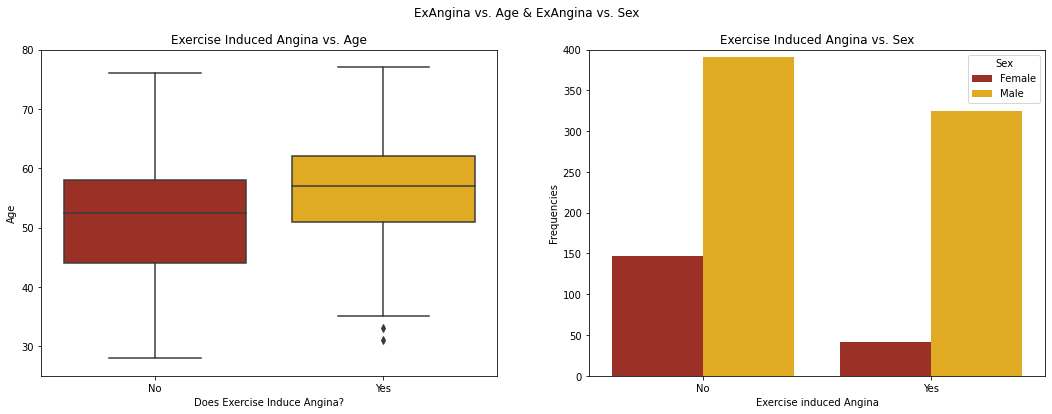

In [82]:
# ExAngina vs Age and Sex
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.boxplot(ax=axes[0],data = df, x="ExAng", y="Age")
sns.countplot(ax=axes[1],data = df, x= "ExAng", hue="Sex")
axes[0].set_xticklabels(["No", "Yes"])
axes[0].set_ybound(25,80)
axes[0].set_xlabel("Does Exercise Induce Angina?")
axes[0].set_title("Exercise Induced Angina vs. Age")
axes[1].set_xticklabels(["No", "Yes"])
axes[1].legend(labels = ["Female", "Male"], title = "Sex")
axes[1].set_xlabel("Exercise induced Angina")
axes[1].set_title("Exercise Induced Angina vs. Sex")
axes[1].set_ylabel("Frequencies")
axes[1].set_ybound(0,400)
fig.suptitle("ExAngina vs. Age & ExAngina vs. Sex")

<span style="color:#126782;font-weight:700;font-size:14px;">
Exercise Induced Angina vs. Age & Exercise Induced Angina vs. Sex
</span>

In the chart on the left, we see the age-corresponding graph of people with Exercise Induced Angina or without Exercise Induced Angina. While the age distribution of people with Exercise Induced Angina is approximately normal distributed (because the median is in the middle of the box plot), the age distribution of people who do not have Exercise Induced Angina is negatively skewed. Furthermore, we do not see outliers in the age distribution of people with not Exercise Induced Angina, but we see outliers in the age distribution of people who have Exercise Induced Angina.

In the chart on the right, the sex-corresponding graph of people with Exercise Induced Angina or without Exercise Induced Angina. We see that the number of males in the group of people who have Exercise Induced Angina is higher than that of females. Likewise, we see that the number of males in the group of people who do not have Exercise Induced Angina is higher than that of females.

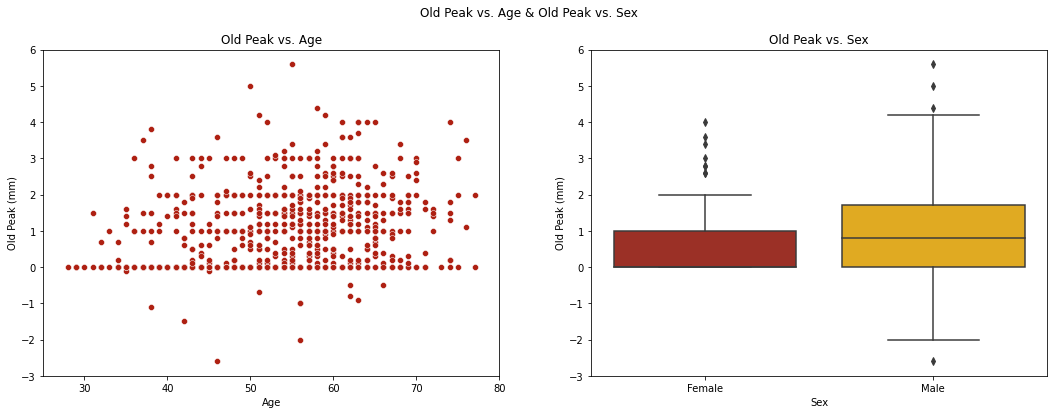

In [83]:
# Old Peak vs Age and Sex
fig, axes = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle("Old Peak vs. Age & Old Peak vs. Sex")
sns.scatterplot(ax=axes[0],data = df, x="Age", y="Oldpeak")
sns.boxplot(ax=axes[1],data = df, x= "Sex", y="Oldpeak")
axes[0].set_ylabel("Old Peak (mm)")
axes[0].set_title("Old Peak vs. Age")
axes[0].set_xbound(25,80)
axes[0].set_ybound(-3,6)
axes[1].set_xticklabels(["Female", "Male"])
axes[1].set_ylabel("Old Peak (mm)")
axes[1].set_title("Old Peak vs. Sex")
axes[1].set_ybound(-3,6)

<span style="color:#126782;font-weight:700;font-size:14px;">
Old Peak vs. Age & Old Peak vs. Sex
</span>

Considering the distribution of Old Peak value by age, it does not seem possible to establish a relationship between the two variables. However, the vast majority of patients have positive Old Peak values. Considering the variation of this variable by gender, it can be seen that none of the women had an Old Peak value less than 0 mm. In addition, it can be said that women are mostly between 0 and 1 mm. A more dispersed distribution is seen in men.

Text(0.5, 0.98, 'Slope of the Peak Exercise ST Segment vs. Age & Slope of the Peak Exercise ST Segment vs. Sex')

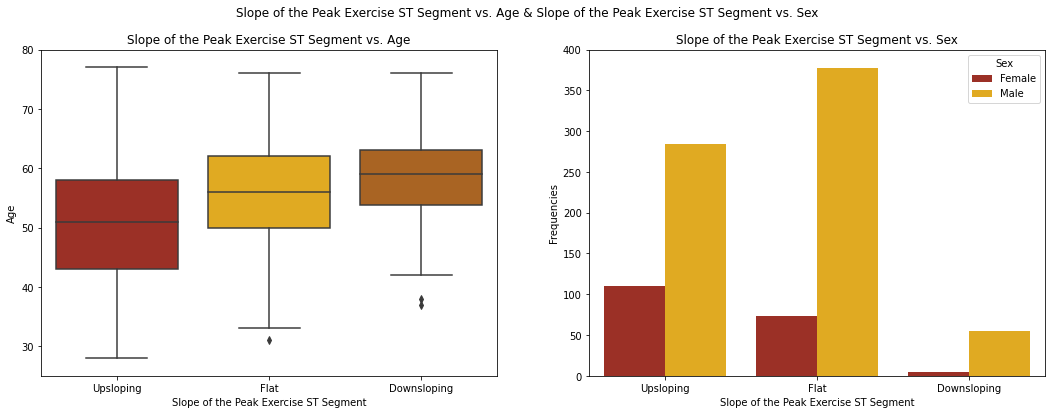

In [84]:
# Slope vs Age and Sex
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.boxplot(ax=axes[0],data = df, x="Slope", y="Age")
sns.countplot(ax=axes[1],data = df, x= "Slope", hue="Sex")
axes[0].set_xticklabels(["Upsloping", "Flat", "Downsloping"])
axes[0].set_xlabel("Slope of the Peak Exercise ST Segment")
axes[0].set_title("Slope of the Peak Exercise ST Segment vs. Age")
axes[0].set_ybound(25,80)
axes[1].set_xticklabels(["Upsloping", "Flat", "Downsloping"])
axes[1].legend(labels = ["Female", "Male"], title = "Sex")
axes[1].set_xlabel("Slope of the Peak Exercise ST Segment")
axes[1].set_title("Slope of the Peak Exercise ST Segment vs. Sex")
axes[1].set_ylabel("Frequencies")
axes[1].set_ybound(0,400)
fig.suptitle("Slope of the Peak Exercise ST Segment vs. Age & Slope of the Peak Exercise ST Segment vs. Sex")

<span style="color:#126782;font-weight:700;font-size:14px;">
Slope of the Peak Exercise ST Segment vs. Age & Slope of the Peak Exercise ST Segment  vs. Sex
</span>

Considering the age distribution of the Slope of the Peak Exercise ST-Segment values of the patients, it can be said that upsloping patients are generally younger and downsloping patients are generally older. Considering the distribution of the sexes, it is seen that males outnumber females in all slope types, but considering that the proportion of males in the data is much higher than females, it will be difficult to observe a significant relationship.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
    Analysis and Visualisation of each attribute with respect to Type of Chest Pain    </span></center>

Text(0.5, 0, 'Type of Chest Pain')

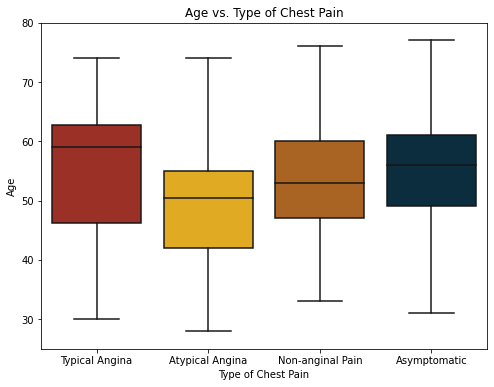

In [85]:
# Age vs. Type of Chest Pain
plt.figure(figsize=(8,6))
ax = sns.boxplot(data = df, x="ChestPain", y="Age")
ax.set_title("Age vs. Type of Chest Pain")
ax.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
ax.set_ybound(25,80)
ax.set_xlabel("Type of Chest Pain")

<span style="color:#126782;font-weight:700;font-size:14px;">
Age vs. Type of Chest Pain
</span>


From the graph above, for the typical, atypical, and asymptomatic types of chest pains, we can say that their age distribution is negatively skewed because the median is closer to the top of the box. However, for the non-anginal types of chest pain, we can say that its distribution is positively skewed because the median is closer to the bottom of the box. Moreover, we do not observe any outliers in the graphs. Furthermore, if we sort the medians incrementally, we get atypical angina, non-anginal pain, asymptomatic and typical angina.

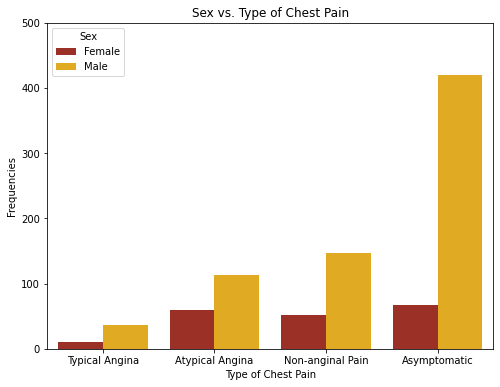

In [86]:
# Sex vs. Type of Chest Pain
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x="ChestPain", hue="Sex")
ax.set_title("Sex vs. Type of Chest Pain")
ax.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
ax.set_ybound(0,500)
ax.set_xlabel("Type of Chest Pain")
ax.set_ylabel("Frequencies")
ax.legend(labels = ["Female", "Male"], title = "Sex")

<span style="color:#126782;font-weight:700;font-size:14px;">
Sex vs. Type of Chest Pain
</span>

If we look at this graph, all we can see is that for all types of chest pain, the number of males is greater than the number of females. The ratio of the number of males divided by the number of females is almost half in typical angina, atypical angina, and non-anginal pain. However, the asymptomatic type of chest pain has a considerably higher ratio than the others. 

Text(0, 0.5, 'Resting Blood Pressure (mmHg)')

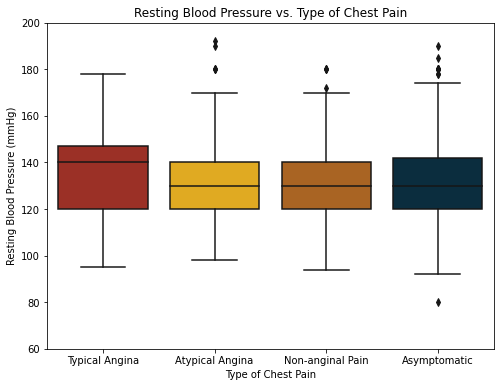

In [87]:
# Resting Blood Pressure vs. Type of Chest Pain
plt.figure(figsize=(8,6))
ax = sns.boxplot(data = df, x="ChestPain", y="RestBP")
ax.set_title("Resting Blood Pressure vs. Type of Chest Pain")
ax.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
ax.set_ybound(60,200)
ax.set_xlabel("Type of Chest Pain")
ax.set_ylabel("Resting Blood Pressure (mmHg)")

<span style="color:#126782;font-weight:700;font-size:14px;">
Resting Blood Pressure vs. Type of Chest Pain
</span>

In this graph, we see different resting blood pressures corresponding to different types of chest pains. While the amount of resting blood pressures in chest types atypical Angina, non-anginal pain, and asymptomatic is distributed approximately normally, it is possible to mention a negatively skewed distribution in typical angina. Moreover, while the median of typical angina is more than the others, and there is no outlier in typical angina, the median of, atypical angina,non-anginal pain, and asymptomatic is almost the same, and outlier is seen in these groups.

Text(0, 0.5, 'Serum Cholesterol (mg/dL)')

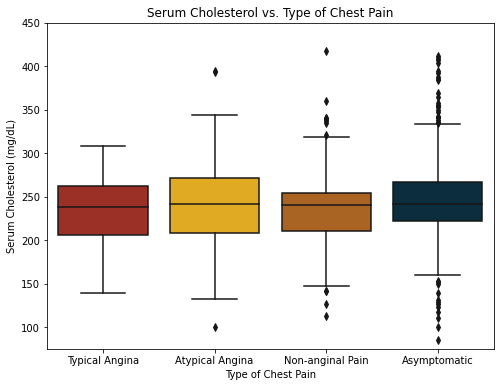

In [88]:
# Cholesterol vs. Type of Chest Pain
plt.figure(figsize=(8,6))
ax = sns.boxplot(data = df, x="ChestPain", y="Chol")
ax.set_title("Serum Cholesterol vs. Type of Chest Pain")
ax.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
ax.set_ybound(75,450)
ax.set_xlabel("Type of Chest Pain")
ax.set_ylabel("Serum Cholesterol (mg/dL)")

<span style="color:#126782;font-weight:700;font-size:14px;">
Serum Cholesterol vs. Type of Chest Pain
</span>

In this graph, we see the amounts of serum cholesterol corresponding to chest pain types. While serum cholesterol distribution of groups typical angina and atypical angina are approximately normal, we have a negatively skewed distribution in group non-anginal pain and a positively skewed distribution in the group asymptomatic. Outliers have been found in every group except group typical angina, and almost all groups have the same median.

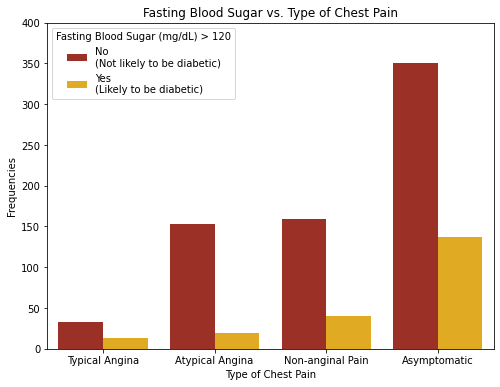

In [89]:
# Fasting Blood Sugar vs. Type of Chest Pain
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x="ChestPain", hue="Fbs")
ax.set_title("Fasting Blood Sugar vs. Type of Chest Pain")
ax.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
ax.set_ybound(0,400)
ax.set_xlabel("Type of Chest Pain")
ax.set_ylabel("Frequencies")
ax.legend(labels = ["No\n(Not likely to be diabetic)", "Yes\n(Likely to be diabetic)"], title = "Fasting Blood Sugar (mg/dL) > 120")

<span style="color:#126782;font-weight:700;font-size:14px;">
Fasting Blood Sugar vs. Type of Chest Pain
</span>

In this graph, we see the frequencies corresponding to the chest pain types of people with fasting blood sugar less than 120, who are less likely to have diabetes, and people with fasting blood sugar greater than 120, who are likely to have diabetes. What we see in the graph is that the number of people moving from left to right on the x-axis increases. In addition, it is that people who are unlikely to have diabetes are more compared to people who are likely to have diabetes in every type of chest pain. The percentage of people that have fasting blood sugar more than 120 increases for the asymptomatic chest pain and is relatively similar in rest of the chest pain groups. 

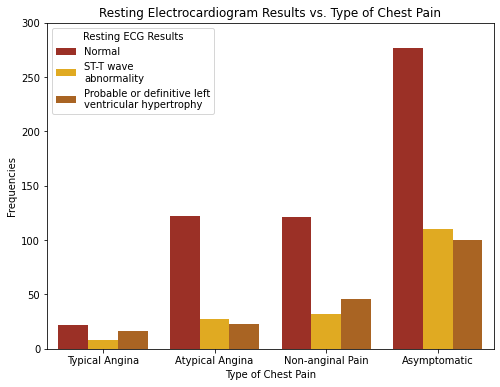

In [90]:
# Resting ECG Results vs. Type of Chest Pain
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x="ChestPain", hue="RestECG")
ax.set_title("Resting Electrocardiogram Results vs. Type of Chest Pain")
ax.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
ax.set_ybound(0,300)
ax.set_xlabel("Type of Chest Pain")
ax.set_ylabel("Frequencies")
ax.legend(labels = ["Normal", "ST-T wave\nabnormality", "Probable or definitive left\nventricular hypertrophy"], title = "Resting ECG Results", loc = 0)

<span style="color:#126782;font-weight:700;font-size:14px;">
Resting ECG Results vs. Type of Chest Pain
</span>

In this graph, we see the frequencies of types of chest pains. We also separated the chest pain groups here according to the resting ECG results. In the graph, we see more people as we are moving from left to right on the x-axis. Moreover, among all chest pain types, the number of people who are normal in terms of ECG results is dominant. Finally, the number of people in ST-T wave abnormality and probable or definitive left ventricular hypertrophy in all chest pain groups is almost the same.

Text(0.5, 0, 'Type of Chest Pain')

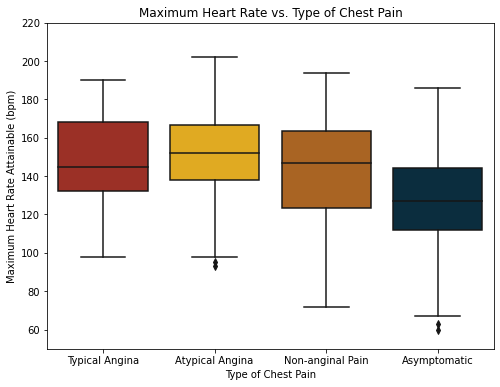

In [91]:
# Maximum Heart Rate vs. Type of Chest Pain
plt.figure(figsize=(8,6))
maxHR_Chest = sns.boxplot(data = df, y="MaxHR", x="ChestPain")
maxHR_Chest.set_title("Maximum Heart Rate vs. Type of Chest Pain")
maxHR_Chest.set_ylabel("Maximum Heart Rate Attainable (bpm)")
maxHR_Chest.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
maxHR_Chest.set_ybound(50,220)
maxHR_Chest.set_xlabel("Type of Chest Pain")

<span style="color:#126782;font-weight:700;font-size:14px;">
Maximum Heart Rate vs. Type of Chest Pain
</span>

In this graph, we see the maximum heart rates corresponding to chest pain types. While the maximum heart rate distribution of groups asymptomatic and atypical angina was approximately normal, we had a negatively skewed distribution in group non-anginal pain and a positively skewed distribution in group typical angina. Outliers have been found in every group except group typical angina and non-anginal pain. Groups typical angina, atypical angina, and non-anginal pain have nearly the same median, but the asymptomatic chest pain group has a lesser median compared to other groups.

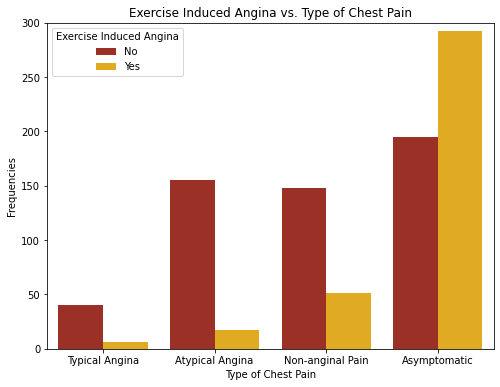

In [92]:
# Exercise Induced Angia vs. Type of Chest Pain
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x="ChestPain", hue="ExAng")
ax.set_title("Exercise Induced Angina vs. Type of Chest Pain")
ax.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
ax.set_ybound(0,300)
ax.set_xlabel("Type of Chest Pain")
ax.set_ylabel("Frequencies")
ax.legend(["No", "Yes"], title = "Exercise Induced Angina")

<span style="color:#126782;font-weight:700;font-size:14px;">
Exercise Induced Angina vs. Type of Chest Pain
</span>

In chest pain types other than asymptomatic chest pain, the number of people who do not have Exercise Induced Angina is higher than in those who do. But in the asymptomatic chest pain type, this is the opposite, that is, the number of people who have Exercise Induced Angina is greater than those who do not.

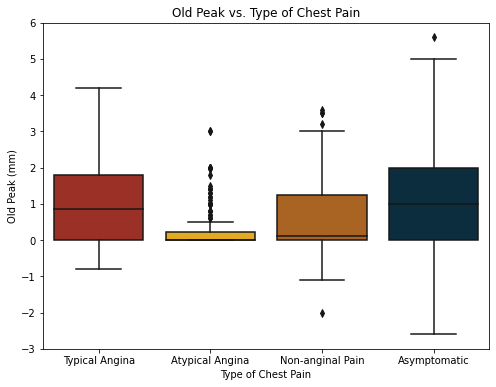

In [93]:
# Old Peak vs. Type of Chest Pain
plt.figure(figsize=(8,6))
oldPeak_Chest = sns.boxplot(data = df, y="Oldpeak", x="ChestPain")
oldPeak_Chest.set_title("Old Peak vs. Type of Chest Pain")
oldPeak_Chest.set_ylabel("Old Peak (mm)")
oldPeak_Chest.set_xlabel("Type of Chest Pain")
oldPeak_Chest.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
oldPeak_Chest.set_ybound(-3, 6)

<span style="color:#126782;font-weight:700;font-size:14px;">
Old Peak vs. Type of Chest Pain
</span>

When we look at the change of old peak according to the type of chest pain, it can be said that Atypical and non-anginal patients generally have lower old peak values, but non-anginal types are more diffuse. It can be said that those with typical angina and asymptomatic have larger old peak values. Old peak values of asymptomatic patients are more scattered than all types of chest pain.

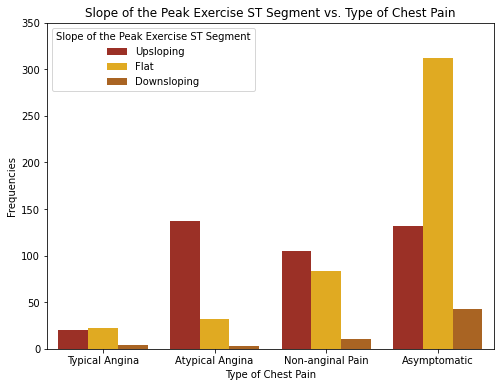

In [94]:
# Slope of the Peak ST Wave vs. Type of Chest Pain
plt.figure(figsize=(8,6))
ax = sns.countplot(data = df, x="ChestPain", hue="Slope")
ax.set_title("Slope of the Peak Exercise ST Segment vs. Type of Chest Pain")
ax.set_ylabel("Frequencies")
ax.set_xlabel("Type of Chest Pain")
ax.set_xticklabels(["Typical Angina", "Atypical Angina", "Non-anginal Pain", "Asymptomatic"])
ax.set_ybound(0,350)
ax.legend(labels = ["Upsloping", "Flat", "Downsloping"], title = "Slope of the Peak Exercise ST Segment")

<span style="color:#126782;font-weight:700;font-size:14px;">
Slope vs. Type of Chest Pain
</span>

Although it is seen that the slope values of those with typical angina type chest pain are generally close to each other, the low number of people with typical angina may hide some relationships.

When looking at those with atypical angina, it is seen that the number of those with upsloping slope values is much higher than other slope classes. There may be an association between the type of Atypical Angina chest pain and the type of upsloping slope.

The majority of patients with chest pain asymptomatic have a flat slope type. There may be a relationship between these two variables.

The fact that the rate of patients with a flat slope is the lowest in all chest pain types is due to the low number of patients with the flat slope in the data.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
    Analysis and Visualisation of Two Selected Attributes and AHD
</span></center>

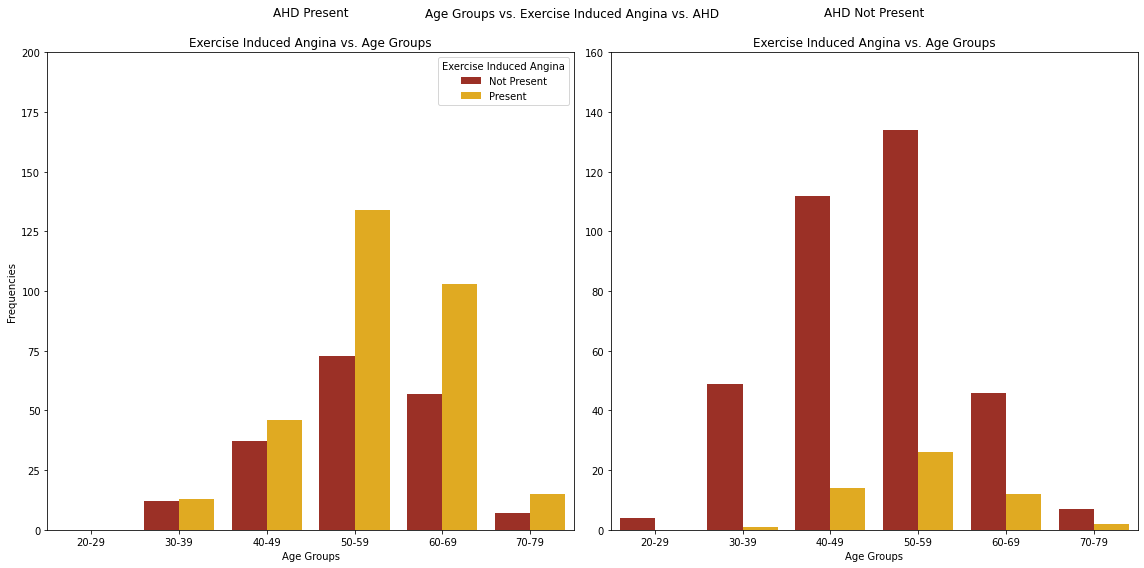

In [95]:
# AgeGroups vs. ExAng vs. AHD
fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Age Groups vs. Exercise Induced Angina vs. AHD")
sns.countplot(ax=axes[0],data =ahd_data , x="AgeGroups", hue="ExAng")
sns.countplot(ax=axes[1], data = non_ahd_data , x="AgeGroups", hue="ExAng")
axes[0].set_xticklabels(["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])
axes[0].set_ybound(0,200)
axes[0].set_title("AHD Present\n\nExercise Induced Angina vs. Age Groups")
axes[0].set_xlabel("Age Groups")
axes[0].set_ylabel("Frequencies")
axes[0].legend(labels = ["Not Present", "Present"], title = "Exercise Induced Angina")
axes[1].set_ylabel("")
axes[1].set_ybound(0,160)
axes[1].set_xlabel("Age Groups")
axes[1].set_xticklabels(["20-29", "30-39", "40-49", "50-59", "60-69", "70-79"])
axes[1].legend().remove() 
axes[1].set_title("AHD Not Present\n\nExercise Induced Angina vs. Age Groups")
plt.tight_layout() 

<span style="color:#126782;font-weight:700;font-size:14px;">
Exercise Induced Angina vs. Age Groups vs. AHD
</span>

For all age groups, people without AHD generally do not have exercise induced angina, though there exists some people that have exercise induced angina. When we look at the distribution of people with AHD, it can be said that the number of people with exercise induced angina is almost more than that of people without exercise induced angina. 

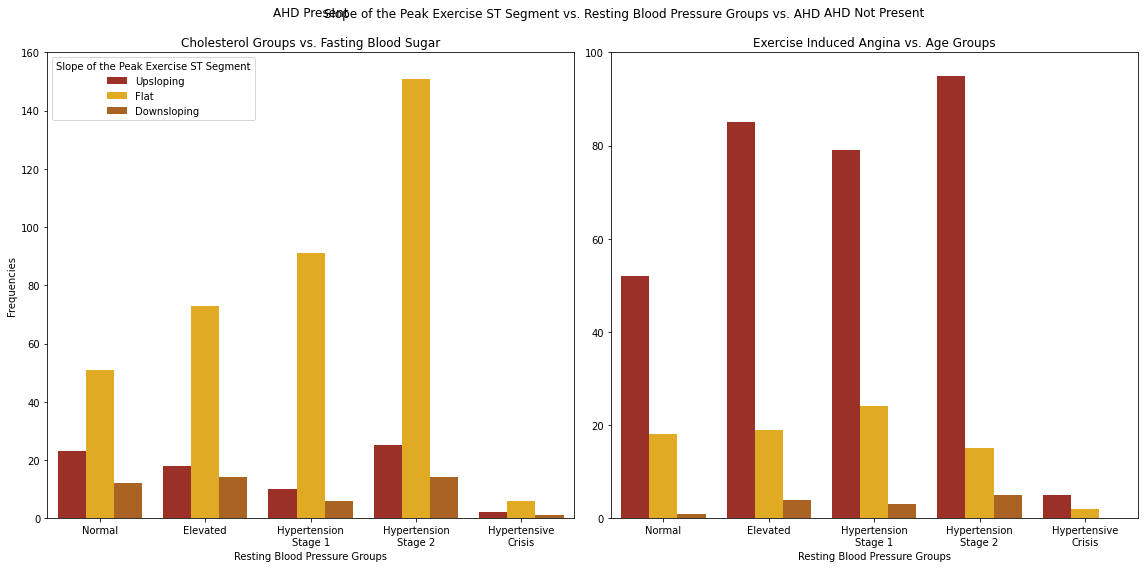

In [96]:
# Slope vs. RestBP Groups vs. AHD
fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Slope of the Peak Exercise ST Segment vs. Resting Blood Pressure Groups vs. AHD")
sns.countplot(ax=axes[0],data =ahd_data , x="RestBPGroups", hue="Slope")
sns.countplot(ax=axes[1], data = non_ahd_data , x="RestBPGroups", hue="Slope")
axes[0].set_xticklabels(["Normal", "Elevated", "Hypertension\nStage 1",
                    "Hypertension\nStage 2", "Hypertensive\nCrisis"])
axes[0].set_ybound(0,160)
axes[0].set_title("AHD Present\n\nCholesterol Groups vs. Fasting Blood Sugar")
axes[0].set_xlabel("Resting Blood Pressure Groups") 
axes[0].set_ylabel("Frequencies")
axes[0].legend(labels = ["Upsloping", "Flat", "Downsloping"], title = "Slope of the Peak Exercise ST Segment")
axes[1].set_ylabel("")
axes[1].set_ybound(0,100)
axes[1].set_xlabel("Resting Blood Pressure Groups")
axes[1].set_xticklabels(["Normal", "Elevated", "Hypertension\nStage 1",
                    "Hypertension\nStage 2", "Hypertensive\nCrisis"])
axes[1].legend().remove() 
axes[1].set_title("AHD Not Present\n\nExercise Induced Angina vs. Age Groups")
plt.tight_layout() 

<span style="color:#126782;font-weight:700;font-size:14px;">
Slope of the Peak Exercise ST Segment vs. Resting Blood Pressure Groups vs. AHD
</span>

Considering the slope and Resting Blood Pressure distribution of patients with AHD, the combination of Hypertension Stage 2 Resting Blood Pressure and flat slope has the highest rate. In those without AHD, the upsloping slope type is most common for nearly all Resting Blood Pressure types.

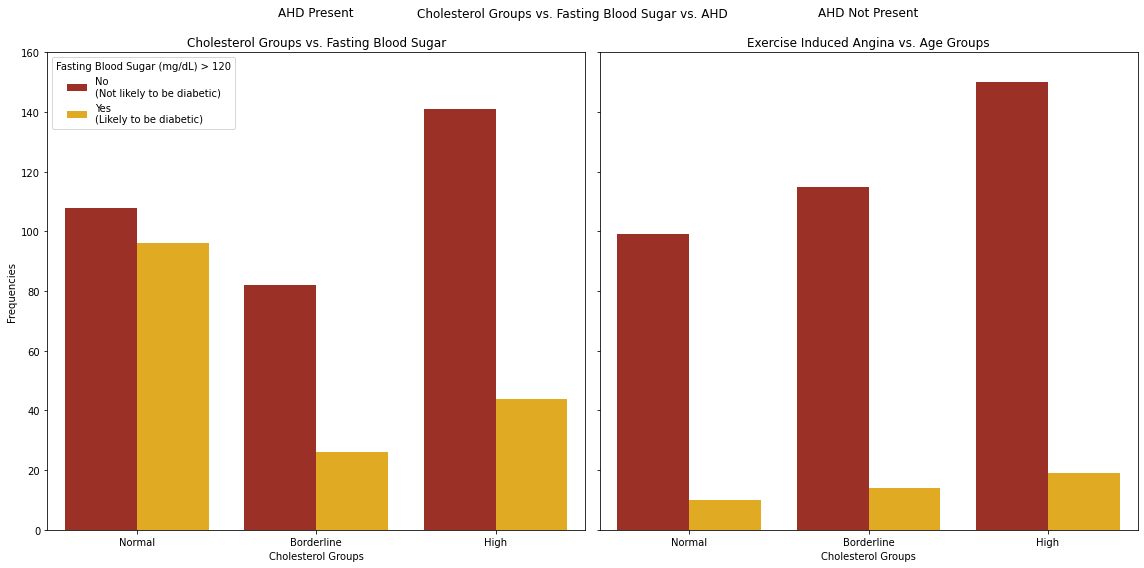

In [97]:
# CholGroups vs. FBS vs. AHD
fig, axes = plt.subplots(1, 2, figsize=(16,8))
fig.suptitle("Cholesterol Groups vs. Fasting Blood Sugar vs. AHD")
sns.countplot(ax=axes[0],data =ahd_data , x="CholesterolGroups", hue="Fbs")
sns.countplot(ax=axes[1], data = non_ahd_data , x="CholesterolGroups", hue="Fbs")
axes[0].set_xticklabels(["Normal", "Borderline", "High"])
axes[0].set_ybound(0,160)
axes[0].set_title("AHD Present\n\nCholesterol Groups vs. Fasting Blood Sugar")
axes[0].set_xlabel("Cholesterol Groups") 
axes[0].set_ylabel("Frequencies")
axes[0].legend(labels = ["No\n(Not likely to be diabetic)", "Yes\n(Likely to be diabetic)"], title = "Fasting Blood Sugar (mg/dL) > 120")
axes[1].set_ylabel("")
axes[1].set_ybound(0,160)
axes[1].set_xlabel("Cholesterol Groups")
axes[1].set_xticklabels(["Normal", "Borderline", "High"])
axes[1].set_yticklabels([])
axes[1].legend().remove() 
axes[1].set_title("AHD Not Present\n\nExercise Induced Angina vs. Age Groups")
plt.tight_layout() 

<span style="color:#126782;font-weight:700;font-size:14px;">
Cholesterol Groups vs. Fasting Blood Sugar vs. AHD
</span>

Looking at the Fasting Blood Sugar and cholesterol group's distribution of patients without AHD, the number of patients with a Fasting Blood Sugar value of less than 120 for all cholesterol groups is much higher. When looking at the patients with AHD, it can be seen that the Fasting Blood sugar values of the patients with borderline and high cholesterol values are generally less than 120.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
    Feature Extraction </span></center>

We decided to use an extra dataset to better analyze heart diseases. For this purpose, we will use 4 extra features from the new dataset. These features will be alcohol intake, physical inactivity, smoking and BMI, and we will discuss their relationship with heart diseases. We have no BMI variable yet bu we will create it with the help of the weight and height data.

In [98]:
feature_data = pd.read_csv("cardio_train.csv", sep=";", index_col= "id")
feature_data["BMI"] = feature_data["weight"] / (feature_data["height"]/100)**2
feature_data.head(10)

def bmi_classify(bmi):
    if bmi < 18.5:
        return 0
    elif bmi < 25:
        return 1
    elif bmi < 30:
        return 2
    else:
        return 3
    
feature_data["bmi_result"] = feature_data["BMI"].apply(bmi_classify)

feature_data = feature_data[["bmi_result","alco","smoke", "active", "cardio"]]
feature_data.columns = ["bmi_class", "alcohol", "smoke_status", "activity", "AHD"]

feature_data.head()

,bmi_class,alcohol,smoke_status,activity,AHD
id,,,,,
0,1,0,0,1,0
1,3,0,0,1,1
2,1,0,0,0,1
3,2,0,0,1,1
4,1,0,0,0,0


<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Explanation of Variables</span></center>




***
- BMI Classification: Body mass index classification of the patient [0: Underweight, 1: Normal, 2: Overweight, 3: Obese]
  
- Alcohol: Alcohol consumption of the patient [1: Yes, 0: No]
- Smoking: Does the patient smoke or not [1: Yes, 0: No]
- Physical Activity: Is the patient physically active or not [1: Yes, 0: No]

***

Text(0, 0.5, 'Frequencies')

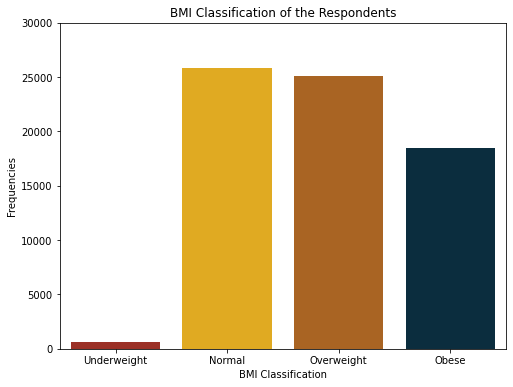

In [99]:
# Feature 1: BMI Result
plt.figure(figsize=(8,6))
ax = sns.countplot(data = feature_data, x="bmi_class")
ax.set_ybound(0,30000)
ax.set_title("BMI Classification of the Respondents")
ax.set_xticklabels(["Underweight", "Normal", "Overweight", "Obese"])
ax.set_xlabel("BMI Classification")
ax.set_ylabel("Frequencies")

In [100]:
feature_data["bmi_class"].value_counts() 

1    25790
2    25086
3    18474
0      650
Name: bmi_class, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
BMI Class
</span>

<br>When we categorized the data into BMI levels, we obtained 4 different groups. 
Most of the people had normal BMI levels. Our second and third-largest BMI classification groups are Overweight and Obese, respectively. Finally, we have obtained a very small number of people with underweight BMI levels.

Text(0, 0.5, 'Frequencies')

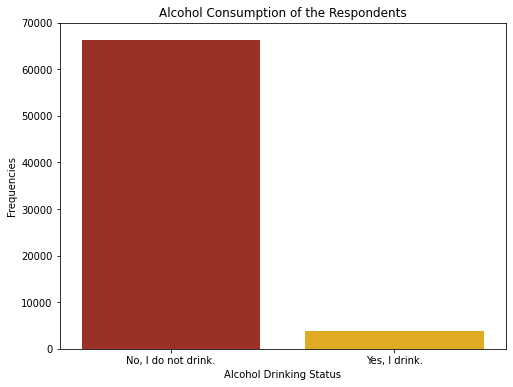

In [101]:
# Feature 2: Alcohol
plt.figure(figsize=(8,6))
ax = sns.countplot(data = feature_data, x="alcohol")
ax.set_ybound(0,70000)
ax.set_title("Alcohol Consumption of the Respondents")
ax.set_xticklabels(["No, I do not drink.", "Yes, I drink."])
ax.set_xlabel("Alcohol Drinking Status")
ax.set_ylabel("Frequencies")

In [102]:
feature_data["alcohol"].value_counts()

0    66236
1     3764
Name: alcohol, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Alcohol Consumption
</span>

<br> When we examined whether people in our data set drank alcohol, we found that approximately 94% of people indicated that they did not drink alcohol, only a very small percentage (approximately 6%) of them indicated that they were drinking alcohol.

Text(0, 0.5, 'Frequencies')

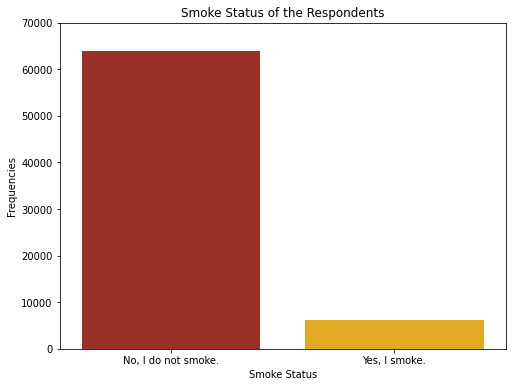

In [103]:
# Feature 3: Smoking Status
plt.figure(figsize=(8,6))
ax = sns.countplot(data = feature_data, x="smoke_status")
ax.set_ybound(0,70000)
ax.set_title("Smoke Status of the Respondents")
ax.set_xticklabels(["No, I do not smoke.", "Yes, I smoke."])
ax.set_xlabel("Smoke Status")
ax.set_ylabel("Frequencies")

In [104]:
feature_data["smoke_status"].value_counts()

0    63831
1     6169
Name: smoke_status, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Smoking Status
</span>

<br>When we examined whether people in our data set smoke, we found that approximately 91% of people indicated that they did not smoke. Only a very small percentage (approximately 9%) of them indicated that they were smoking.

Text(0, 0.5, 'Frequencies')

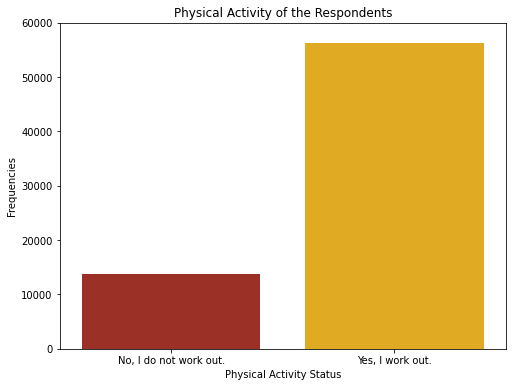

In [105]:
# Feature 4: Physical Activity
plt.figure(figsize=(8,6))
ax = sns.countplot(data = feature_data, x="activity")
ax.set_ybound(0,60000)
ax.set_title("Physical Activity of the Respondents")
ax.set_xticklabels(["No, I do not work out.", "Yes, I work out."])
ax.set_xlabel("Physical Activity Status")
ax.set_ylabel("Frequencies")

In [106]:
feature_data["activity"].value_counts()

1    56261
0    13739
Name: activity, dtype: int64

<span style="color:#126782;font-weight:700;font-size:14px;">
Physical Activity
</span>

<br> When we wanted to determine whether people in our data set were doing physical activity, we found that approximately 80 percent of people indicated that they were doing physical activity, while about twenty percent of people indicated that they were not doing physical activity.

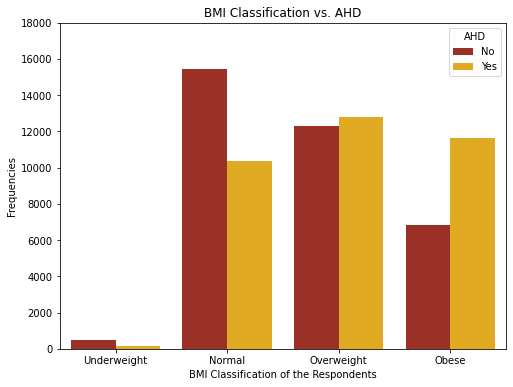

In [107]:
# BMI Class vs. AHD
plt.figure(figsize=(8,6))
ax = sns.countplot(data = feature_data, x= "bmi_class", hue="AHD")
ax.set_title("BMI Classification vs. AHD")
ax.set_xticklabels(["Underweight", "Normal", "Overweight", "Obese"])
ax.set_xlabel("BMI Classification of the Respondents")
ax.set_ylabel("Frequencies")
ax.legend(labels = ["No", "Yes"], title="AHD")
ax.set_ybound(0,18000)

In [108]:
pd.crosstab(feature_data["AHD"], feature_data["bmi_class"])

bmi_class,0,1,2,3
AHD,,,,
0,468,15440,12290,6823
1,182,10350,12796,11651


<span style="color:#126782;font-weight:700;font-size:14px;">
BMI Class vs. AHD
</span>

<br> What we can tell from this graph is that as the BMI level increases, that is, as we move from underweight BMI level to Obese BMI level, the number of patients with AHD increases. This can tell us that BMI levels and AHD are positively correlated.

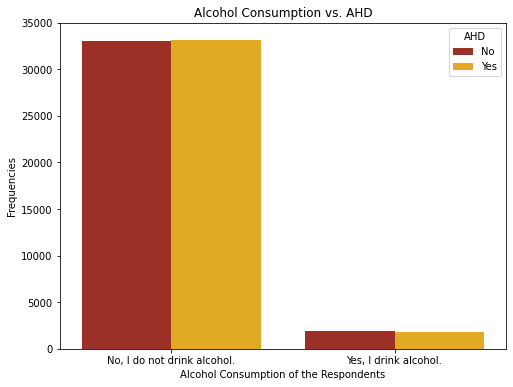

In [109]:
# Alcohol vs. AHD
plt.figure(figsize=(8,6))
ax = sns.countplot(data = feature_data, x= "alcohol", hue="AHD")
ax.set_title("Alcohol Consumption vs. AHD")
ax.set_xticklabels(["No, I do not drink alcohol.", "Yes, I drink alcohol."])
ax.set_xlabel("Alcohol Consumption of the Respondents")
ax.set_ylabel("Frequencies")
ax.legend(labels = ["No", "Yes"], title="AHD")
ax.set_ybound(0,35000)

In [110]:
pd.crosstab(feature_data["AHD"], feature_data["alcohol"])

alcohol,0,1
AHD,,
0,33080,1941
1,33156,1823


<span style="color:#126782;font-weight:700;font-size:14px;">
Alcohol Consumption vs. AHD
</span>

<br> Because the number of people who said they did not drink alcohol in our data set was quite high compared to those who drank alcohol, we found that the number of people who did not consume alcohol in the AHD section was high. 
Moreover, for the group of people who consume alcohol, the number of people with AHD and the number of people who do not have AHD are almost the same. This also applies for the people in the group who do not consume alcohol.

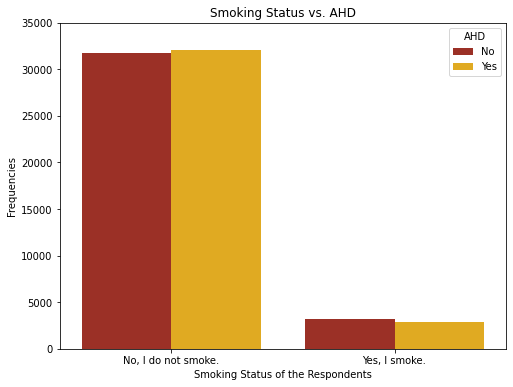

In [111]:
# Smoking Status vs. AHD
plt.figure(figsize=(8,6))
ax = sns.countplot(data = feature_data, x= "smoke_status", hue="AHD")
ax.set_title("Smoking Status vs. AHD")
ax.set_xticklabels(["No, I do not smoke.", "Yes, I smoke."])
ax.set_xlabel("Smoking Status of the Respondents")
ax.set_ylabel("Frequencies")
ax.legend(labels = ["No", "Yes"], title="AHD")
ax.set_ybound(0,35000)

In [112]:
pd.crosstab(feature_data["AHD"], feature_data["smoke_status"])

smoke_status,0,1
AHD,,
0,31781,3240
1,32050,2929


<span style="color:#126782;font-weight:700;font-size:14px;">
Smoking Status vs. AHD
</span>

<br> Because the number of people who said they did not smoke in our data set was quite high compared to those who smoke, we found that the number of people who did not smoke in the AHD section was high. Moreover, for the group of people who smoke, the number of people with AHD and the number of people who do not have AHD are almost the same. This also applies for the people in the group who do not smoke.

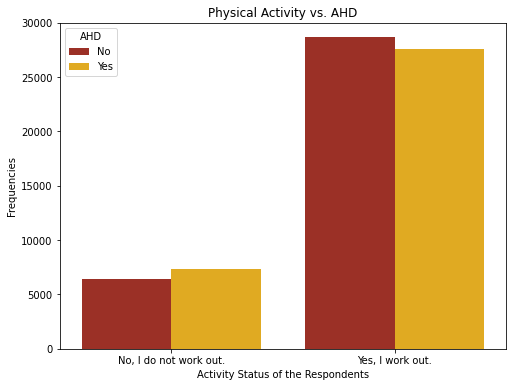

In [113]:
# Physical Activity vs. AHD 
plt.figure(figsize=(8,6))
ax = sns.countplot(data = feature_data, x= "activity", hue="AHD")
ax.set_title("Physical Activity vs. AHD")
ax.set_xticklabels(["No, I do not work out.", "Yes, I work out."])
ax.set_xlabel("Activity Status of the Respondents")
ax.set_ylabel("Frequencies")
ax.legend(labels = ["No", "Yes"], title="AHD")
ax.set_ybound(0,30000)

In [114]:
pd.crosstab(feature_data["AHD"], feature_data["activity"])

activity,0,1
AHD,,
0,6378,28643
1,7361,27618


<span style="color:#126782;font-weight:700;font-size:14px;">
Physical Activity vs. AHD
</span>

<br> Because the number of people who said they did physical work out in our data set was quite high compared to those who did not do physical work out, we found that the number of people who did physical work out in the AHD section was high. Moreover, for the group of people who did physical work out, the number of people with AHD and the number of people who do not have AHD are almost the same. This also applies for the people in the group who did not do physical work out.

## <font color="#AE2012"> <center> Hypothesis Testing </center> </font>

In [115]:
from scipy.stats import ttest_ind, chi2_contingency

We set our **$\alpha$** to 0.05 for all hypothesis testing.

In [116]:
alpha = 0.05
random_state = 35

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between Age and AHD
</span>

 - **Null Hypothesis ($\large{H_0}$)**: The means of age is not different for people with AHD and without AHD.
  - **Alternative Hypothesis ($\large{H_A}$)**: The means of age is different for people with AHD and without AHD.

In [117]:
# Statistical Testing of Age
ahd_0 = df[df['AHD']==0]['Age']
ahd_1 = df[df['AHD']==1]['Age']
len_ahd_0 = int(len(ahd_0) * 9 / 100)
len_ahd_1 = int(len(ahd_1) * 9 / 100)
ahd_0_sample = ahd_0.sample(n = len_ahd_0, random_state=random_state)
ahd_1_sample = ahd_1.sample(n = len_ahd_1, random_state=random_state)
result, p_value = ttest_ind(ahd_0_sample, ahd_1_sample, equal_var = False)
print("p-value:", format(p_value, '.10f'))

p-value: 0.0000600232


We sampled 9% from each population (people with AHD and without AHD) and ran a 2-sample t-test, to see if there was any difference between the means age of the two groups. As expected, the p-value we got was lower than our alpha value (we set it at 0.05), which led us to the point that we could reject the null hypothesis, and accept the alternative hypothesis. We came to the conclusion that people with AHD tended to be older than people without AHD. We will use this fact in categorizing people with and without AHD, and this will help us in the machine learning process.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between Sex and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: There is no significant association between the sexes of the patients and AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: There is a significant association between the sexes of the patients and AHD.

In [118]:
# Statistical Testing of Sex
df_sample = df.sample(n=100, random_state=random_state)
crosstab = pd.crosstab(df_sample["AHD"],df_sample["Sex"])
print("Cross Tabulation of Sex and AHD")
print(crosstab)
print()
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print("p-value:", format(p_value, '.10f'))

Cross Tabulation of Sex and AHD
Sex   0   1
AHD        
0    17  32
1     8  43

p-value: 0.0496016144


We sampled 100 people from the population randomly and ran a Chi-square test, to see if there is a significant relationship between the type of chest pain the patients experiencing and AHD. The p-value we got was lower than our alpha value (we set it at 0.05), which led us to the point that we can reject the null hypothesis, and accept the alternative hypothesis. We came to the conclusion that "There is a significant association between sexes of the patients experiencing and AHD". We will use this feature in our machine learning models.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between Age Groups, Sex and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: There is no significant association between the age groups, sexes of the patients and AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: There is a significant association between age groups, the sexes of the patients and AHD.

In [119]:
df_sample = df.sample(n=300, random_state= random_state)
crosstab = pd.crosstab(df_sample["AHD"],[df_sample["Sex"], df_sample["AgeGroups"]])
print("Cross Tabulation of Sex, Age Groups and AHD")
print(crosstab)
print()
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print("p-value:", format(p_value, '.10f'))

Cross Tabulation of Sex, Age Groups and AHD
Sex        0                1                   
AgeGroups  2   3   4  5  6  1   2   3   4   5  6
AHD                                             
0          5  16  12  5  1  3  11  21  38  10  1
1          1   2   8  6  1  0   6  22  68  54  9

p-value: 0.0000000190


We sampled 300 people from the population randomly and ran a Chi-square test, to see if there is a significant relationship between the age groups, sexes and AHD. The p-value we got was lower than our alpha value (we set it at 0.05), which led us to the point that we can reject the null hypothesis, and accept the alternative hypothesis. We came to the conclusion that "There is a significant association between the sexes of the patients, their age groups and people experiencing and AHD". We will use this feature in our machine learning models.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between the Type of Chest Pain and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: There is no significant association between the type of chest pain the patients experiencing and AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: There is a significant association between the type of chest pain the patients experiencing and AHD.

In [120]:
# Statistical Testing of Chest Pain
df_sample = df.sample(n=100, random_state=random_state)
crosstab = pd.crosstab(df_sample["AHD"],df_sample["ChestPain"])
print("Cross Tabulation of Type of Chest Pain and AHD")
print(crosstab)
print()
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print("p-value:", format(p_value, '.10f'))

Cross Tabulation of Type of Chest Pain and AHD
ChestPain  0   1   2   3
AHD                     
0          3  23  15   8
1          1   1   8  41

p-value: 0.0000000007


We sampled 100 people from the population randomly and ran a Chi-square test, to see if there is a significant relationship between the type of chest pain the patients experiencing and AHD. The p-value we got was lower than our alpha value (we set it at 0.05), which led us to the point that we can reject the null hypothesis, and accept the alternative hypothesis. We came to the conclusion that "There is a significant association between the type of chest pain the patients experiencing and AHD". We will use this feature in our machine learning models.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between Resting Blood Pressure and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: The means of resting blood pressure is not different for people with AHD and without AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: The means of resting blood pressure is different for people with AHD and without AHD.

In [121]:
# Statistical Testing of Resting BP
ahd_0 = df[df['AHD']==0]['RestBP']
ahd_1 = df[df['AHD']==1]['RestBP']
len_ahd_0 = int(len(ahd_0) * 9 / 100)
len_ahd_1 = int(len(ahd_1) * 9 / 100)
ahd_0_sample = ahd_0.sample(n = len_ahd_0, random_state=random_state)
ahd_1_sample = ahd_1.sample(n = len_ahd_1, random_state=random_state)
result, p_val = ttest_ind(ahd_0_sample, ahd_1_sample, equal_var = False)
print("p-value:", format(p_val, '.10f'))

p-value: 0.1661373155


We sampled 9% from each population (people with AHD and without AHD) and ran a 2-sample t-test, to see if there was any difference between the means of resting blood pressure of the two groups. To our surprise, the p-value we got was higher than our alpha value (we set it at 0.05), which led us to the point that we could not reject the null hypothesis. We came to the conclusion that people with AHD tended to have similar resting blood pressure without AHD. We will opt not to use this feature in the machine learning process.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between Cholesterol and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: The means of serum blood cholesterol is not different for people with AHD and without AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: The means of serum blood cholesterol is different for people with AHD and without AHD.

In [122]:
# Statistical Testing of Cholesterol
ahd_0 = df[df['AHD']==0]['Chol']
ahd_1 = df[df['AHD']==1]['Chol']
len_ahd_0 = int(len(ahd_0) * 9 / 100)
len_ahd_1 = int(len(ahd_1) * 9 / 100)
ahd_0_sample = ahd_0.sample(n = len_ahd_0, random_state=random_state)
ahd_1_sample = ahd_1.sample(n = len_ahd_1, random_state=random_state)
result, p_val = ttest_ind(ahd_0_sample, ahd_1_sample, equal_var = False)
print("p-value:", format(p_val, '.10f'))

p-value: 0.2385659578


We sampled 9% from each population (people with AHD and without AHD) and ran a 2-sample t-test, to see if there was any difference between the means of serum cholesterol of the two groups. To our surprise, the p-value we got was higher than our alpha value (we set it at 0.05), which led us to the point that we could not reject the null hypothesis. We came to the conclusion that people with AHD tended to have similar serum cholesterol levels without AHD. We will opt not to use this feature in the machine learning process.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between the Fasting Blood Sugar and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: There is no significant association between the fasting blood sugar and AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: There is a significant association between the fasting blood sugar and AHD.

In [123]:
# Statistical Testing of Fasting Blood Sugar
df_sample = df.sample(n=100, random_state=random_state)
crosstab = pd.crosstab(df_sample["AHD"],df_sample["Fbs"])
print("Cross Tabulation of Fasting Blood Sugar and AHD")
print(crosstab)
print()
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print("p-value:", format(p_value, '.10f'))

Cross Tabulation of Fasting Blood Sugar and AHD
Fbs   0   1
AHD        
0    46   3
1    36  15

p-value: 0.0056050194


We sampled 100 people from the population randomly and ran a Chi-square test, to see if there is a significant relationship between the fasting blood sugar and AHD. The p-value we got was lower than our alpha value (we set it at 0.05), which led us to the point that we can reject the null hypothesis, and accept the alternative hypothesis. We came to the conclusion that "There is a significant association between the fasting blood sugar and AHD". We will use this feature in our machine learning models.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between the Resting ECG Results and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: There is no significant association between the Resting ECG results and AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: There is a significant association between the Resting ECG results and AHD.

In [124]:
# Statistical Testing of Resting ECG Results
df_sample = df.sample(n=100, random_state=random_state)
crosstab = pd.crosstab(df_sample["AHD"],df_sample["RestECG"])
print("Cross Tabulation of Resting ECG Results and AHD")
print(crosstab)
print()
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print("p-value:", format(p_value, '.10f'))

Cross Tabulation of Resting ECG Results and AHD
RestECG   0   1   2
AHD                
0        33   7   9
1        26  15  10

p-value: 0.1530690384


We sampled 100 people from the population randomly and ran a Chi-square test, to see if there is a significant relationship between the resting ECG results and AHD. To our surprise, the p-value we got was greater than our alpha value (we set it at 0.05), which led us to the point that we cannot reject the null hypothesis. We came to the conclusion that "There is no significant association between the resting ECG results and AHD". We will not use this feature in our machine learning models.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between Maximum Heart Rate and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: The means of maximum heart rate is not different for people with AHD and without AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: The means of maximum heart rate is different for people with AHD and without AHD.

In [125]:
# Statistical Testing of Maximum Heart Rate
ahd_0 = df[df['AHD']==0]['MaxHR']
ahd_1 = df[df['AHD']==1]['MaxHR']
len_ahd_0 = int(len(ahd_0) * 9 / 100)
len_ahd_1 = int(len(ahd_1) * 9 / 100)
ahd_0_sample = ahd_0.sample(n = len_ahd_0, random_state=random_state)
ahd_1_sample = ahd_1.sample(n = len_ahd_1, random_state=random_state)
result, p_val = ttest_ind(ahd_0_sample, ahd_1_sample, equal_var = False)
print("p-value:", format(p_val, '.10f'))

p-value: 0.0000005564


We sampled 9% from each population (people with AHD and without AHD) and ran a 2-sample t-test, to see if there was any difference between the means of maximum heart rate of the two groups. To our surprise, the p-value we got was lower than our alpha value (we set it at 0.05), which led us to the point that we could reject the null hypothesis and accept the alternative hypothesis. We came to the conclusion that people with AHD tended to have lower maximum heart rates than people without AHD. We will use this fact in categorizing people with and without AHD, and this will help us in the machine learning process.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between the Exercise Induced Angina and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: There is no significant association between the exercise induced angina and AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: There is a significant association between the exercise induced angina and AHD.

In [126]:
# Statistical Testing of Exercise Induced Angina
df_sample = df.sample(n = 100, random_state=random_state)
crosstab = pd.crosstab(df_sample["AHD"],df_sample["ExAng"])
print("Cross Tabulation of Exercise Induced Angina and AHD")
print(crosstab)
print()
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print("p-value:", format(p_value, '.10f'))

Cross Tabulation of Exercise Induced Angina and AHD
ExAng   0   1
AHD          
0      43   6
1      18  33

p-value: 0.0000002320


We sampled 100 people from the population randomly and ran a Chi-square test, to see if there is a significant relationship between the exercise induced angina and AHD. As we expect, the p-value we got was lower than our alpha value (we set it at 0.05), which led us to the point that we can reject the null hypothesis and accept alternative hypothesis. We came to the conclusion that "There is a significant association between the exercise induced angina and AHD". We will use this feature in our machine learning models.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between Old Peak and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: The means of old peak is not different for people with AHD and without AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: The means of old peak is different for people with AHD and without AHD.

In [127]:
# Statistical Testing of Olp Peak
ahd_0 = df[df['AHD']==0]['Oldpeak']
ahd_1 = df[df['AHD']==1]['Oldpeak']
len_ahd_0 = int(len(ahd_0) * 9 / 100)
len_ahd_1 = int(len(ahd_1) * 9 / 100)
ahd_0_sample = ahd_0.sample(n = len_ahd_0, random_state=random_state)
ahd_1_sample = ahd_1.sample(n = len_ahd_1, random_state=random_state)
result, p_val = ttest_ind(ahd_0_sample, ahd_1_sample, equal_var = False)
print("p-value:", format(p_val, '.10f'))

p-value: 0.0078905834


We sampled 9% from each population (people with AHD and without AHD) and ran a 2-sample t-test, to see if there was any difference between the means of old peak of the two groups. The p value we got was lower than our alpha value (we set it at 0.05), which led us to the point that we could reject the null hypothesis and accept the alternative hypothesis. We came to the conclusion that people with AHD tended to have higher old peaks than people without AHD. We will use this fact in categorizing people with and without AHD, and this will help us in the machine learning process.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between the Slope of the Peak ST Segment and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: There is no significant association between the Slope of the Peak ST Segment and AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: There is a significant association between the Slope of the Peak ST Segment and AHD.

In [128]:
# Statiscal Testing of Slope
df_sample = df.sample(n = 100,random_state = random_state)
crosstab = pd.crosstab(df_sample["AHD"],df_sample["Slope"])
print("Cross Tabulation of Slope and AHD")
print(crosstab)
print()
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print("p-value:", format(p_value, '.10f'))

Cross Tabulation of Slope and AHD
Slope   1   2  3
AHD             
0      40   9  0
1       7  38  6

p-value: 0.0000000001


We sampled 100 people from the population randomly and ran a Chi-square test, to see if there is a significant relationship between the Slope of the Peak ST Segment and AHD. As expected from bi-variate analysis, the p-value we got was lower than our alpha value (we set it at 0.05), which led us to the point that we can reject the null hypothesis and accept the alternative hypothesis. We came to the conclusion that "There is a significant association between the Slope of the Peak ST Segment and AHD". We will use this variable in our machine learning models.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between the Age Groups and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: There is no significant association between the age groups and AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: There is a significant association between the age groups and AHD. 

In [129]:
# Statistical Testing of Age Groups
df_sample = df.sample(n = 100, random_state=random_state)
crosstab = pd.crosstab(df_sample["AHD"],df_sample["AgeGroups"])
print("Cross Tabulation of Sex and AHD")
print(crosstab)
print()
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print("p-value:", format(p_value, '.10f'))

Cross Tabulation of Sex and AHD
AgeGroups  1  2   3   4   5  6
AHD                           
0          2  7  12  22   4  2
1          0  1   7  23  17  3

p-value: 0.0066970250


We sampled 100 people from the population randomly and ran a Chi-square test, to see if there is a significant relationship between the age groups of the patients and AHD. To no surprise, the p value we got was lower than our alpha value (we set it at 0.05), which led us to the point that we can reject the null hypothesis, and accept the alternative hypothesis. We came to the conclusion that "There is a significant association between the age groups of the patients experiencing and AHD". We will use this variable in our machine learning models.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between the Resting Blood Pressure Groups and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: There is no significant association between the resting blood pressure groups and AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: There is a significant association between the resting blood pressure groups and AHD. 

In [130]:
# Statistical Testing of Resting Blood Pressure Groups
df_sample = df.sample(n = 100,random_state= random_state)
crosstab = pd.crosstab(df_sample["AHD"],df_sample["RestBPGroups"])
print("Cross Tabulation of Resting BP Groups and AHD")
print(crosstab)
print()
chi2, p_value, dof, expected = chi2_contingency(crosstab)
print("p-value: ", format(p_value, '.10f'))

Cross Tabulation of Resting BP Groups and AHD
RestBPGroups   0   1   2   3  4
AHD                            
0             10  15   9  14  1
1              6  10  11  24  0

p-value:  0.2150780044


We sampled 100 people from the population randomly and ran a Chi-square test, to see if there is a significant relationship between the group of resting blood pressure that patients belong to and AHD. To our surprise, the p-value we got was greater than our alpha value (we set it at 0.05), which led us to the point that we cannot reject the null hypothesis. We came to the conclusion that "There is no significant association between the group of resting blood pressure that patients belong to and AHD". We will not use this variable in our machine learning models.

<span style="color:#126782;font-weight:700;font-size:14px;">
Statistical Testing of the Relationship between the Cholesterol Groups and AHD
</span>

- **Null Hypothesis ($\large{H_0}$)**: There is no significant association between the cholesterol groups and AHD.
- **Alternative Hypothesis ($\large{H_A}$)**: There is a significant association between the cholesterol groups and AHD.

In [131]:
# Statistical Testing of Cholesterol Groups
df_sample = df.sample(n = 100, random_state=random_state)
crosstab = pd.crosstab(df_sample["AHD"],df_sample["CholesterolGroups"])
print("Cross Tabulation of Sex and AHD")
print(crosstab)
print()
chi2, p_value, dof, expected = chi2_contingency(crosstab)

print("p-value: ", format(p_value, '.10f'))

Cross Tabulation of Sex and AHD
CholesterolGroups   0   1   2
AHD                          
0                  12  18  19
1                  19  14  18

p-value:  0.3554929738


We sampled 100 people from the population randomly and ran a Chi-square test, to see if there is a significant relationship between the cholesterol gropus and AHD. As expected, the p-value we got was greater than our alpha value (we set it at 0.05), which led us to the point that we cannot reject the null hypothesis. We came to the conclusion that "There is no significant association between the cholesterol gropus and AHD". We will not use this variable in our machine learning models.

The hypothesis test we did above gave us an idea about which features we should use for machine learning. According to our hypothesis test result, while we will use features that are related to AHD in our machine learning models, we will not use features that are not related to AHD in our models. We are going to drop the features that we are not planning to include in our Machine Learning models

In [132]:
features = ["Age","Sex","ChestPain","Fbs","MaxHR","ExAng","Oldpeak","Slope","AgeGroups", "AHD"]
df = df[features]

In [133]:
df.head()

,Age,Sex,ChestPain,Fbs,MaxHR,ExAng,Oldpeak,Slope,AgeGroups,AHD
0,40,1,1,0,172,0,0.0,1,3,0
1,49,0,2,0,156,0,1.0,2,3,1
2,37,1,1,0,98,0,0.0,1,2,0
3,48,0,3,0,108,1,1.5,2,3,1
4,54,1,2,0,122,0,0.0,1,4,0


## <font color="#AE2012"> <center> Machine Learning </center> </font>

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, metrics, tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.ensemble import VotingClassifier

In [135]:
def report(y_true_test, y_train_test, y_test_pred, y_train_pred):
    train_acc = metrics.accuracy_score(y_train_test, y_train_pred)
    test_acc = metrics.accuracy_score(y_true_test, y_test_pred)
    precision_score = metrics.precision_score(y_true_test, y_test_pred)
    recall_score = metrics.recall_score(y_true_test, y_test_pred)
    f1_score = metrics.f1_score(y_true_test, y_test_pred)
    print("Train set Accuracy: ", train_acc)
    print("Test set Accuracy: ", test_acc)
    print("precision_score: ", precision_score)
    print("recall_score: ", recall_score)
    print("f1_score: ", f1_score)

def scorelist(y_true_test, y_train_test, y_test_pred, y_train_pred):
    train_acc = metrics.accuracy_score(y_train_test, y_train_pred)
    test_acc = metrics.accuracy_score(y_true_test, y_test_pred)
    precision_score = metrics.precision_score(y_true_test, y_test_pred)
    recall_score = metrics.recall_score(y_true_test, y_test_pred)
    f1_score = metrics.f1_score(y_true_test, y_test_pred)
    return [train_acc,test_acc,precision_score,recall_score,f1_score]

The hypothesis test we did above gave us an idea about which features we should use for machine learning. According to our hypothesis test result, while we will use features that are related to AHD in our machine learning models, we will not use features that are not related to AHD in our models.

### <font color="#AE2012"> <center> Data Preprocessing For Machine Learning Models </center> </font>

First of all, we need to deal with our categorical and numerical data before using machine learning algorithms. In order to get more efficient results in algorithms, we applied standard scaling for numerical variables. We also assigned dummy numeric values for categorical data.



In [136]:
standardScaler = StandardScaler()
dfCopy = df.copy()
dfCopy = dfCopy.drop(["AHD"],axis=1)
quantitative_variables = ["Age","MaxHR", "Oldpeak"]
df[quantitative_variables] = standardScaler.fit_transform(df[quantitative_variables])

In [137]:
categorical_variables = ["Sex","ChestPain","Fbs","ExAng","Slope","AgeGroups"]

df = pd.get_dummies(df, columns= categorical_variables)
df = df.drop(["Sex_1", "ChestPain_3", "Fbs_1", "ExAng_1", "Slope_3", "AgeGroups_6"], axis= 1)
df.head()

,Age,MaxHR,Oldpeak,AHD,Sex_0,ChestPain_0,ChestPain_1,ChestPain_2,Fbs_0,ExAng_0,Slope_1,Slope_2,AgeGroups_1,AgeGroups_2,AgeGroups_3,AgeGroups_4,AgeGroups_5
0,-1.432164,1.380318,-0.836848,0,0,0,1,0,1,1,1,0,0,0,1,0,0
1,-0.477857,0.750708,0.114379,1,1,0,0,1,1,1,0,1,0,0,1,0,0
2,-1.750266,-1.531626,-0.836848,0,0,0,1,0,1,1,1,0,0,1,0,0,0
3,-0.583891,-1.138120,0.589992,1,1,0,0,0,1,0,0,1,0,0,1,0,0
4,0.052313,-0.587212,-0.836848,0,0,0,0,1,1,1,1,0,0,0,0,1,0


Before we train our Machine Learning models, we need to separate target value and the other attributes. We also need to split our data into train and test sets. We set the relative frequency of the test set as 30%.

In [138]:
X = df.drop(["AHD"],axis=1)
y = df["AHD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Decision Tree</span></center>

Our data contain both numerical and categorical variables and decision trees work well with both categorical and numerical variables. Therefore we preferred to use a decision tree as one of our model. Furthermore, before doing hyperparameter tuning, we want to see the performance of "Decision Tree" model with default parameter.

In [139]:
heart_model_DTC = DecisionTreeClassifier(random_state = 100)
heart_model_DTC.fit(X_train, y_train)
dt_test_pred = heart_model_DTC.predict(X_test)
dt_train_pred = heart_model_DTC.predict(X_train)
report(y_test, y_train, dt_test_pred, dt_train_pred)

Train set Accuracy:  1.0
Test set Accuracy:  0.7647058823529411
precision_score:  0.773972602739726
recall_score:  0.7847222222222222
f1_score:  0.7793103448275863


When we look at the report of the default parameter decision tree, the first thing that strikes us is that the train set accurracy is 100%. This clearly indicates that this model is overfitting the train data. However, the test set accuracy is 76.47%. This is a high rate for a model that we use without any effort. We got a precision score of 77.39% which means that the people we call having AHD, actually have AHD with a 77.39% probability. We got 78.47% of the recall score, which means that we correctly predicted 78.47% of all people who have AHD. F1 score is the average of the precision and recall, which is 77.93% in our case.

In [140]:
heart_model_DTC.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

<span style="color:#126782;font-weight:700;font-size:14px;">
Hyperparameter Tuning For Decision Tree
</span>

In [141]:
X = df.drop(["AHD"],axis=1)
y = df["AHD"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [142]:
param_grid = {'max_depth': sp_randint(1, 40), 
              'max_leaf_nodes': sp_randint(2, 40), 
              'min_samples_leaf': sp_randint(1, 100)}
DTC = DecisionTreeClassifier(random_state=100)
heart_disease_DTC = RandomizedSearchCV(estimator=DTC, param_distributions = param_grid, cv=10, n_iter= 40, random_state=100)
heart_disease_DTC.fit(X_train, y_train)
print(heart_disease_DTC.best_params_)

{'max_depth': 14, 'max_leaf_nodes': 21, 'min_samples_leaf': 5}


In [143]:
DT_test_pred = heart_disease_DTC.predict(X_test)
DT_train_pred = heart_disease_DTC.predict(X_train)
report(y_test, y_train, DT_test_pred, DT_train_pred)
decisionTreeScores = scorelist(y_test, y_train, DT_test_pred, DT_train_pred)

Train set Accuracy:  0.8876582278481012
Test set Accuracy:  0.8198529411764706
precision_score:  0.8231292517006803
recall_score:  0.8402777777777778
f1_score:  0.831615120274914


After doing hyperparameter tuning, we increased our accuracy score from 76.47% to 81.98%. We tried to find optimal "max_depth", "max_leaf_nodes" and "min_samples_leaf" parameters for the decision tree using RandomizedRearchCV. As expected we got a better accuracy score with hyperparameter tuning. Moreover, by doing hyperparameter we overcame the over-fitting that occurred with default parameters. We got a precision score of 82.31% which means that the people we call having AHD, actually have AHD with a 82.31% probability. We got 84.02% of the recall score, which means that we correctly predicted 84.02% of all people who have AHD. F1 score is the average of the precision and recall, which is 83.16% in our case.

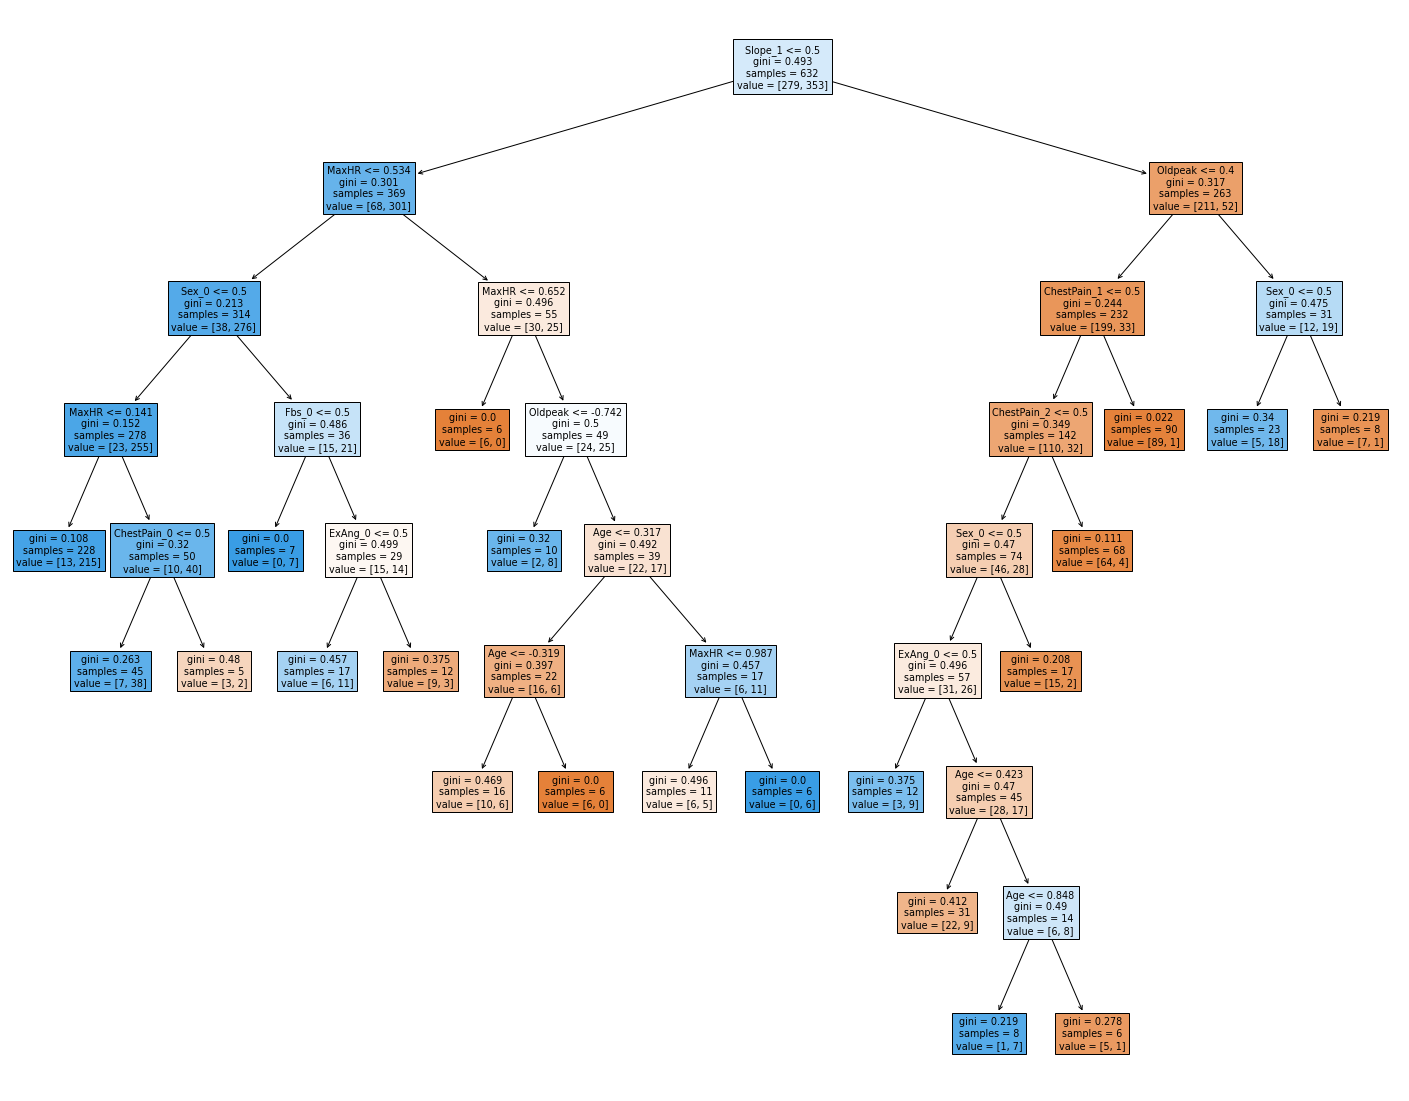

In [144]:
dtc = DecisionTreeClassifier(max_depth = 14, max_leaf_nodes = 21,  min_samples_leaf = 5)
dtc.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc,
                   feature_names= X.columns,
                   filled=True)

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Random Forest</span></center>


Since our data gives good results with the decision tree, we also decided to try our data on the random forest. As expected, we achieved a higher level of accuracy score with random forest compared to the decision tree. Furthermore, before doing hyperparameter tuning, we want to see the performance of the "Random Forest" model with the default parameter.

In [145]:
X = df.drop(["AHD"],axis=1)
y = df["AHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [146]:
heart_model_rf = RandomForestClassifier(random_state=100)
heart_model_rf.fit(X_train, y_train)
rf_test_pred = heart_model_rf.predict(X_test)
rf_train_pred = heart_model_rf.predict(X_train)
report(y_test, y_train, rf_test_pred, rf_train_pred)

Train set Accuracy:  1.0
Test set Accuracy:  0.8492647058823529
precision_score:  0.8456375838926175
recall_score:  0.875
f1_score:  0.8600682593856656


When we look at the report of the default parameter random forest, the first thing that strikes us is that the train set accurracy is 100%. This clearly indicates that this model is overfitting the train data. However, the test set accuracy is 84.92%. This is a very high rate for a model that we use without any effort.We got a precision score of 84.56% which means that the people we call having AHD, actually have AHD with a 84.56% probability. We got 87.5% of the recall score, which means that we correctly predicted 87.5% of all people who have AHD. F1 score is the average of the precision and recall, which is 86% in our case.

In [147]:
heart_model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

<span style="color:#126782;font-weight:700;font-size:14px;">
Hyperparameter Tuning For Random Forest
</span>

In [148]:
X = df.drop(["AHD"],axis=1)
y = df["AHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [149]:
param_grid = {"max_features" : ['auto', 'sqrt'],
              "max_depth" : sp_randint(1, 10),
              "min_samples_split": sp_randint(2, 10),
              "min_samples_leaf": sp_randint(1, 5),
              "bootstrap" : [True, False],
              "n_estimators" : [int(x) for x in np.linspace(start = 10, stop = 310, num = 10)]}

RF = RandomForestClassifier(random_state=100)
heart_disease_RF = RandomizedSearchCV(estimator=RF, param_distributions = param_grid, cv=10, n_iter= 10, random_state=100)
heart_disease_RF.fit(X_train, y_train)
print(heart_disease_RF.best_params_)

{'bootstrap': True, 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 43}


In [150]:
RF_test_pred = heart_disease_RF.predict(X_test)
RF_train_pred = heart_disease_RF.predict(X_train)
report(y_test, y_train, RF_test_pred, RF_train_pred)
randomforestscores = scorelist(y_test, y_train, RF_test_pred, RF_train_pred)

Train set Accuracy:  0.9018987341772152
Test set Accuracy:  0.8639705882352942
precision_score:  0.8543046357615894
recall_score:  0.8958333333333334
f1_score:  0.8745762711864407


After doing hyperparameter tuning, we increased our accuracy score from 84.92% to 86.39%. We tried to find optimal "max_depth", "max_features","min_samples_split","bootstrap","n_estimators" and "min_samples_leaf" parameters for the decision tree using RandomizedRearchCV. As expected we got a better accuracy score with hyperparameter tuning. Moreover, by doing hyperparameter we overcame the over-fitting that occurred with default parameters. We got a precision score of 85.43% which means that the people we call having AHD, actually have AHD with a 85.43% probability. We got 89.58% of the recall score, which means that we correctly predicted 89.58% of all people who have AHD. F1 score is the average of the precision and recall, which is 87.45% in our case.





<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
K-Nearest Neighbors Classifier </span></center>

Because KNN is an easy-to-implement, powerful and easy-to-understand algorithm, we chose one of our models as KNN. Morever, KNN does not have training period which means that new data can be added seamlessly by using KNN. Hence, KNN was the logical choice for us, as we added new data throughout the process. Furthermore, before doing hyperparameter tuning, we want to see the performance of "KNN" model with default parameter.



In [151]:
X = df.drop(["AHD"],axis=1)
y = df["AHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [152]:
heart_model_knn = KNeighborsClassifier()
heart_model_knn.fit(X_train, y_train)

knn_test_pred = heart_model_knn.predict(X_test)
knn_train_pred = heart_model_knn.predict(X_train)
report(y_test, y_train, knn_test_pred, knn_train_pred)

Train set Accuracy:  0.875
Test set Accuracy:  0.8272058823529411
precision_score:  0.8089171974522293
recall_score:  0.8819444444444444
f1_score:  0.8438538205980066


When we look at the report of the default parameter KNN, the test set accuracy is 82.72%. This is a high rate for a model that we use without any effort and any training process.We got a precision score of 80.89% which means that the people we call having AHD, actually have AHD with a 80.89% probability. We got 88.19% of the recall score, which means that we correctly predicted 88.19% of all people who have AHD. F1 score is the average of the precision and recall, which is 84.38% in our case.

In [153]:
heart_model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

<span style="color:#126782;font-weight:700;font-size:14px;">
Hyperparameter Tuning For KNN
</span>

In [154]:
X = df.drop(["AHD"],axis=1)
y = df["AHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [155]:
param_grid = {'n_neighbors' : range(1,31),
               'weights' : ['uniform','distance'],
                'metric' : ['minkowski','euclidean','manhattan'],
                'p': [1, 2],
                "leaf_size": range(1,50),
                "algorithm": ["ball_tree","kd_tree","brute"],
                "n_jobs" : range(1,31)
              }

KNN = KNeighborsClassifier()
heart_disease_KNN = RandomizedSearchCV(estimator=KNN, param_distributions = param_grid, cv=10, n_iter= 20, random_state=100)
heart_disease_KNN.fit(X_train, y_train)
print(heart_disease_KNN.best_params_)

{'weights': 'uniform', 'p': 1, 'n_neighbors': 9, 'n_jobs': 5, 'metric': 'manhattan', 'leaf_size': 20, 'algorithm': 'ball_tree'}


In [156]:
KNN_test_pred = heart_disease_KNN.predict(X_test)
KNN_train_pred = heart_disease_KNN.predict(X_train)
report(y_test, y_train, KNN_test_pred, KNN_train_pred)
knnScores = scorelist(y_test, y_train, KNN_test_pred, KNN_train_pred)

Train set Accuracy:  0.8639240506329114
Test set Accuracy:  0.8639705882352942
precision_score:  0.8496732026143791
recall_score:  0.9027777777777778
f1_score:  0.8754208754208753


After doing hyperparameter tuning, we increased our accuracy score from 82.72% to 86.39%. We tried to find optimal "n_neighbors", "weights","metric" and "p" parameters for the KNN using RandomizedRearchCV. As expected we got a better accuracy score with hyperparameter tuning. We got a precision score of 84% which means that the people we call having AHD, actually have AHD with a 84% probability. We got 90.27% of the recall score, which means that we correctly predicted 89.58% of all people who have AHD. F1 score is the average of the precision and recall, which is 87.54% in our case.





<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Support Vector Classifier</span></center>

Since we know that Support Vector Classifier is a very strong model on the classification side, we decided to use it because we classify people according to whether they have AHD or not. Furthermore, before doing hyperparameter tuning, we want to see the performance of "Support Vector Machine" model with default parameter.

In [157]:
X = df.drop(["AHD"],axis=1)
y = df["AHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [158]:
heart_model_SVC = svm.SVC(random_state=100)
heart_model_SVC.fit(X_train, y_train)
SVC_test_pred = heart_model_SVC.predict(X_test)
SVC_train_pred = heart_model_SVC.predict(X_train)
report(y_test, y_train, SVC_test_pred, SVC_train_pred)

Train set Accuracy:  0.884493670886076
Test set Accuracy:  0.8639705882352942
precision_score:  0.8543046357615894
recall_score:  0.8958333333333334
f1_score:  0.8745762711864407


When we look at the report of the default parameter Support Vector Classifier, the test set accuracy is 86.39%. This is a very high rate for a model that we use without any effort.We got a precision score of 85.43% which means that the people we call having AHD, actually have AHD with a 85.43% probability. We got 89.58% of the recall score, which means that we correctly predicted 89.58% of all people who have AHD. F1 score is the average of the precision and recall, which is 87.45% in our case.

In [159]:
heart_model_SVC.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 100,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

<span style="color:#126782;font-weight:700;font-size:14px;">
Hyperparameter Tuning For Support Vector Machines
</span>

In [160]:
X = df.drop(["AHD"],axis=1)
y = df["AHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [161]:
param_grid = { "C": [.01, .1, 1, 5, 10, 100],
              "gamma": [0, .1,.01,.001,.0001, 1, 5, 10, 100],
               'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6]}

SVC = svm.SVC(probability=True)
heart_disease_SVC = RandomizedSearchCV(estimator=SVC, param_distributions = param_grid, cv=15, n_iter= 10, random_state=100)
heart_disease_SVC.fit(X_train, y_train)
print(heart_disease_SVC.best_params_)

{'kernel': 'sigmoid', 'gamma': 0.01, 'degree': 5, 'C': 5}


In [162]:
SVC_test_pred_tuned = heart_disease_SVC.predict(X_test)
SVC_train_pred_tuned = heart_disease_SVC.predict(X_train)
report(y_test, y_train, SVC_test_pred_tuned, SVC_train_pred_tuned)
SVCScores = scorelist(y_test, y_train, SVC_test_pred_tuned, SVC_train_pred_tuned)

Train set Accuracy:  0.8528481012658228
Test set Accuracy:  0.8713235294117647
precision_score:  0.8707482993197279
recall_score:  0.8888888888888888
f1_score:  0.8797250859106528


After doing hyperparameter tuning, we increased our accuracy score from 86.39% to 87.13%. We tried to find optimal "C", "gamma","kernel" and "degree" parameters for the Support Vector Classifier using RandomizedRearchCV. As expected we got a better accuracy score with hyperparameter tuning.We got a precision score of 87.07% which means that the people we call having AHD, actually have AHD with a 87.07% probability. We got 88.8% of the recall score, which means that we correctly predicted 88.8% of all people who have AHD. F1 score is the average of the precision and recall, which is 87.97% in our case.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Logistic Regression</span></center>

We know that Logistic Regression is used to predict situations whose answers are binary, which describes our data set because what we are trying to predict in our dataset is whether people have AHD, in short, "yes" or "no" answers (i.e binary answers).

In [163]:
X = df.drop(["AHD"],axis=1)
y = df["AHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [164]:
heart_model_LR = LogisticRegression(random_state=100)
heart_model_LR.fit(X_train, y_train)
lr_test_pred = heart_model_LR.predict(X_test)
lr_train_pred = heart_model_LR.predict(X_train)
report(y_test, y_train, lr_test_pred, lr_train_pred)

Train set Accuracy:  0.865506329113924
Test set Accuracy:  0.8529411764705882
precision_score:  0.8561643835616438
recall_score:  0.8680555555555556
f1_score:  0.8620689655172415


When we look at the report of the default parameter Logistic Regression, the test set accuracy is 85.29%. This is a very high rate for a model that we use without any effort.We got a precision score of 85.61% which means that the people we call having AHD, actually have AHD with a 85.61% probability. We got 86.80% of the recall score, which means that we correctly predicted 86.80% of all people who have AHD. F1 score is the average of the precision and recall, which is 86.20% in our case.

In [165]:
heart_model_LR.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 100,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [166]:
param_grid = {"penalty": ['l2'],
              'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              "solver": ['newton-cg', 'lbfgs', 'sag', 'saga'],
            }

LR = LogisticRegression(max_iter=5000)
heart_disease_LR = RandomizedSearchCV(estimator=LR, param_distributions = param_grid, cv=10, n_iter=10, random_state=100)
heart_disease_LR.fit(X_train, y_train)
print(heart_disease_LR.best_params_)

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1}


In [167]:
LR_test_pred = heart_disease_LR.predict(X_test)
LR_train_pred = heart_disease_LR.predict(X_train)
report(y_test, y_train, LR_test_pred, LR_train_pred)
LRScores = scorelist(y_test, y_train, LR_test_pred, LR_train_pred)

Train set Accuracy:  0.865506329113924
Test set Accuracy:  0.8529411764705882
precision_score:  0.8561643835616438
recall_score:  0.8680555555555556
f1_score:  0.8620689655172415


After doing hyperparameter tuning, we could not increase our accuracy score. We tried to find optimal "penalty", "C" and "solver" parameters for the Logistic Regression using RandomizedRearchCV. We expected to get a better accuracy score with hyperparameter tuning. However, the accuracy score stayed the same. Therefore, we decided to not use the Logistic Regression model since we could not increase our accuracy score with tuning.We got a precision score of 85.61% which means that the people we call having AHD, actually have AHD with a 85.61% probability. We got 86.80% of the recall score, which means that we correctly predicted 86.80% of all people who have AHD. F1 score is the average of the precision and recall, which is 86.20% in our case.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Combination of 4 Models </span></center>

In [168]:
voting_classifier_soft = VotingClassifier(
    estimators = [('dtc',heart_disease_DTC),
                  ('svc', heart_disease_SVC),
                  ('rf', heart_disease_RF),
                  ('knn', heart_disease_KNN)], 
    voting='soft')

voting_classifier_soft.fit(X_train, y_train)
VC_test_pred = voting_classifier_soft.predict(X_test)
VC_train_pred = voting_classifier_soft.predict(X_train)
report(y_test, y_train, VC_test_pred, VC_train_pred)
CombinedScores = scorelist(y_test, y_train, VC_test_pred, VC_train_pred)

Train set Accuracy:  0.8860759493670886
Test set Accuracy:  0.8786764705882353
precision_score:  0.8675496688741722
recall_score:  0.9097222222222222
f1_score:  0.888135593220339


After training 5 different models, we thought whether we could get a better model by combining all of these models. We decided to use a voting algorithm for this. We used soft voting for this algorithm. In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier's importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote. We put our SVC, Random Forest, KNN and Decision Tree models into this voting algorithm. We left out Logistic Regression as we could not tune it, as a result, the model we obtained gave the most successful performance as we expected.We got a precision score of 86.84% which means that the people we call having AHD, actually have AHD with a 86.84% probability. We got 91.66% of the recall score, which means that we correctly predicted 91.66% of all people who have AHD. F1 score is the average of the precision and recall, which is 89.18% in our case.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Heart Disease Prediction For Current and New Patients</span></center>

First of all, let's start with the patients who are already in our database and whose risk of AHD we know. For this, we will take one patient from the test data and predict his disease. We will use the patient with ID 413 for this purpose. We should review the patient first, as we can see below its AHD parameter is 1.

In [169]:
df.iloc[[404]]

,Age,MaxHR,Oldpeak,AHD,Sex_0,ChestPain_0,ChestPain_1,ChestPain_2,Fbs_0,ExAng_0,Slope_1,Slope_2,AgeGroups_1,AgeGroups_2,AgeGroups_3,AgeGroups_4,AgeGroups_5
413,0.264381,-1.531626,-2.739302,1,0,0,0,1,0,1,0,1,0,0,0,1,0


This patient is the first patient of our test dataset.

In [170]:
id_413 = X_test.iloc[[0]]
id_413

,Age,MaxHR,Oldpeak,Sex_0,ChestPain_0,ChestPain_1,ChestPain_2,Fbs_0,ExAng_0,Slope_1,Slope_2,AgeGroups_1,AgeGroups_2,AgeGroups_3,AgeGroups_4,AgeGroups_5
413,0.264381,-1.531626,-2.739302,0,0,0,1,0,1,0,1,0,0,0,1,0


Now we can predict the patient's AHD situation, using Voting Classifier which is the best model we developed.

In [177]:
id_413 = X_test.iloc[[0]]
VC_test_pred = voting_classifier_soft.predict(id_413)
print(VC_test_pred)

[1]


As can be seen, the VotingClassifier model we used detected that the sample patient had heart disease. When we look at the AHD parameter of the same patient in the main data, we see that it was predicted correctly. We will now determine whether new patients which are not present in our dataset have heart disease. The data of these patients may not be in ideal conditions, if there is missing data, we will solve the problem by imputation from our main data set. For the data of new patients, we will only collect the features we use in our machine learning models.

In [172]:
newPatient = {"Age":None,
                  "Sex" : None,
                  "ChestPain": None,
                  "Fbs" : None,
                  "ExAng" :None,
                  "Slope" : None,
                  "AgeGroups" : None,
                  "MaxHR" : None,
                  "Oldpeak" : None}

def missingValueTreatment(personData):
    if personData["Age"] == None:
        personData["Age"] = dfCopy["Age"].mean()
    if personData["MaxHR"] == None:
        personData["MaxHR"] = dfCopy["MaxHR"].mean()
    if personData["Oldpeak"] == None:
        personData["Oldpeak"] = dfCopy["Oldpeak"].mean()
    if personData["Sex"] == None or (personData["Sex"] != 1 and personData["Sex"]!= 0):
        personData["Sex"] = int(df.mode()["Sex_0"])
    if personData["ChestPain"] == None or (personData["ChestPain"] != 0 and personData["ChestPain"]!= 1 and personData["ChestPain"]!= 2 and personData["ChestPain"]!= 3 ):
        personData["ChestPain"] = int(dfCopy.mode()["ChestPain"])
    if personData["Fbs"] == None or (personData["Fbs"] != 1 and personData["Fbs"]!= 0 ):
        personData["Fbs"] = int(dfCopy.mode()["Fbs"])
    if personData["ExAng"] == None or (personData["ExAng"] != 1 and personData["ExAng"]!= 0):
        personData["ExAng"] = int(dfCopy.mode()["ExAng"])
    if personData["Slope"] == None  or (personData["Slope"] != 1 and personData["Slope"]!= 2 and personData["Slope"]!= 3):
        personData["Slope"] = int(dfCopy.mode()["Slope"])
    personData["AgeGroups"] = age_groups(personData["Age"])
        

def patientInfoEditor(defaultPerson):
    if(defaultPerson["Age"] != "-"):
        defaultPerson["Age"] = int(defaultPerson["Age"])
    else:
        defaultPerson["Age"] = None
    if(defaultPerson["Sex"] != "-"):
        defaultPerson["Sex"] = int(defaultPerson["Sex"])
    else:
        defaultPerson["Sex"] = None
    if(defaultPerson["ChestPain"] != "-"):
        defaultPerson["ChestPain"] = int(defaultPerson["ChestPain"])
    else:
        defaultPerson["ChestPain"] = None
    if(defaultPerson["Fbs"] != "-" ):
        defaultPerson["Fbs"] = int(defaultPerson["Fbs"])
    else:
        defaultPerson["Fbs"] = None
    if(defaultPerson["Slope"] != "-"):
        defaultPerson["Slope"] = int(defaultPerson["Slope"])
    else:
        defaultPerson["Slope"] = None
    if(defaultPerson["MaxHR"] != "-"):
        defaultPerson["MaxHR"] = int(defaultPerson["MaxHR"])
    else:
        defaultPerson["MaxHR"] = None
    if(defaultPerson["Oldpeak"] != "-"):
        defaultPerson["Oldpeak"] = int(defaultPerson["Oldpeak"])
    else:
        defaultPerson["Oldpeak"] = None
    if(defaultPerson["ExAng"] != "-" ):
        defaultPerson["ExAng"] = int(defaultPerson["ExAng"])
    else:
        defaultPerson["ExAng"] = None

We will receive the new patient's data via input. "-" will be entered for missing data. We will add this to a copy of our main dataset, then scale the data to predict it, and finally we will make the AHD prediction.

In [173]:
print("Heart Disease Prediction System\nPlease enter - for missing information.")

newPatient["Age"] = input("What is the age of the patient? ")
newPatient["Sex"] = input("What is the sex of the patient? [1: Male, 0: Female] ")
newPatient["ChestPain"] = input("What is the chest pain type of the patient?\n [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic] ")
newPatient["Fbs"] = input("What is the fasting blood sugar of the patient? [1: if FBS > 120 mg/dL, 0: else] ")
newPatient["ExAng"] = input("What is the exercise induced angina of the patient? [Exercise-induced angina [1: Yes, 0: No] ")
newPatient["Slope"] = input(" What is the slope of the peak exercise ST segment? [1: upsloping, 2: flat, 3: downsloping] ")
newPatient["MaxHR"] = input("What is maximum heart rate achieved? [Numeric value between 60 and 202] ")
newPatient["Oldpeak"] = input("What is the oldpeak? [Numeric value measured in depression] ")

patientInfoEditor(newPatient)
missingValueTreatment(newPatient)
dfCopy = dfCopy.append([newPatient],ignore_index = True)

dfCopy.iloc[[-1]]

Heart Disease Prediction System
Please enter - for missing information.
What is the age of the patient? 43
What is the sex of the patient? [1: Male, 0: Female] 1
What is the chest pain type of the patient?
 [0: Typical Angina, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Asymptomatic] -
What is the fasting blood sugar of the patient? [1: if FBS > 120 mg/dL, 0: else] 1
What is the exercise induced angina of the patient? [Exercise-induced angina [1: Yes, 0: No] 1
 What is the slope of the peak exercise ST segment? [1: upsloping, 2: flat, 3: downsloping] 1
What is maximum heart rate achieved? [Numeric value between 60 and 202] 189
What is the oldpeak? [Numeric value measured in depression] -


,Age,Sex,ChestPain,Fbs,MaxHR,ExAng,Oldpeak,Slope,AgeGroups
904,43,1,3,1,189,1,0.879757,1,3


As can be seen from the patient's data above, chest pain type and oldpeak data were entered NaN. In the imputation method used, we used mode for categorical variables and mean for numerical variables.

In [174]:
dfToBeScaled = dfCopy.copy()
standardScaler = StandardScaler()
new_patient = dfToBeScaled.iloc[[-1]]
dfToBeScaled[quantitative_variables] = standardScaler.fit_transform(dfToBeScaled[quantitative_variables])
dfToBeScaled = pd.get_dummies(dfToBeScaled, columns= categorical_variables)
dfToBeScaled = dfToBeScaled.drop(["Sex_1", "ChestPain_3", "Fbs_1", "ExAng_1", "Slope_3", "AgeGroups_6"], axis= 1)

new_patient = dfToBeScaled.iloc[[-1]]
newPatientPrediction = voting_classifier_soft.predict(new_patient)

print(newPatientPrediction)

array([1])

For the new patient from outside, our machine learning model predicted "1" which means the patient had heart disease. Since the test accuracy of our combined model is 88.24%, we can say that the probability of the prediction is correct given for this patient is 88.24%.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Comparison Of The ML Algorithms </span></center>


In [175]:
model_list = [('Decision Tree',decisionTreeScores[0],decisionTreeScores[1],decisionTreeScores[2],decisionTreeScores[3],decisionTreeScores[4] ),
            ('Random Forest', randomforestscores[0],randomforestscores[1],randomforestscores[2],randomforestscores[3],randomforestscores[4] ),
            ('Support Vector Machines',SVCScores[0],SVCScores[1],SVCScores[2],SVCScores[3],SVCScores[4]),
            ('Logistic Regression Scores',LRScores[0],LRScores[1],LRScores[2],LRScores[3],LRScores[4]),
            ('KNeighbors Classifier',knnScores[0],knnScores[1],knnScores[2],knnScores[3],knnScores[4]),
            ('Combined Model',CombinedScores[0],CombinedScores[1],CombinedScores[2],CombinedScores[3],CombinedScores[4])]             

In [176]:
model_stats = pd.DataFrame(data = model_list, columns=["Model",'Train Set Accuracy', 'Test Set Accuracy','Precision Score', 'Recall Score', 'F1 Score']).sort_values("Test Set Accuracy", ascending=False, ignore_index=True)
model_stats.index += 1
model_stats.style.background_gradient(cmap='Blues')

,Model,Train Set Accuracy,Test Set Accuracy,Precision Score,Recall Score,F1 Score
1,Combined Model,0.886076,0.878676,0.867550,0.909722,0.888136
2,Support Vector Machines,0.852848,0.871324,0.870748,0.888889,0.879725
3,Random Forest,0.901899,0.863971,0.854305,0.895833,0.874576
4,KNeighbors Classifier,0.863924,0.863971,0.849673,0.902778,0.875421
5,Logistic Regression Scores,0.865506,0.852941,0.856164,0.868056,0.862069
6,Decision Tree,0.887658,0.819853,0.823129,0.840278,0.831615


The plot above shows a comparison of the performance of the tuned models. The best working model for our dataset was the combined model, in which we combined 4 different models. This model outperformed the other models in all scores except the training test accuracy score. The best performing model without combining several models was Support Vector Machines. Although the most successful algorithm for our dataset was Support Vector Machines, all models showed more or less the same performance after tuning.

<center><span style="color:#AE2012;font-weight:700;font-size:15px;">
Conclusion </span></center>

Our initial goal was to create a machine learning model that could predict with high accuracy patients at risk of heart disease. When we come to the end of the project, we can say that we have achieved our goal with an accuracy rate of approximately 88 percent. As a result of the project, we learned a lot about machine learning. In the Explanatory Data Analysis section, we examined the relationship between heart diseases and other health factors. Afterwards, we developed our models by choosing features for our Machine Learning algorithms with hypothesis testing. We had the chance to use many classification algorithms and finally we ended the project with a voting method where we could use all the algorithms we created. During the process, we had the opportunity to learn many data cleaning techniques. We hope to be able to use the valuable information we learned from this project in other projects in the future.